utils/scoringfunctions.py:240: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  dfOut = dfOut.reindex_axis(['variable','informationValue','testDiff','trainDiff','giniTest','giniTrain'],axis=1)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:4653: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
utils/scorin

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


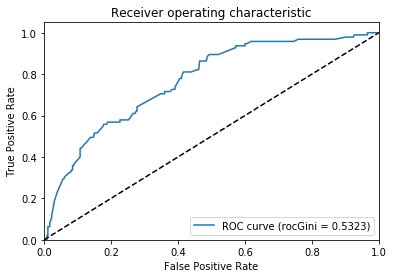

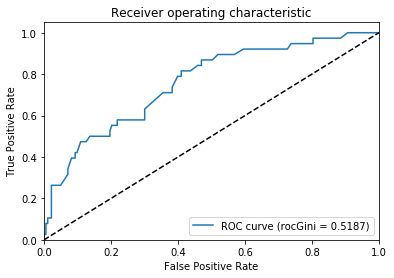

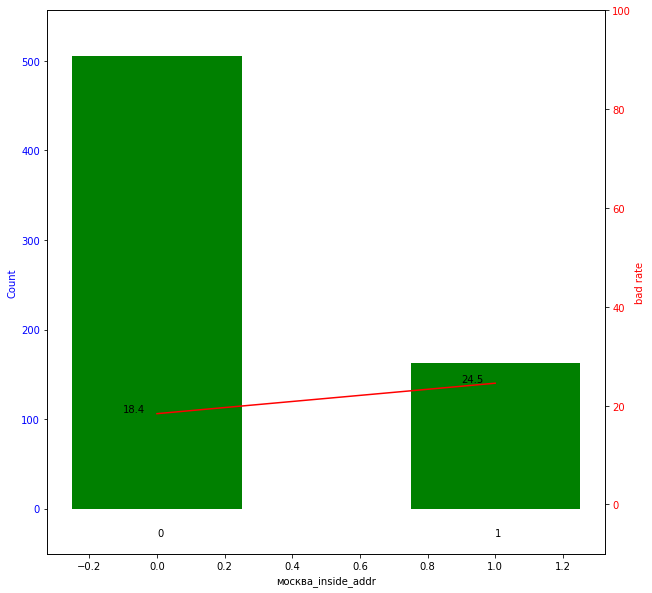

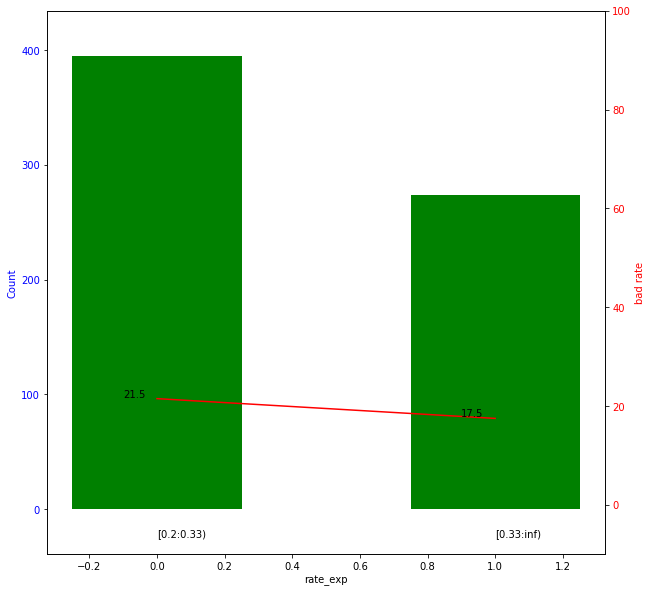

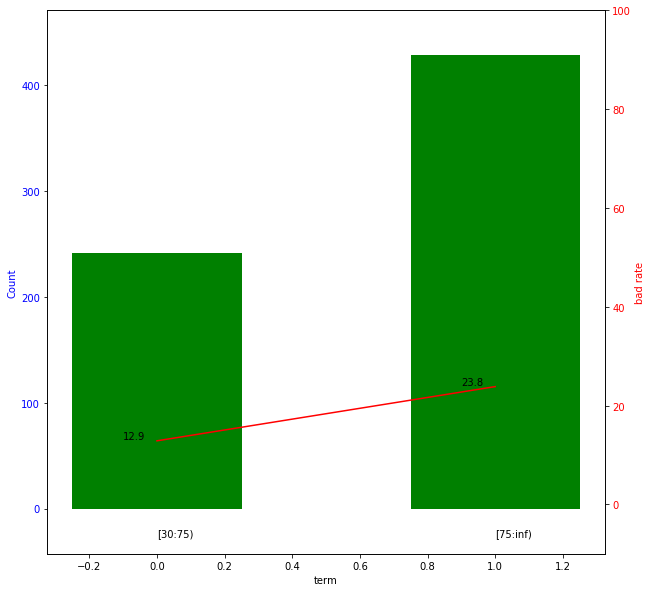

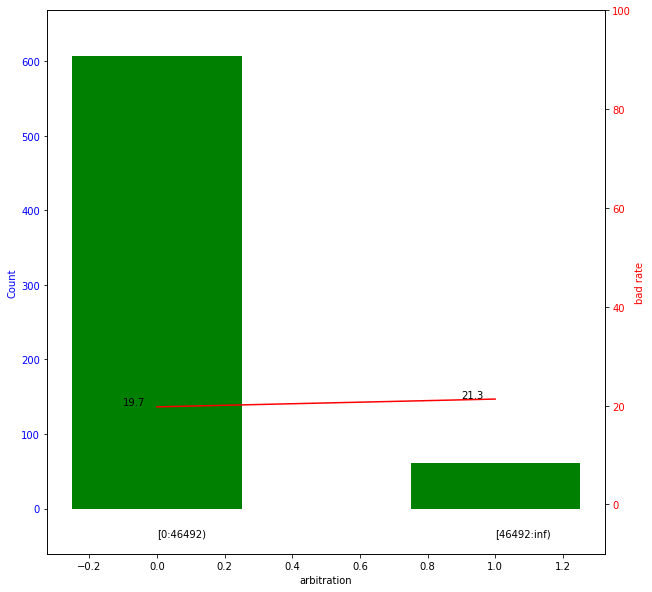

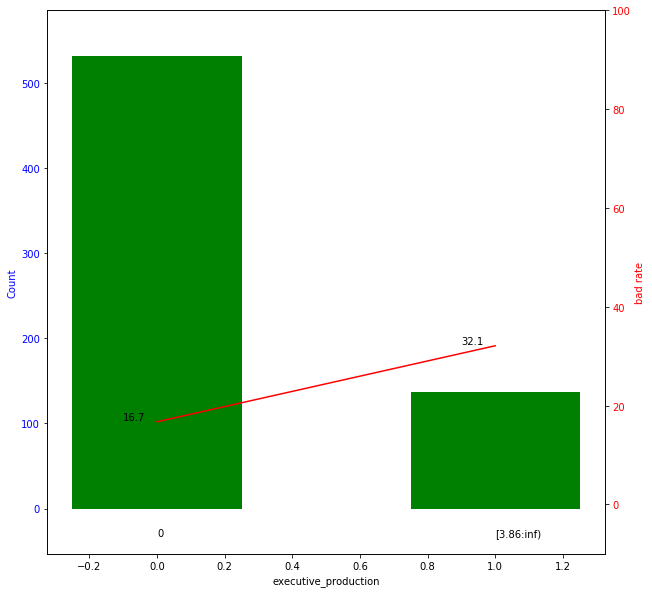

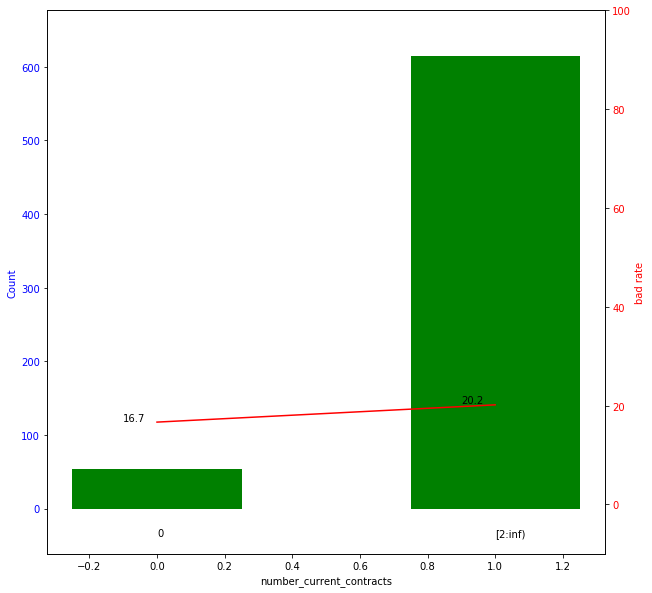

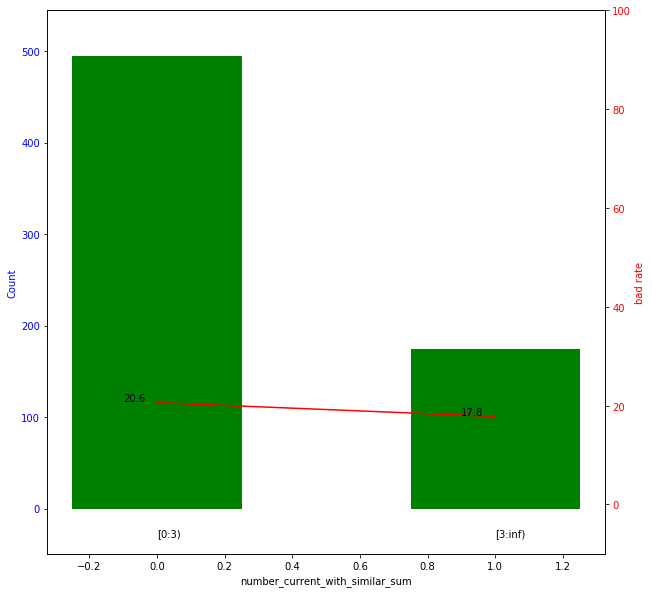

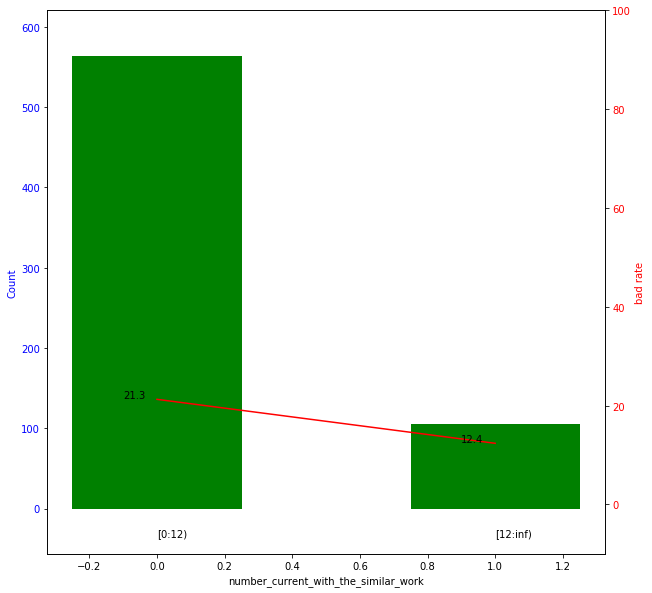

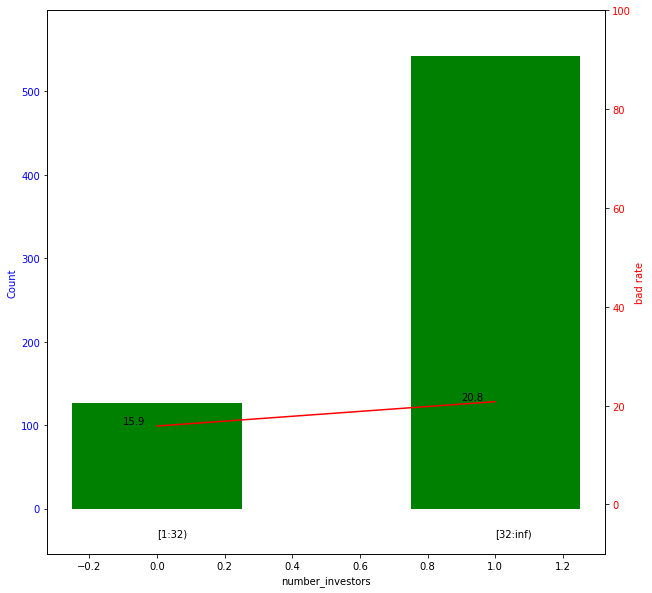

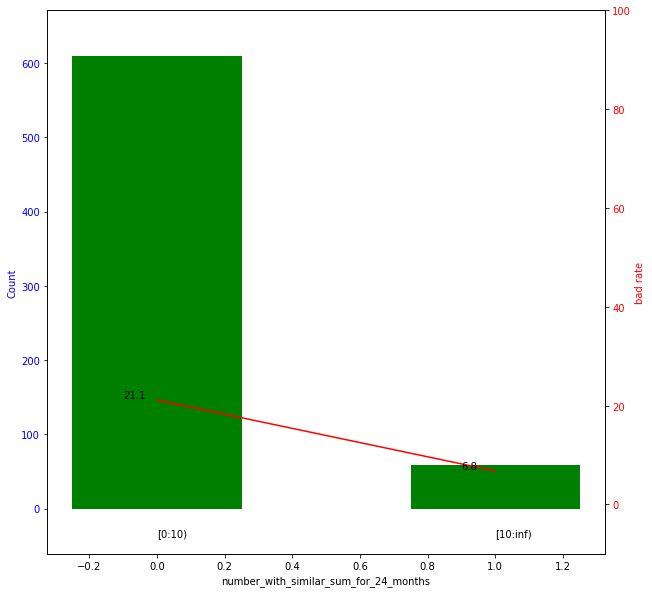

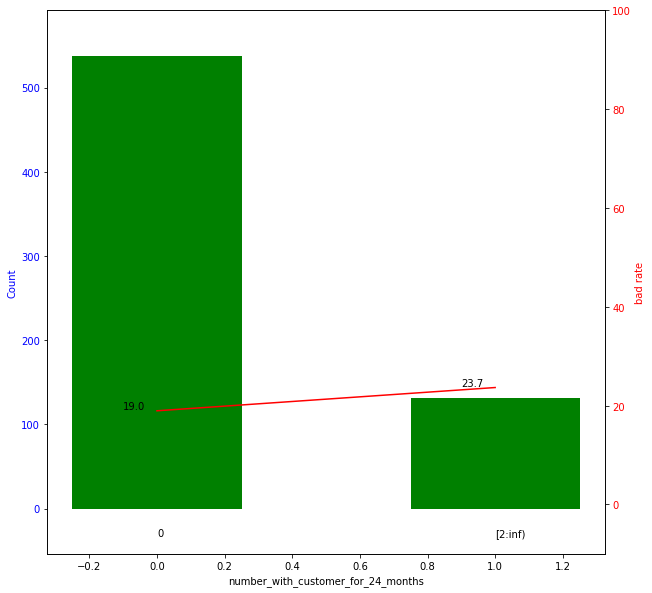

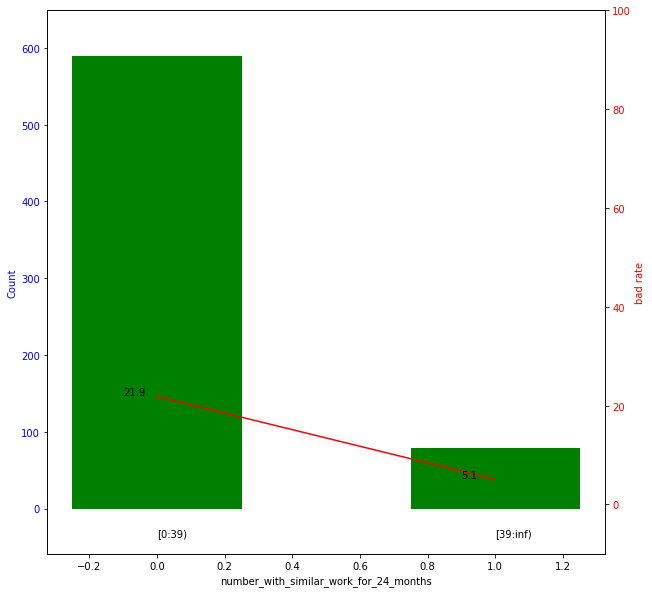

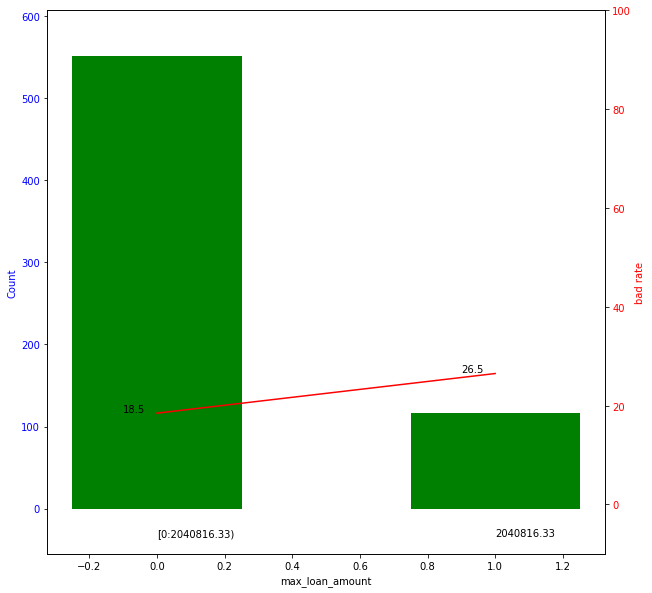

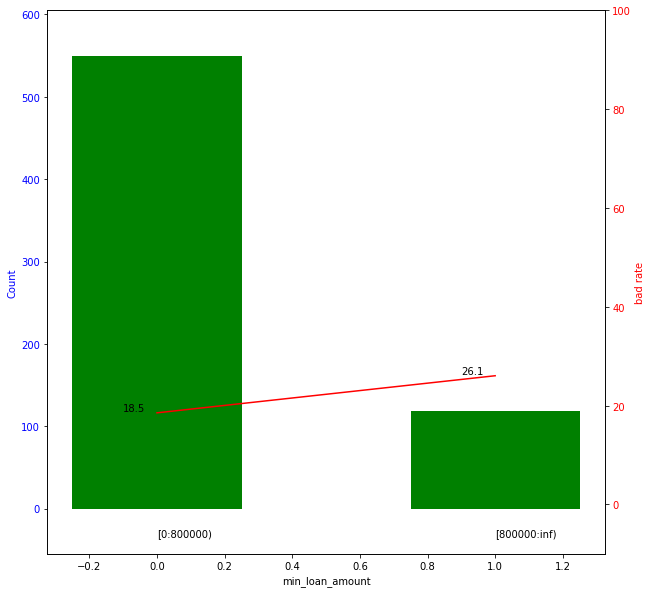

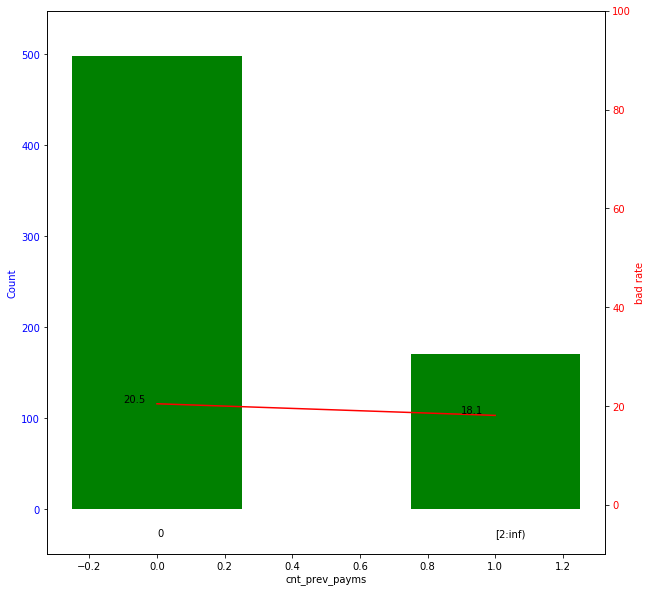

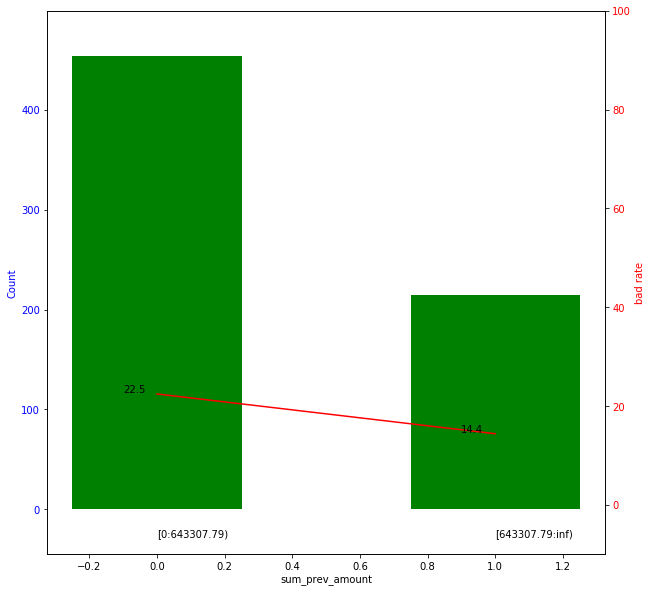

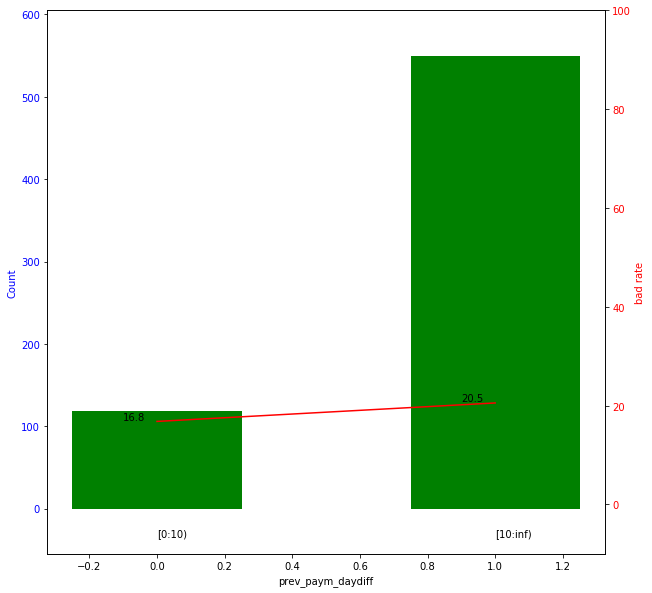

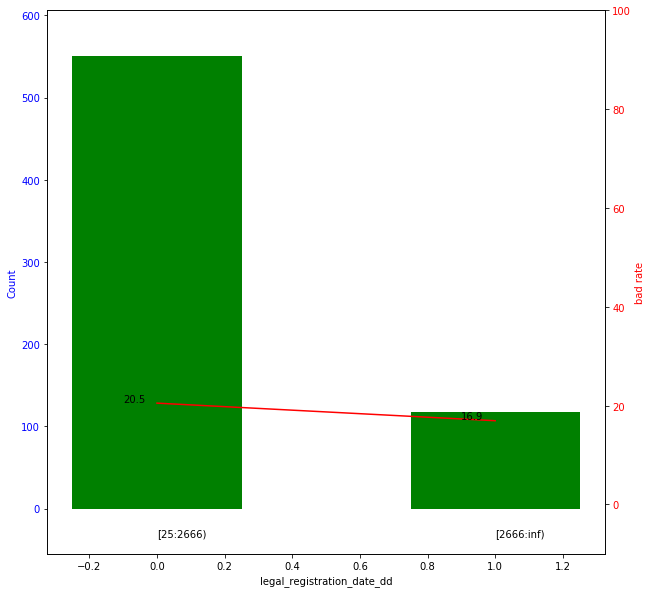

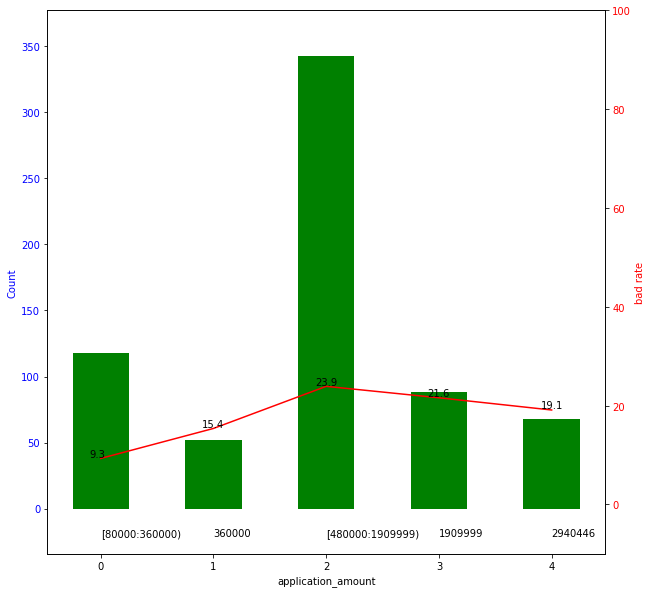

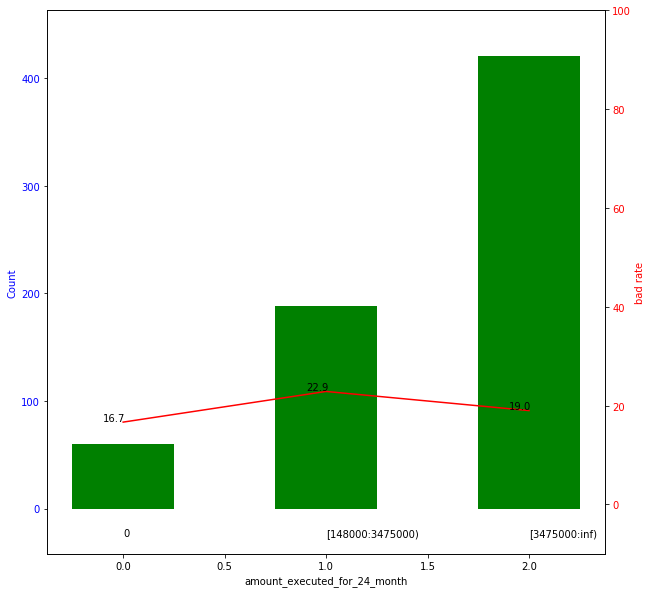

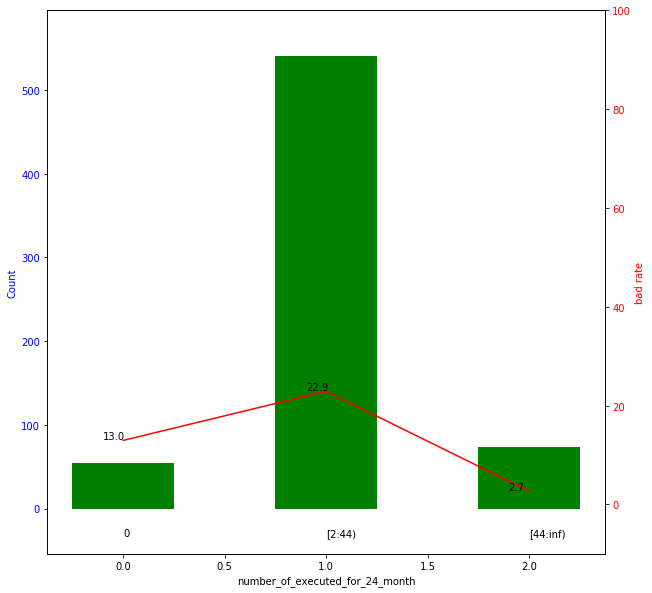

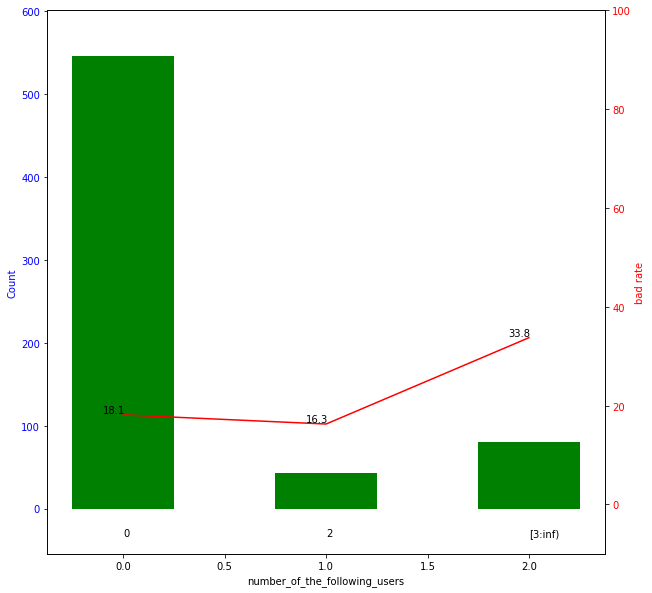

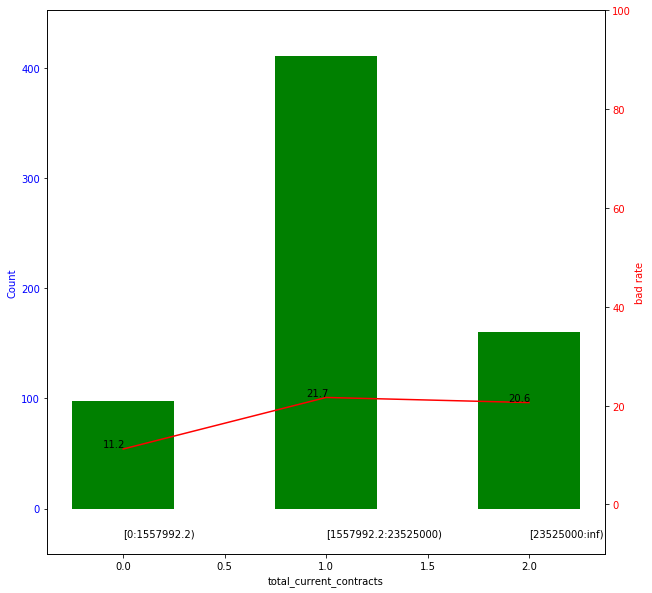

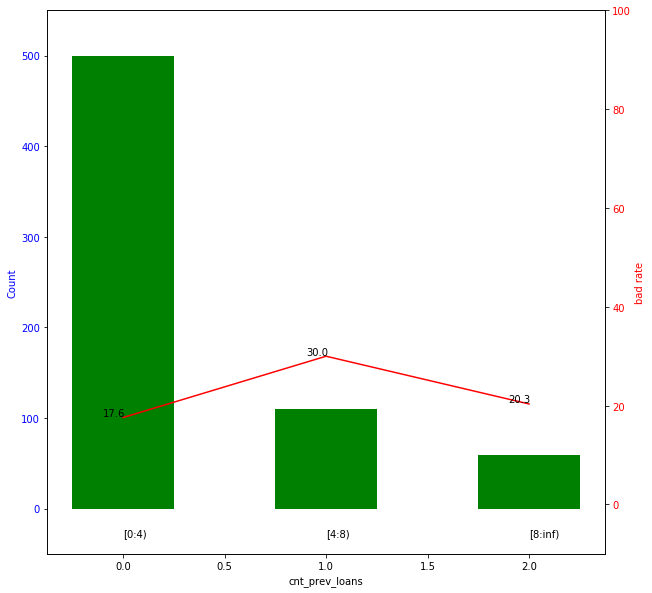

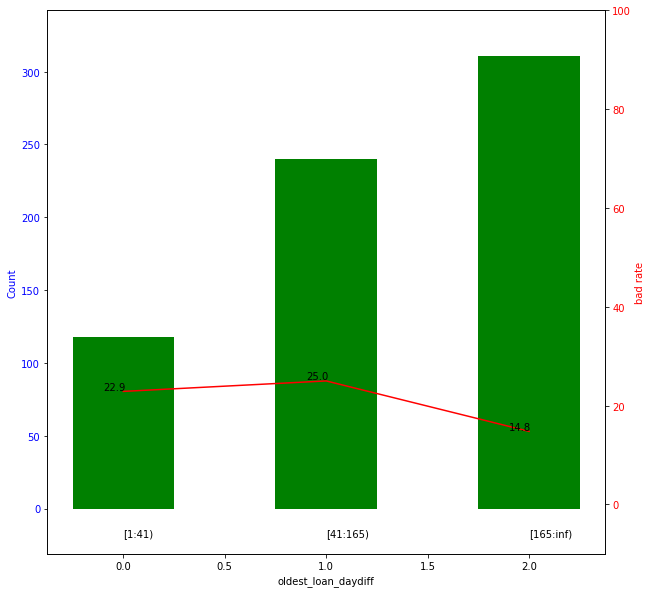

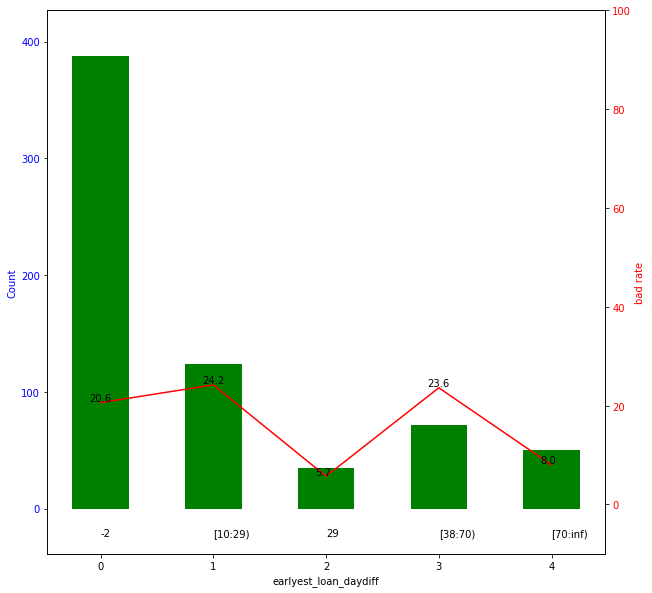

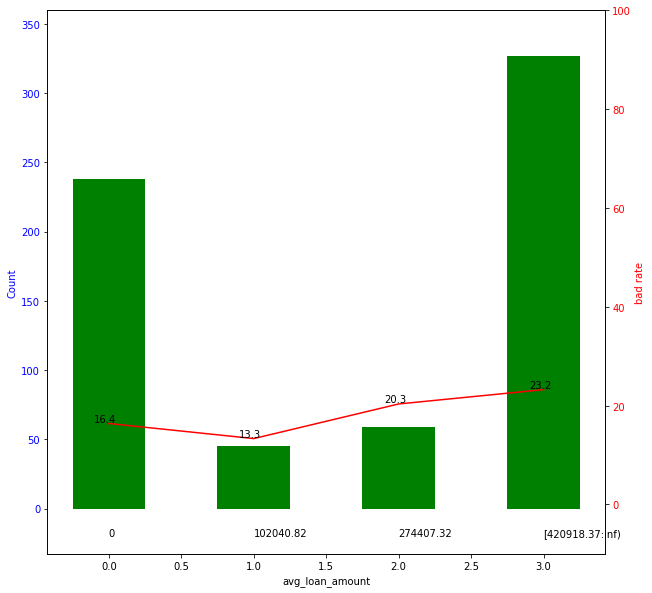

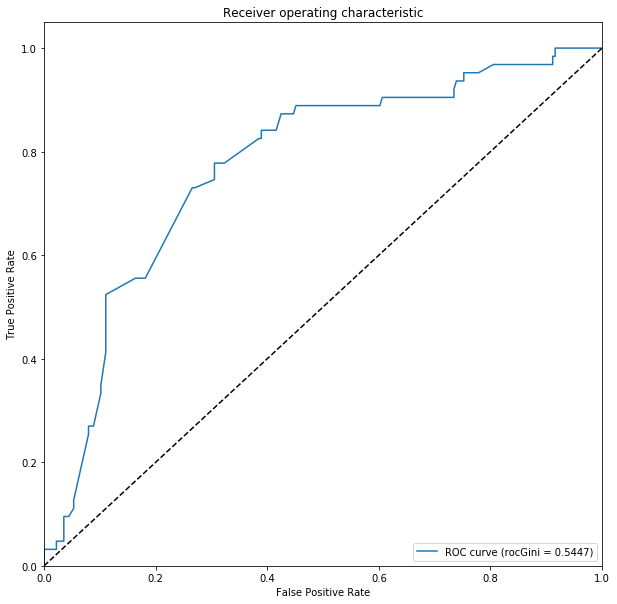

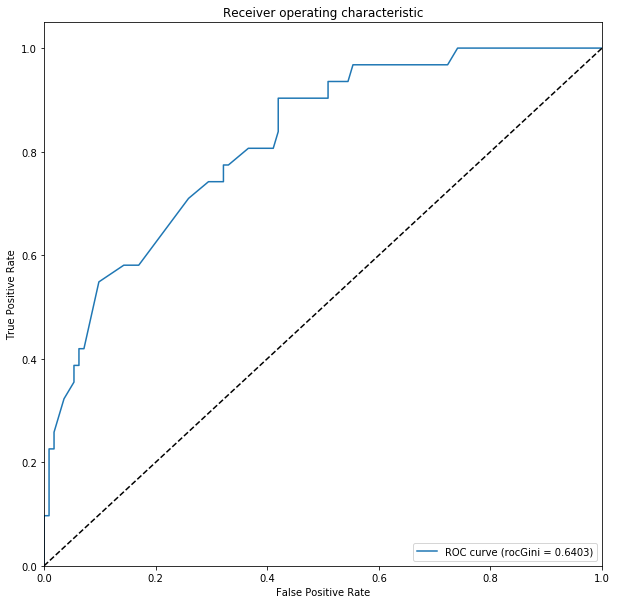

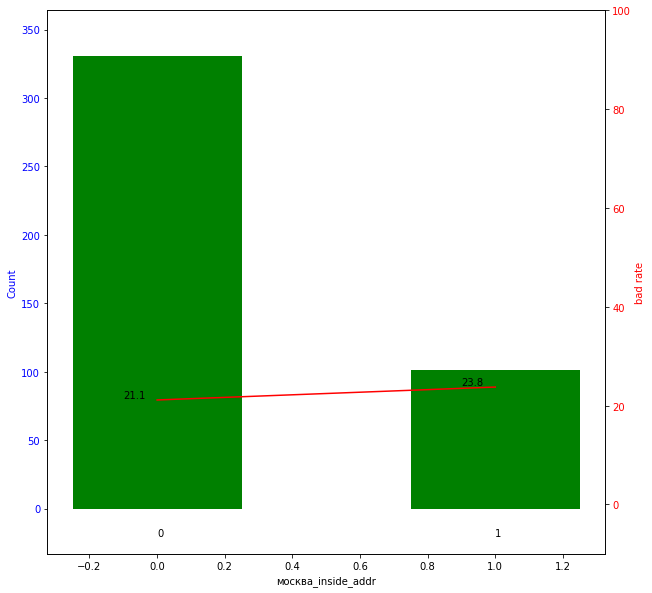

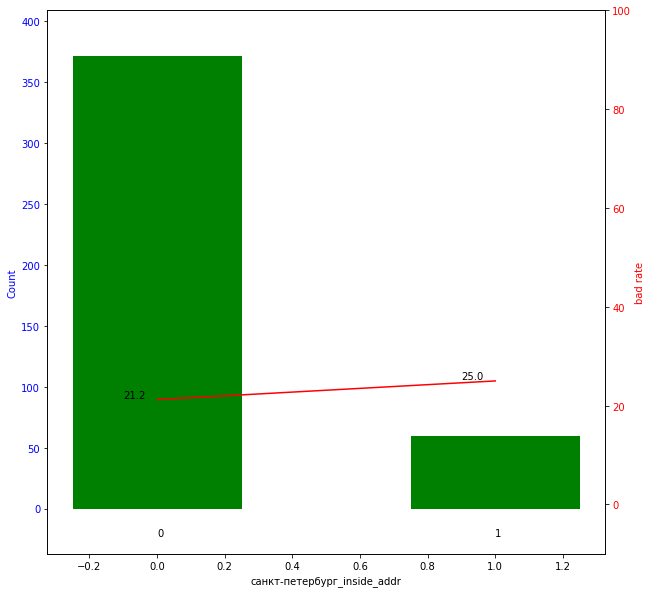

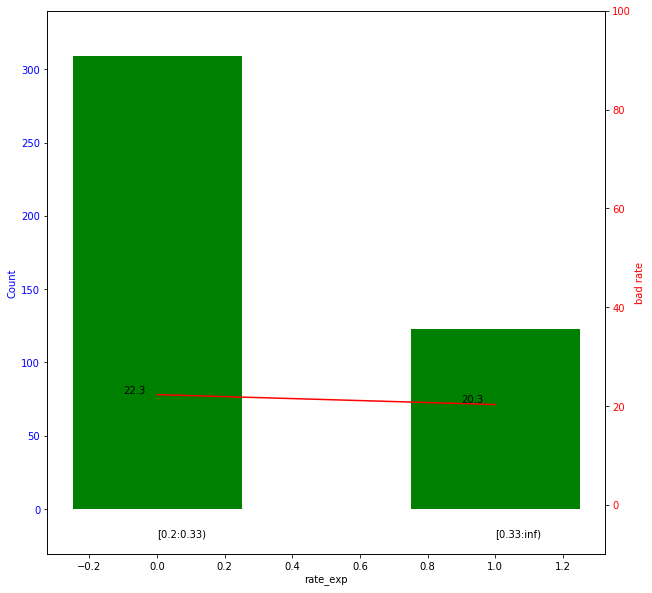

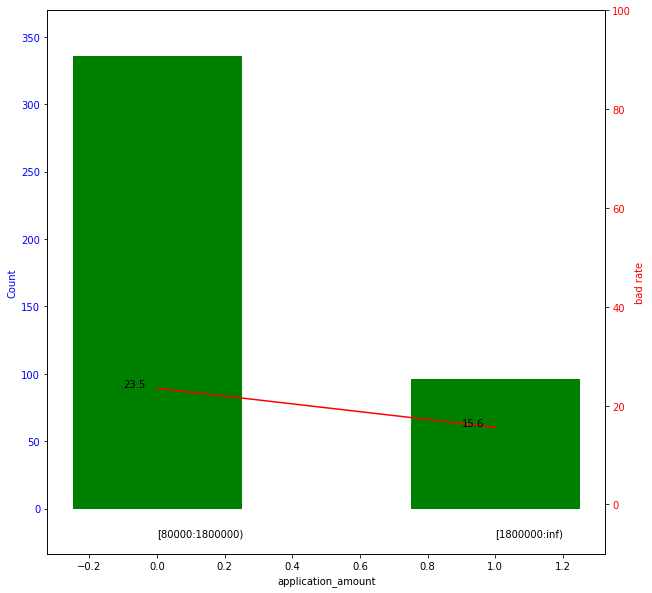

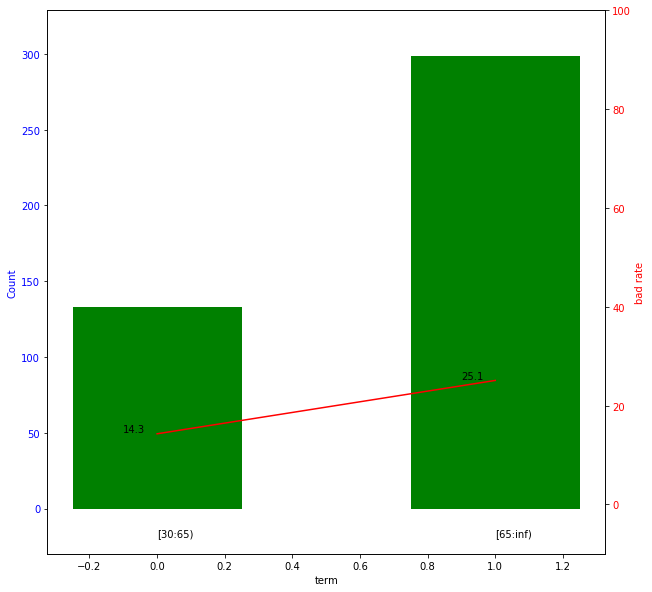

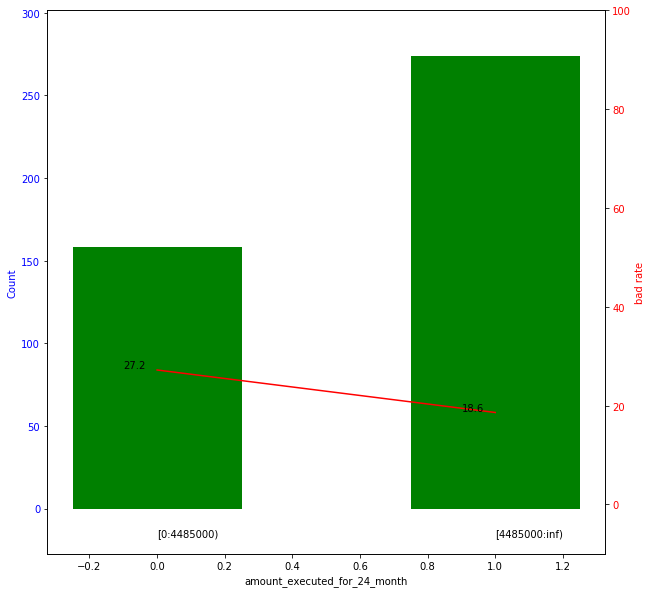

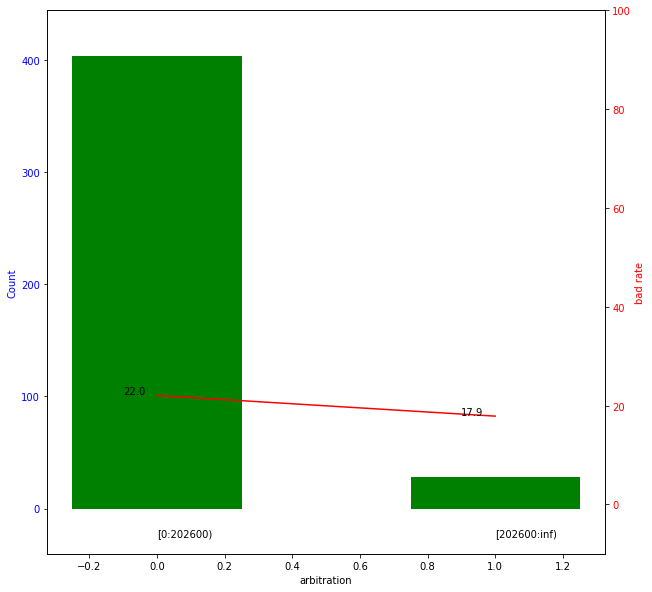

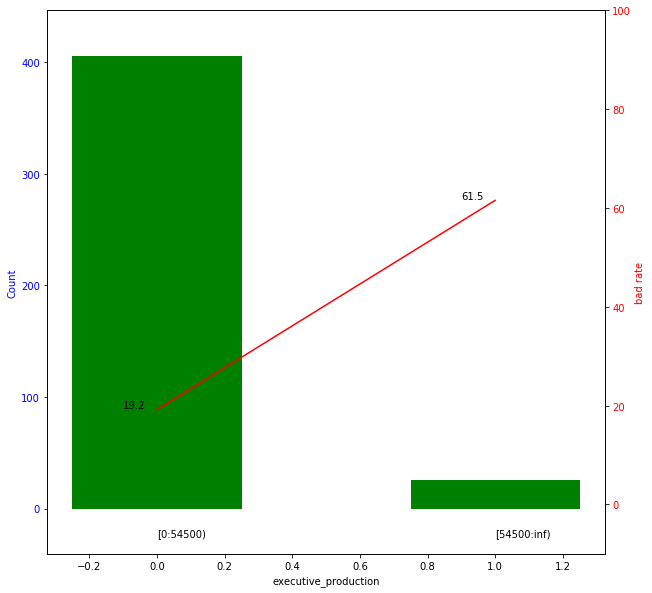

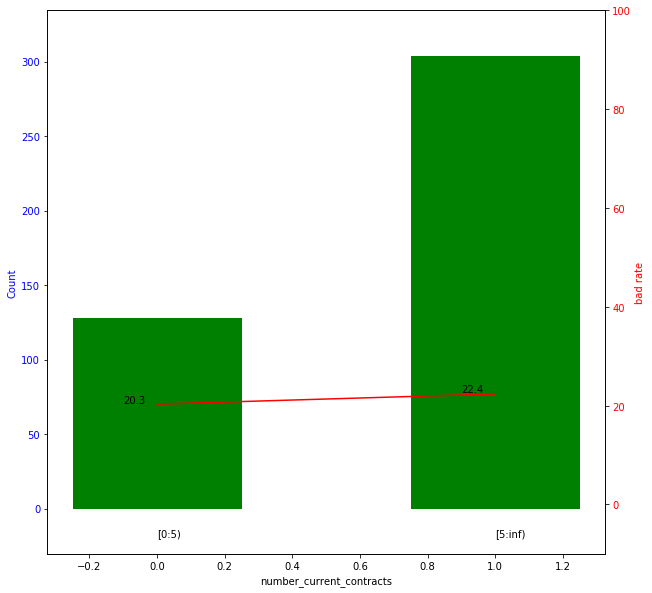

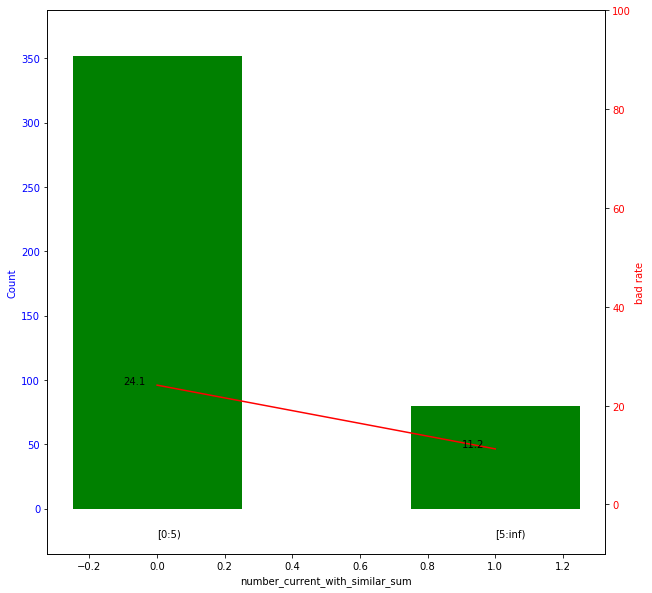

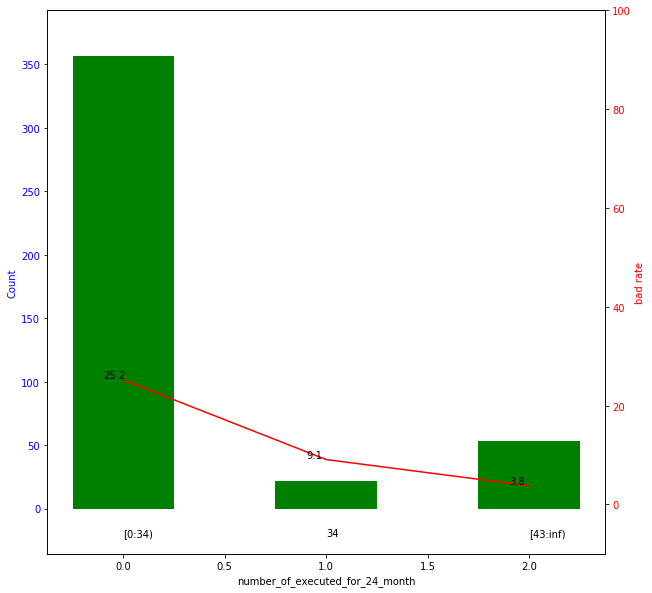

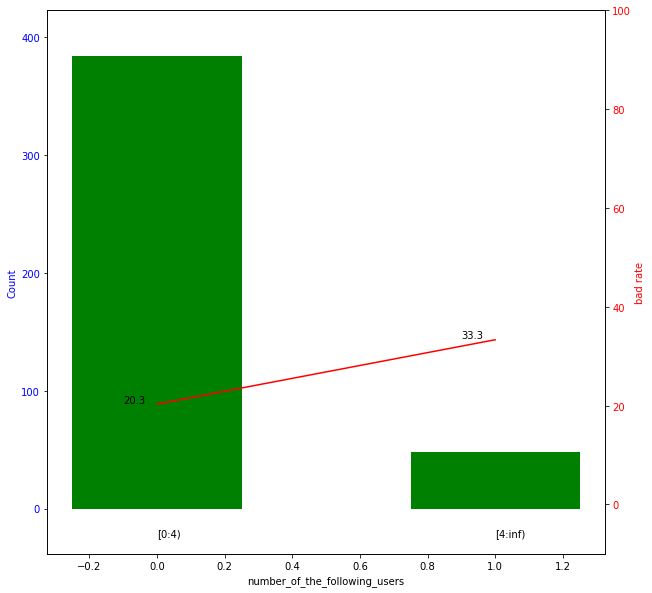

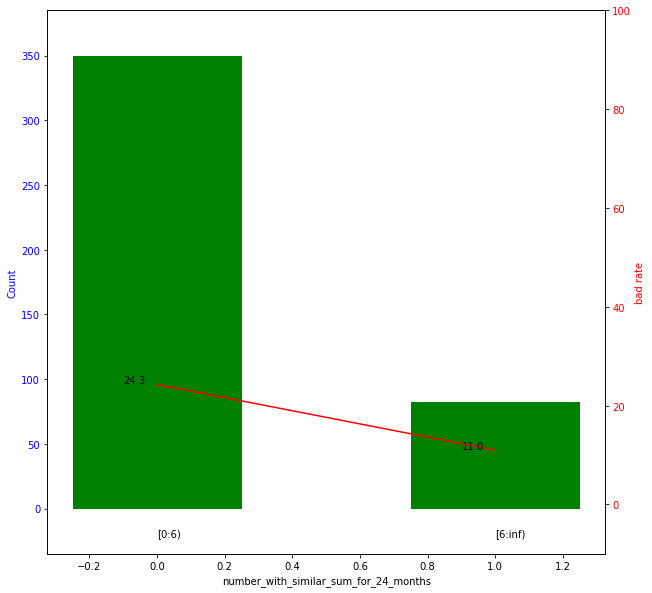

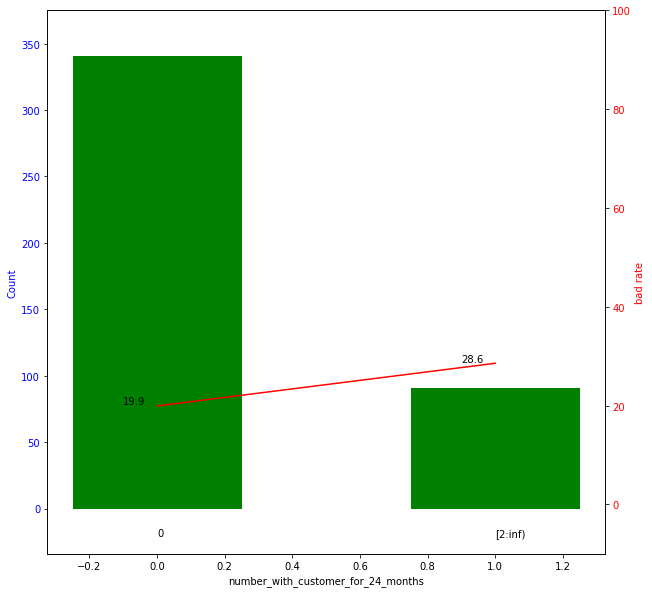

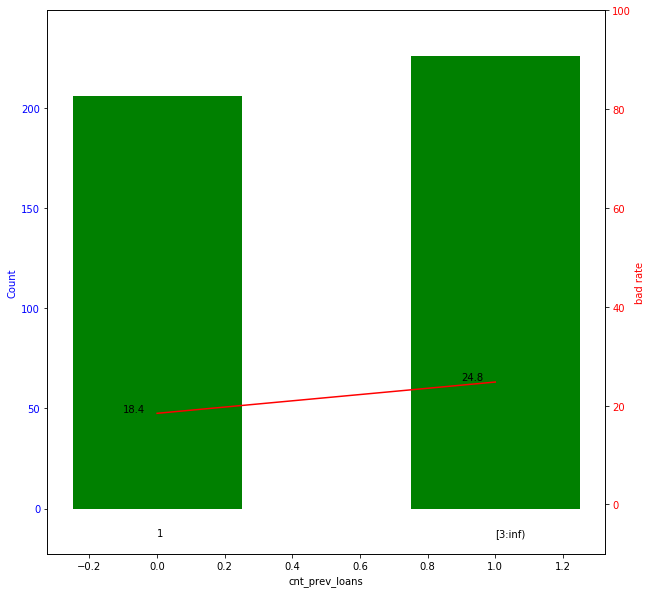

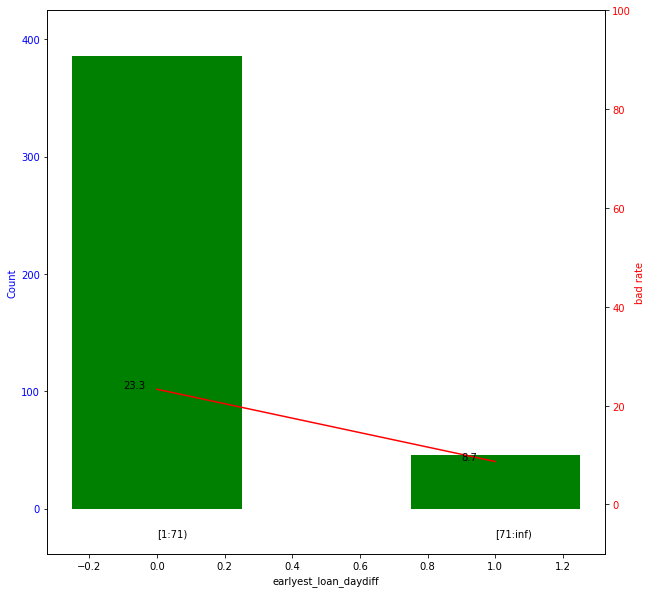

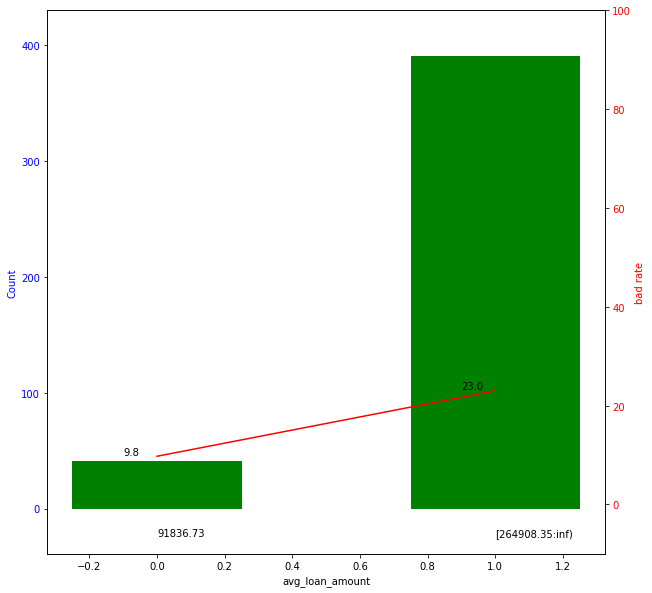

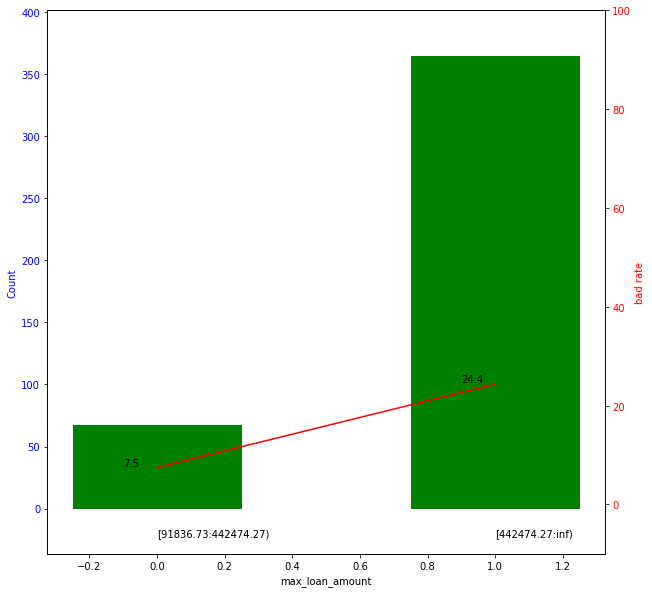

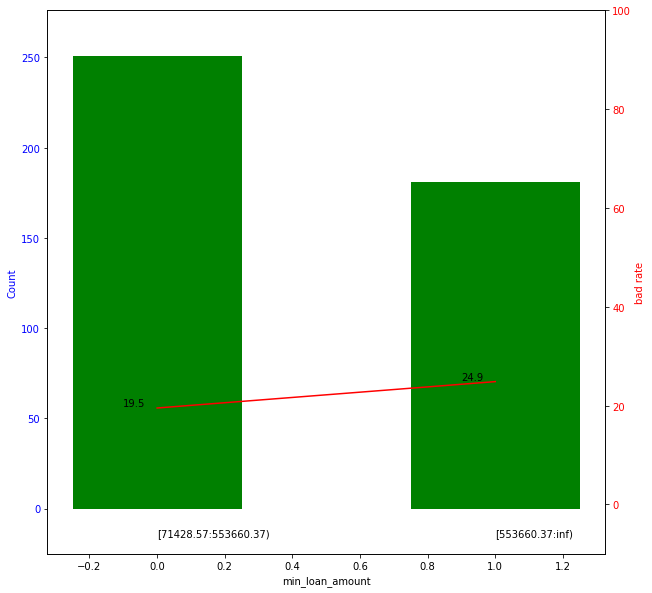

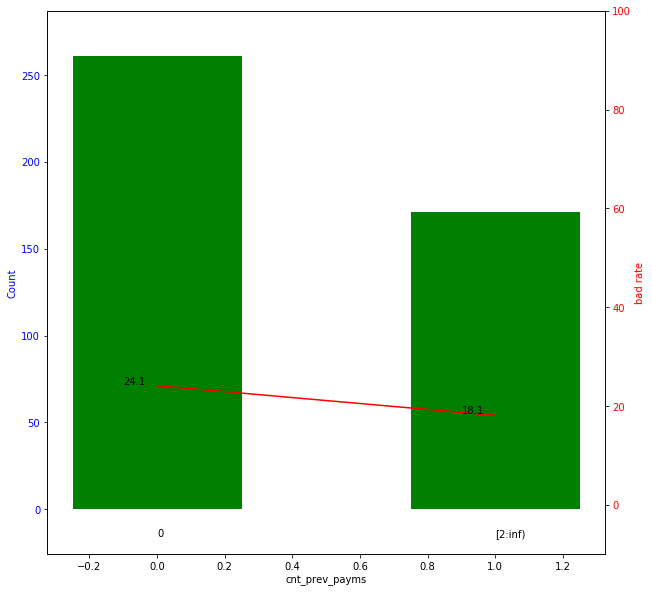

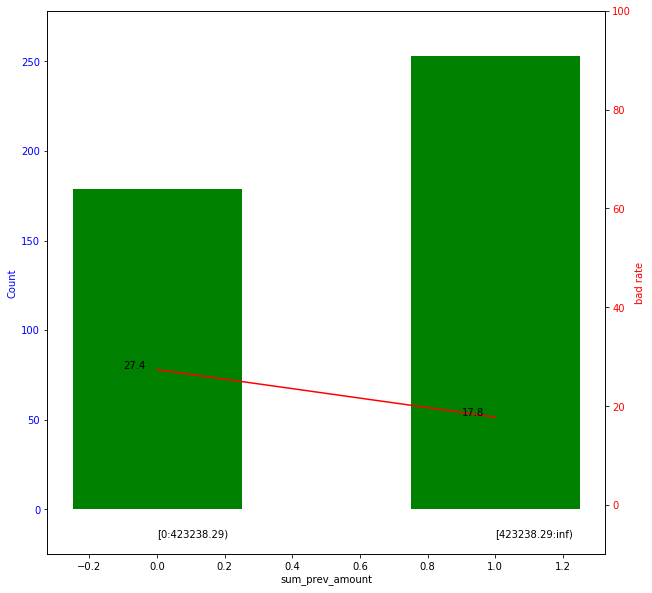

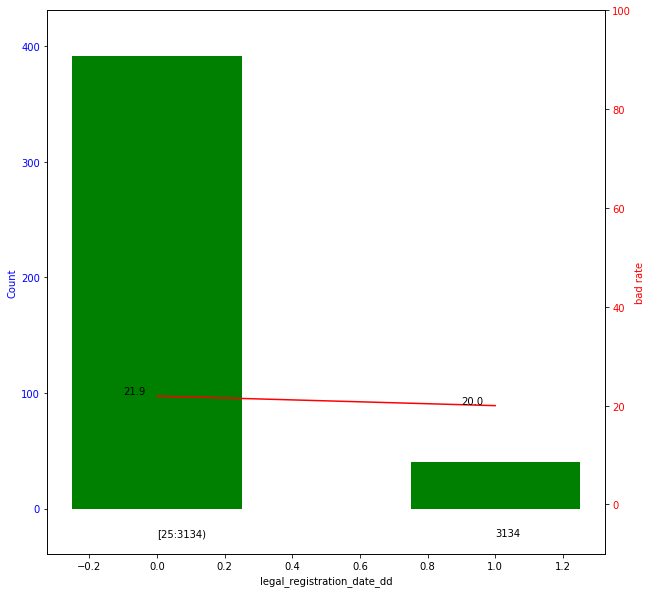

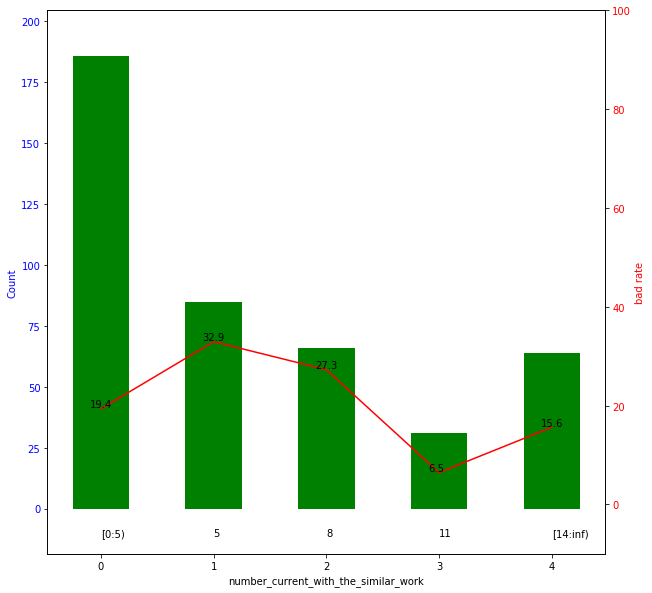

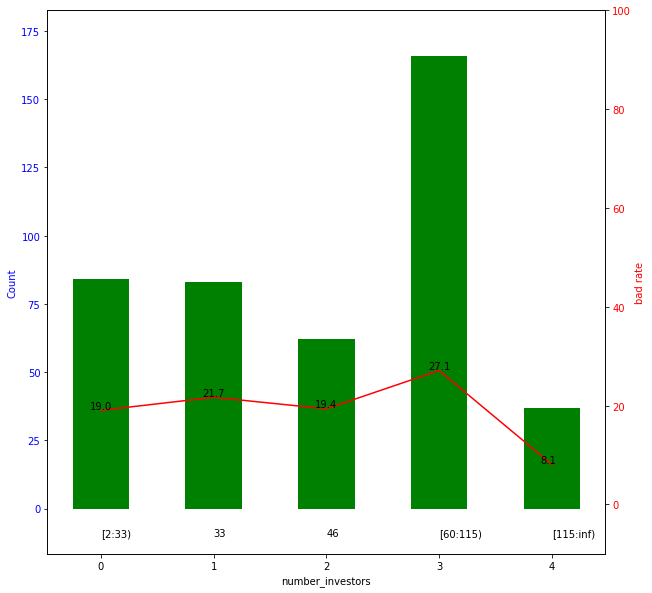

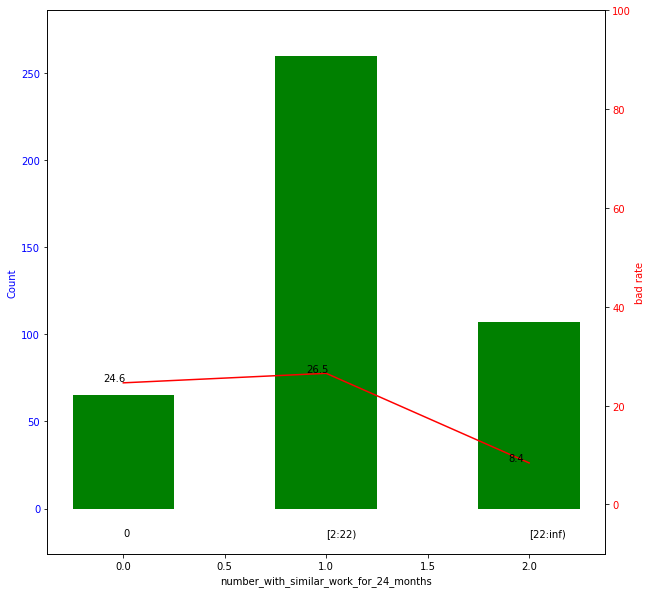

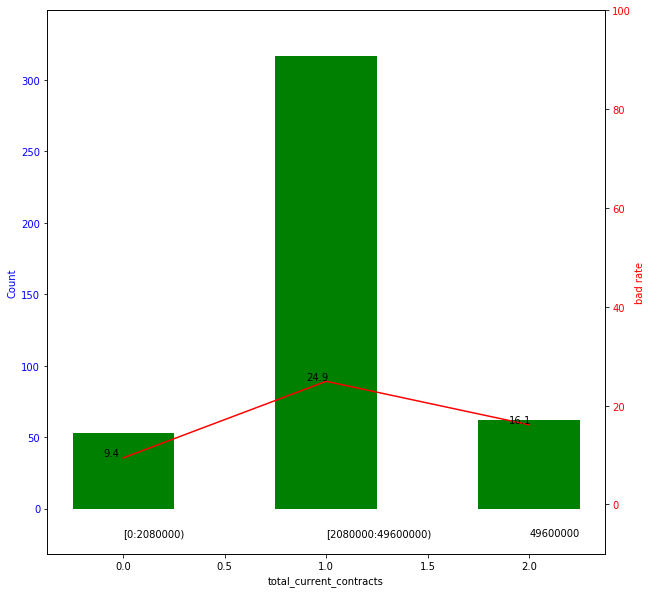

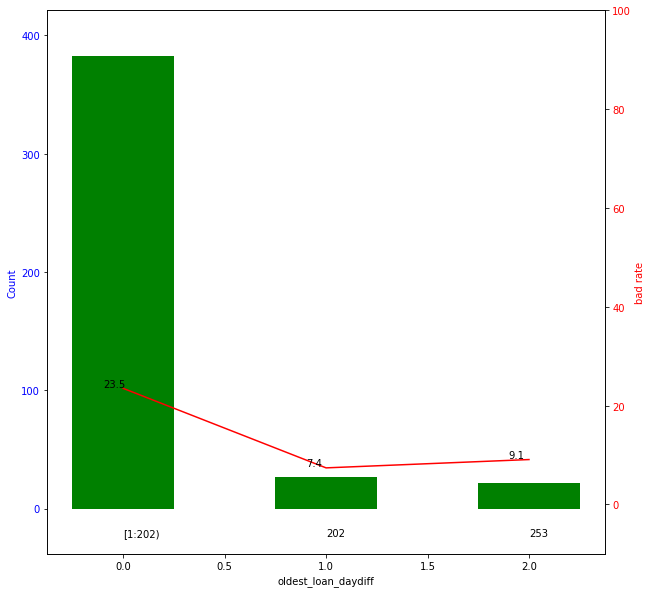

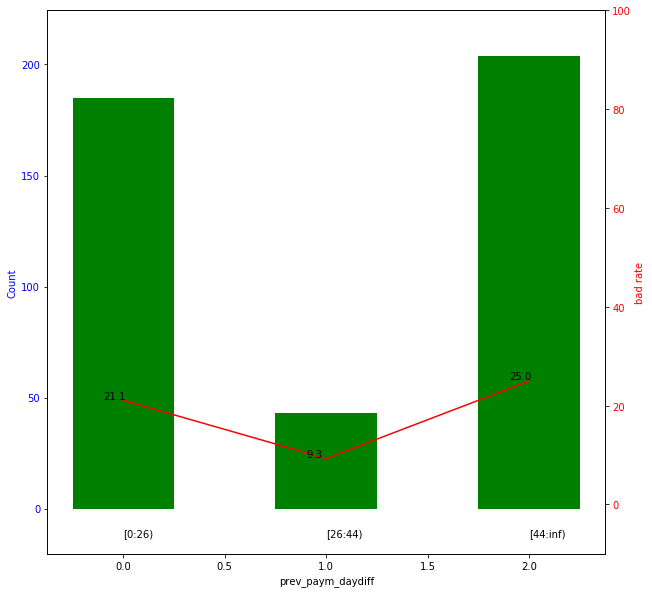

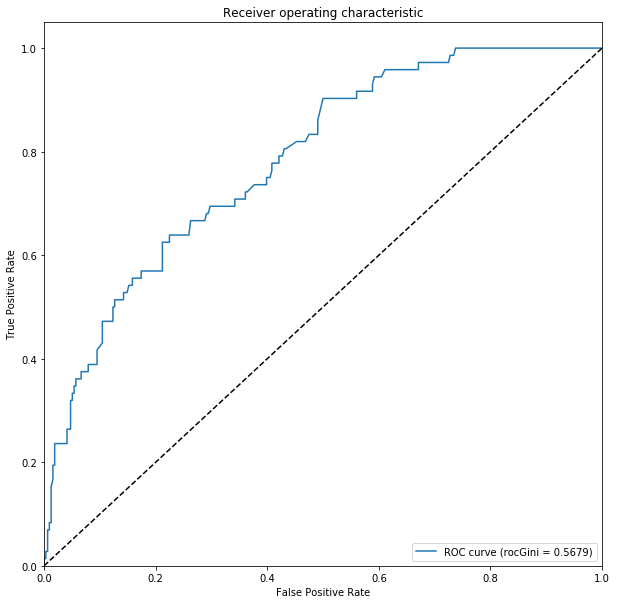

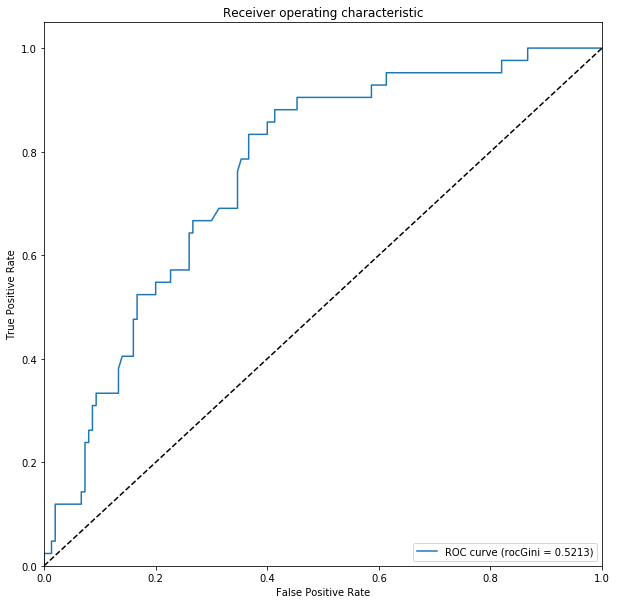

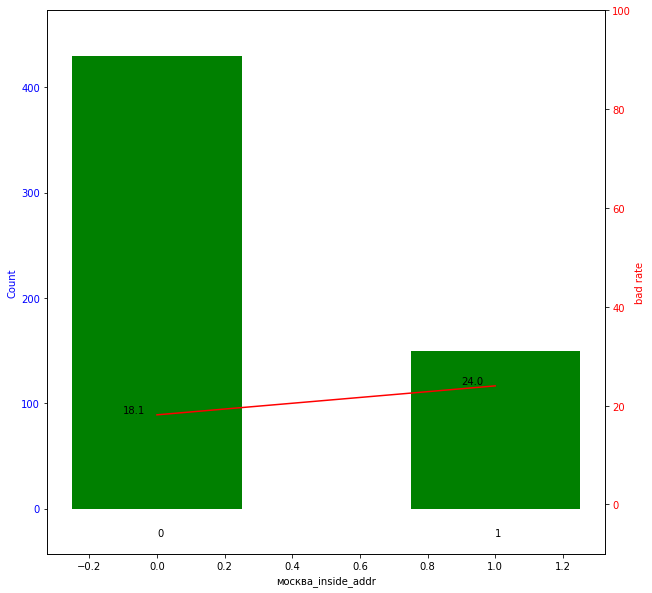

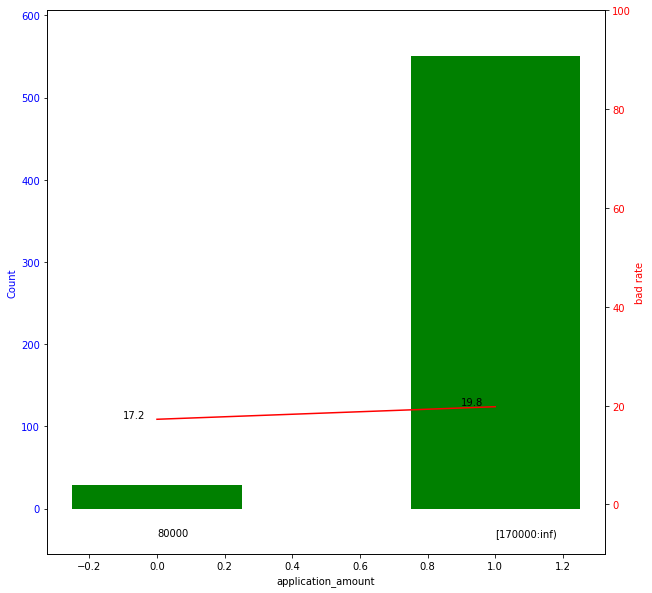

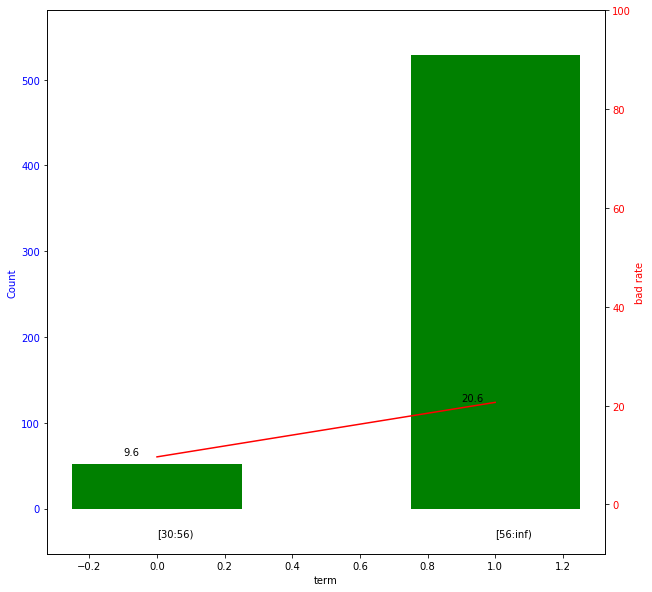

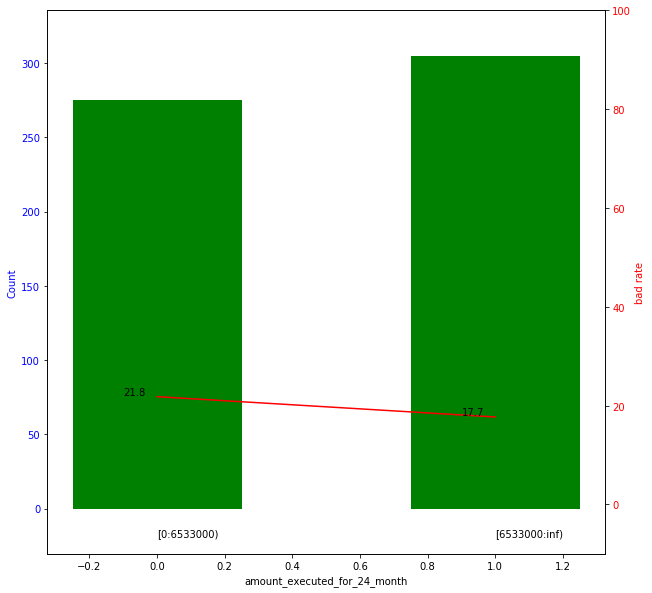

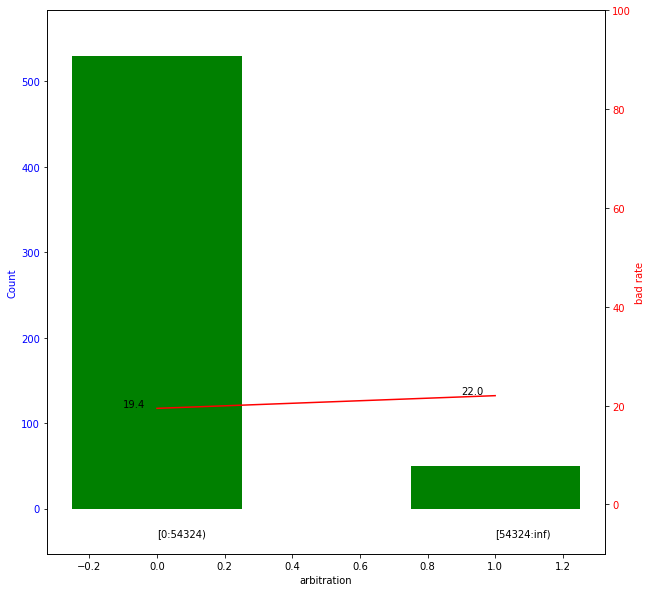

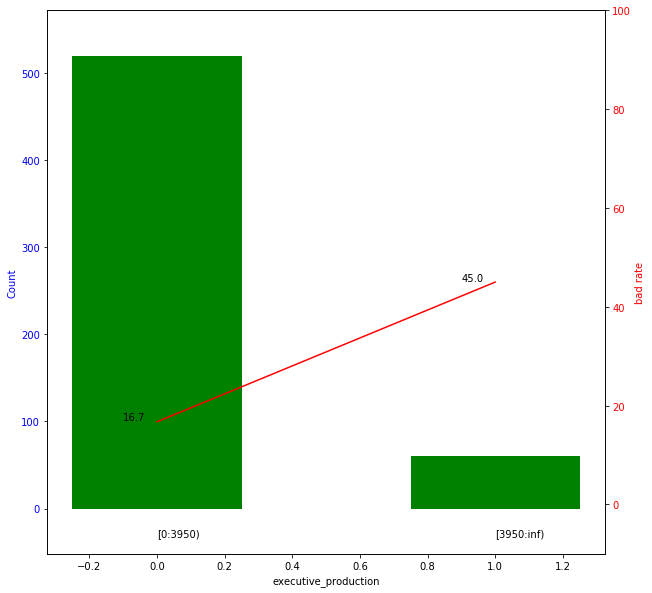

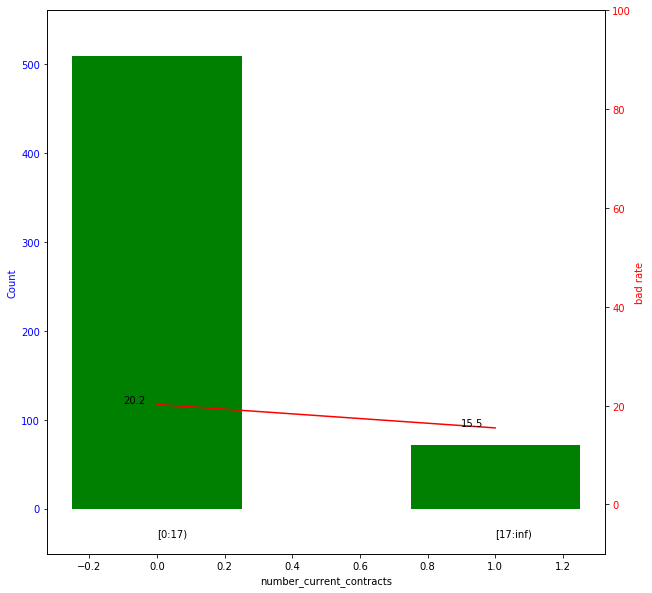

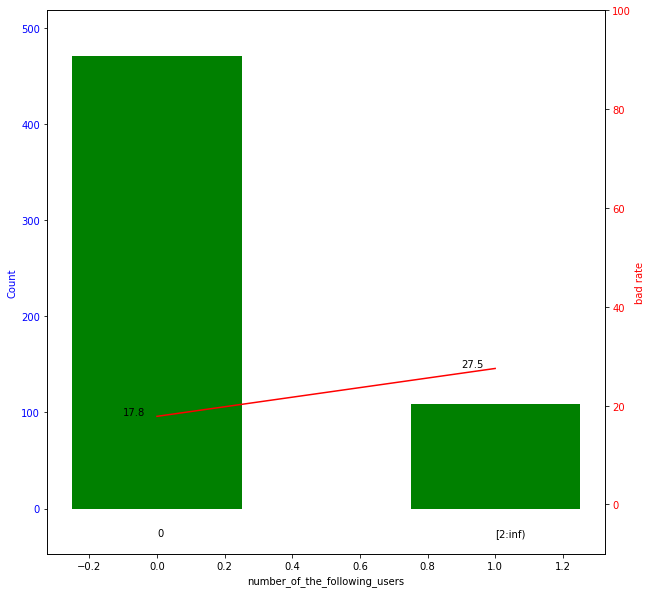

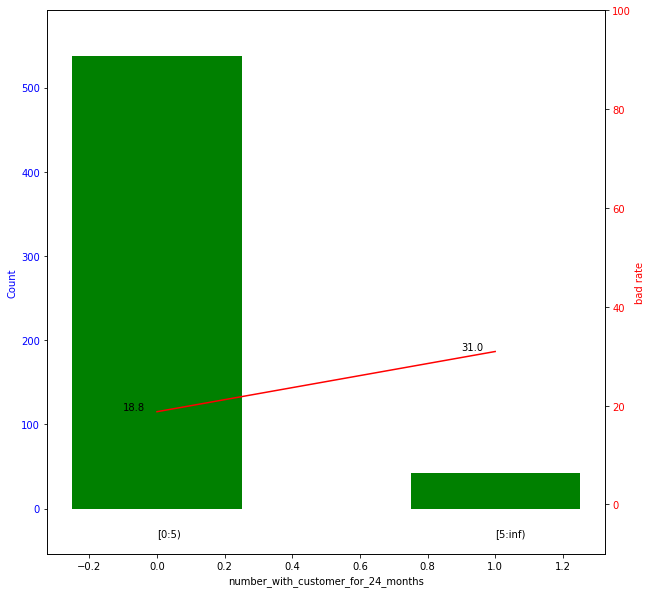

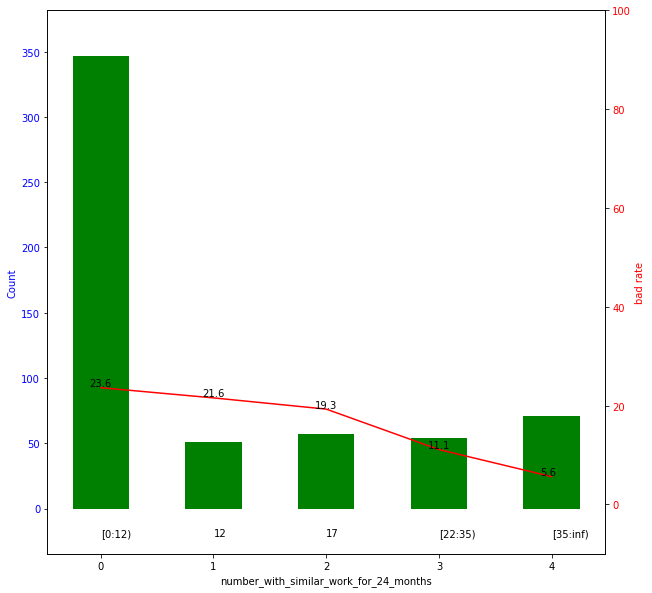

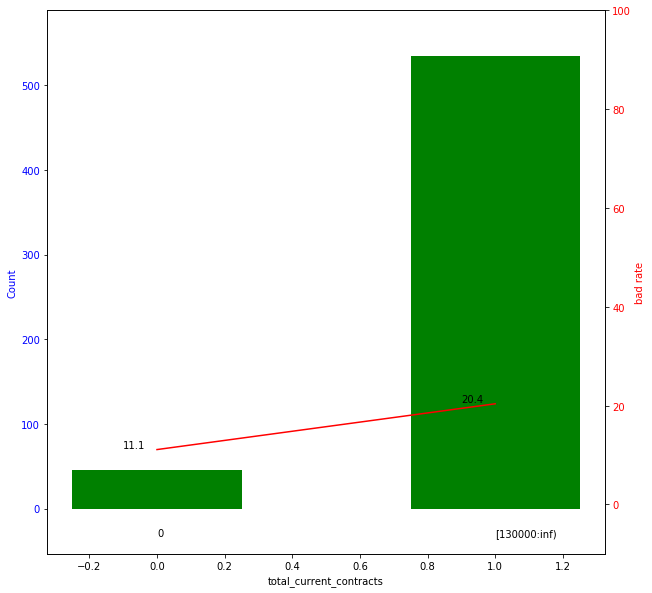

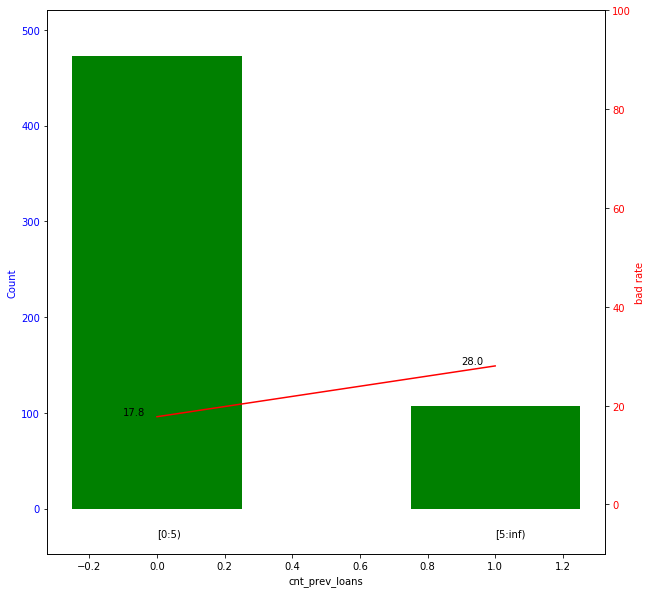

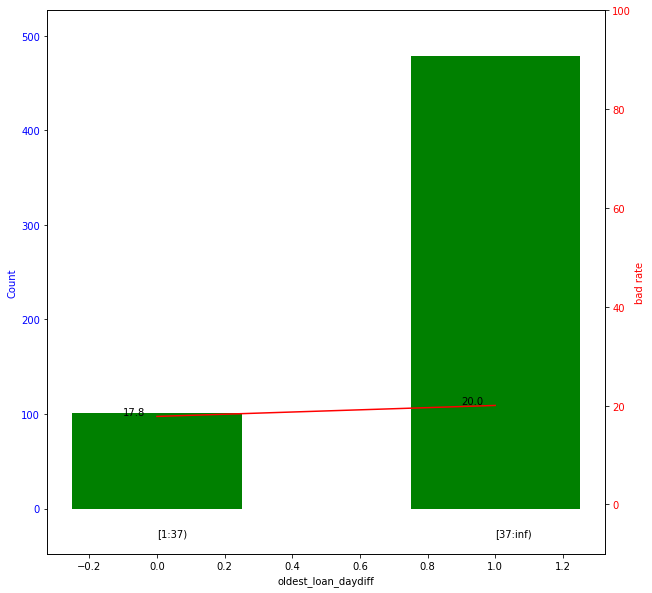

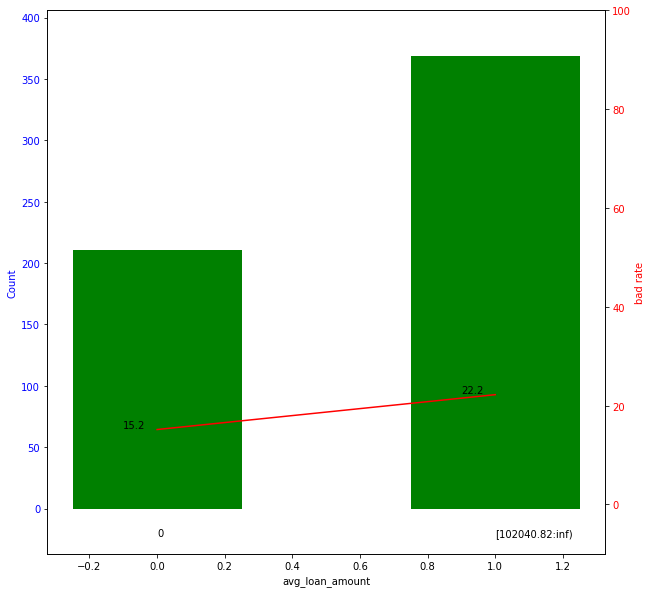

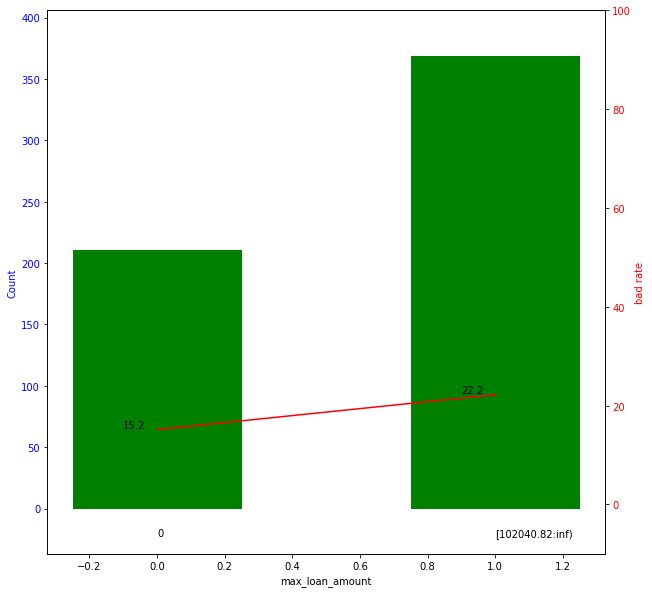

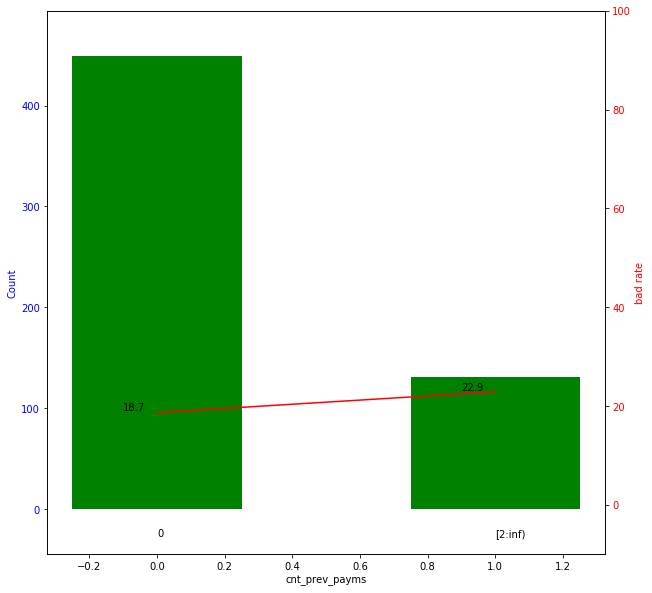

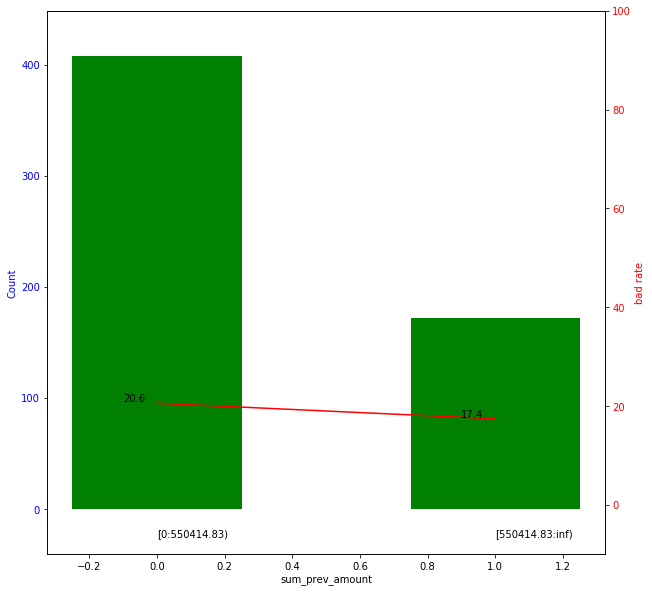

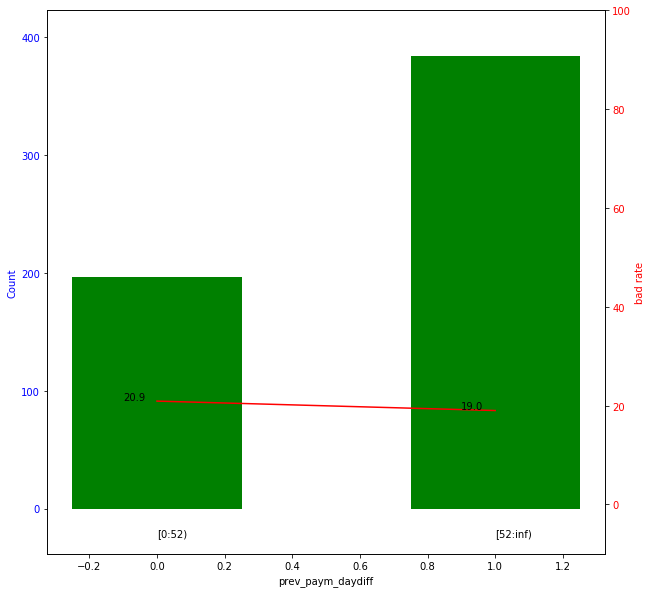

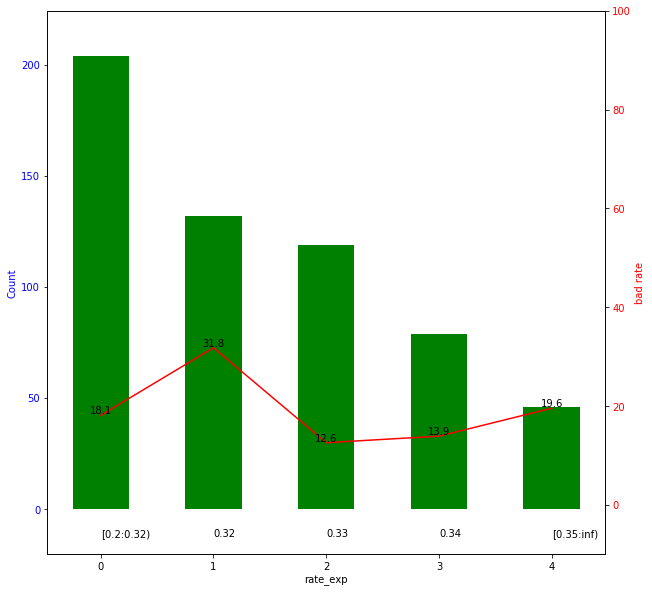

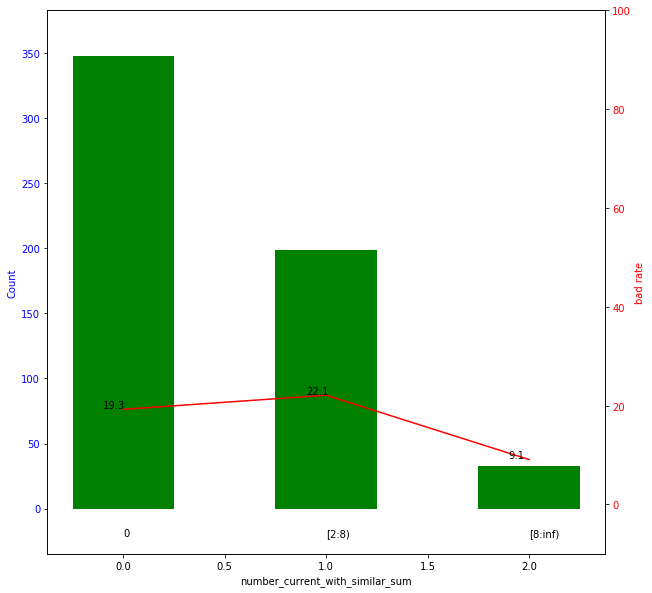

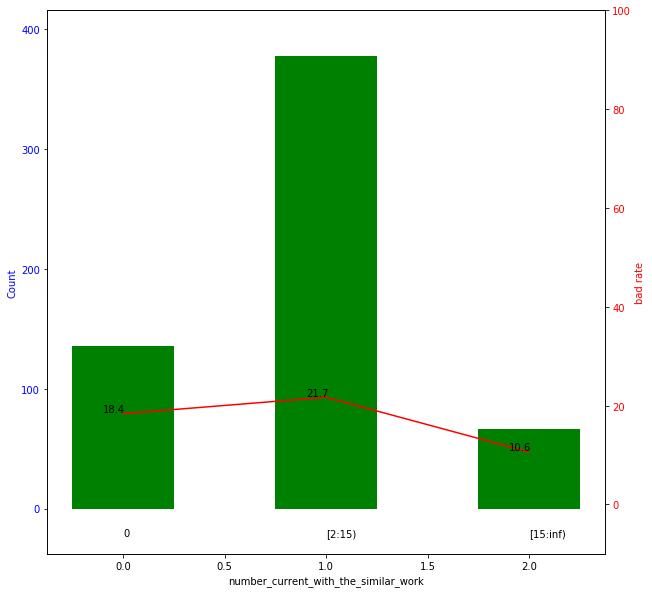

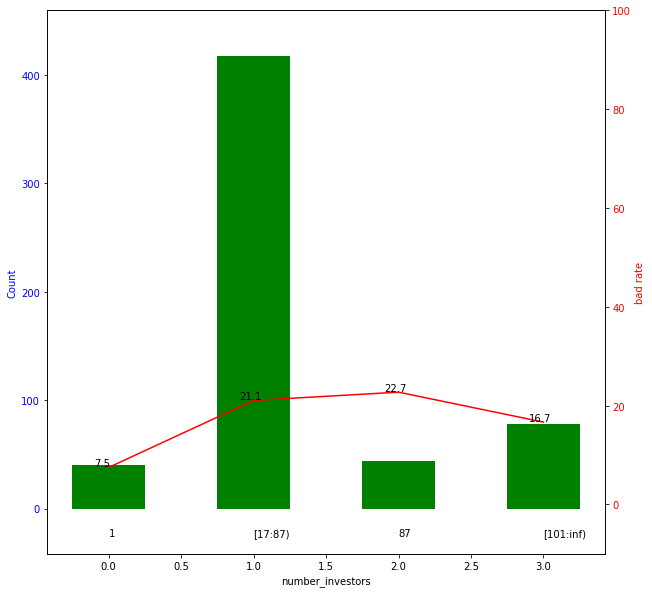

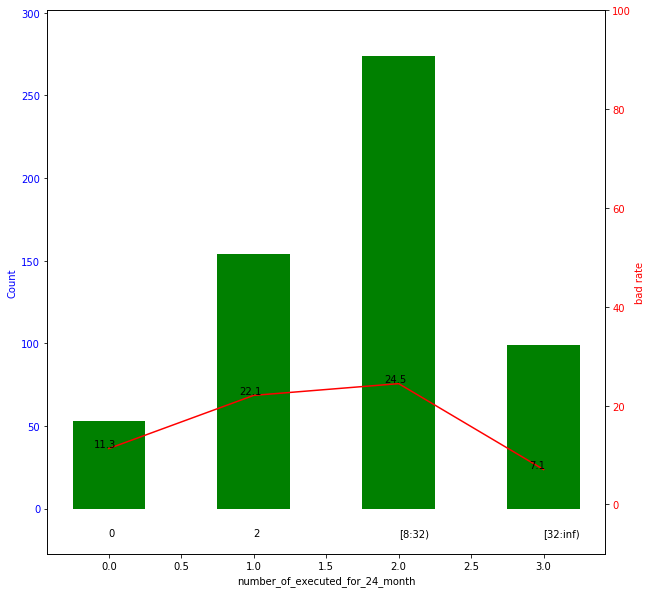

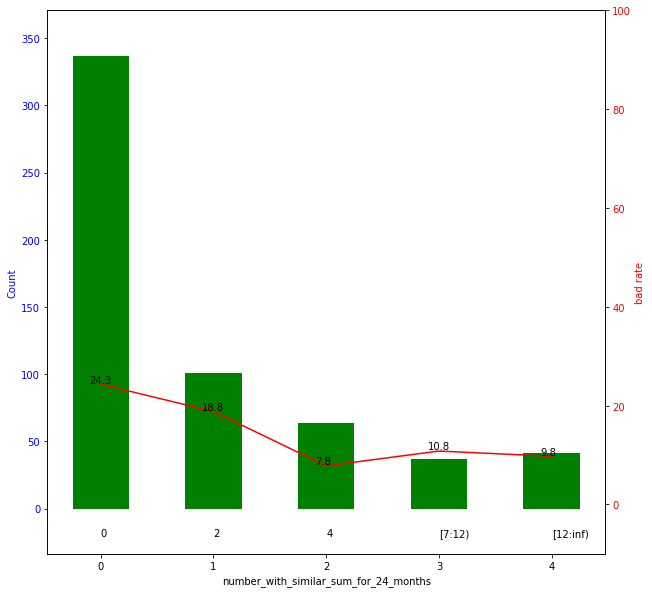

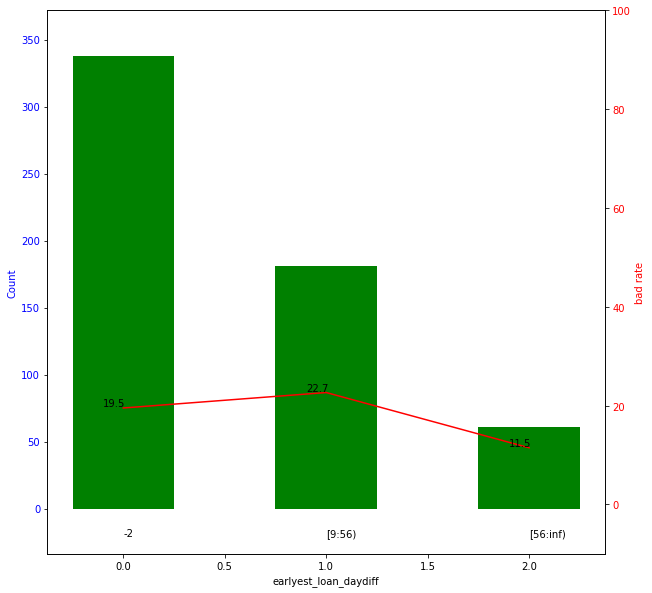

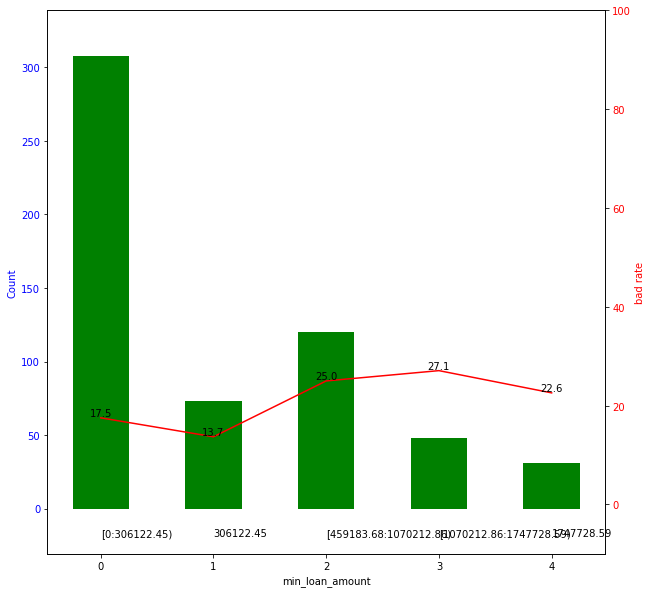

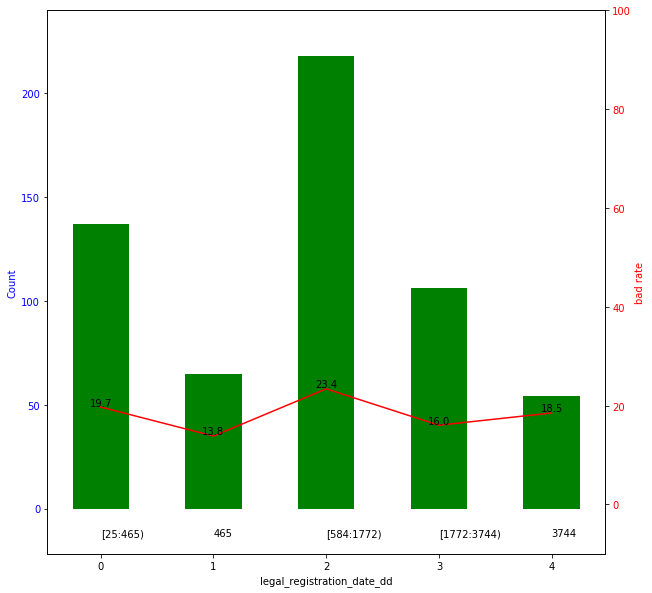

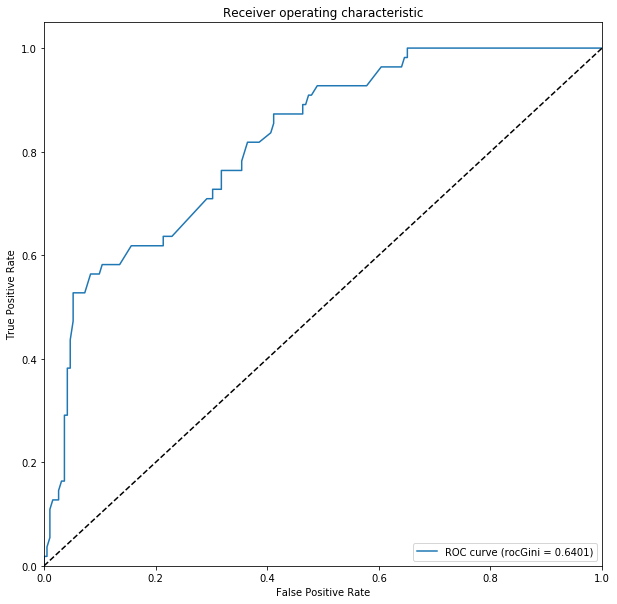

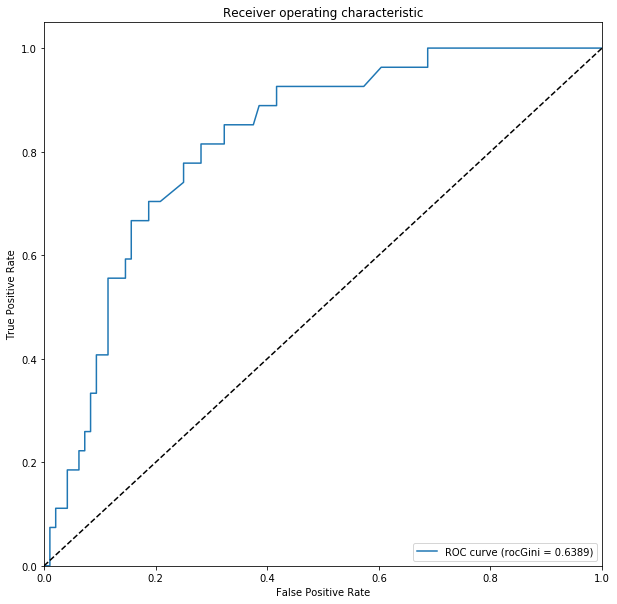

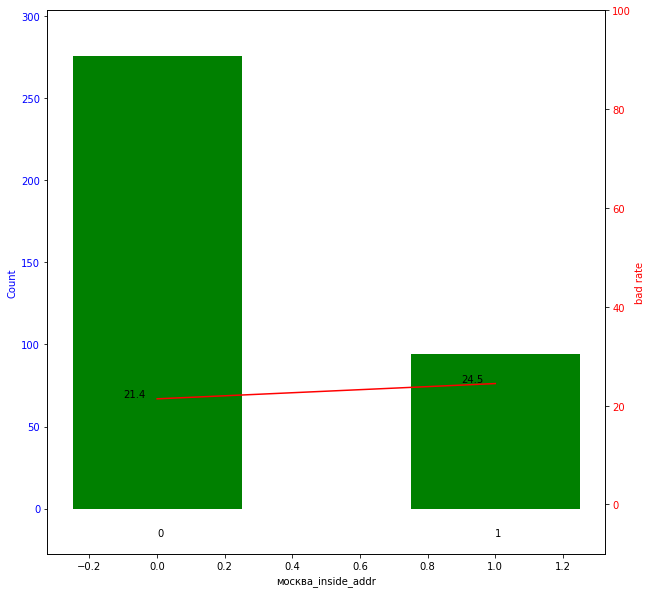

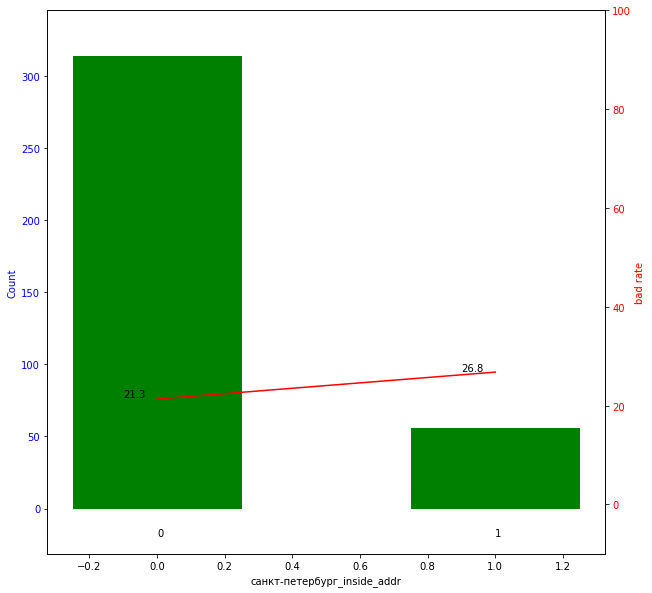

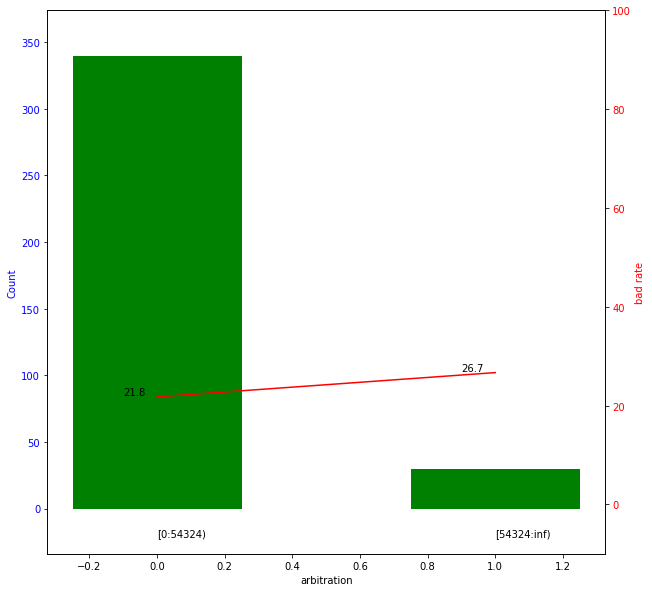

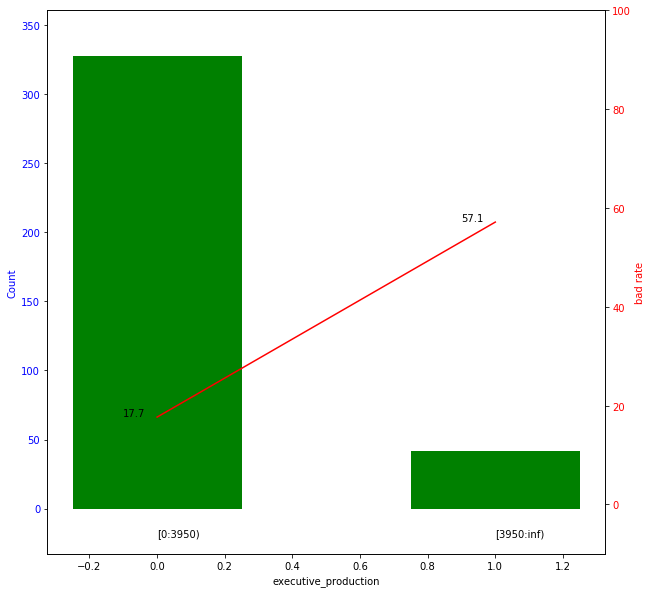

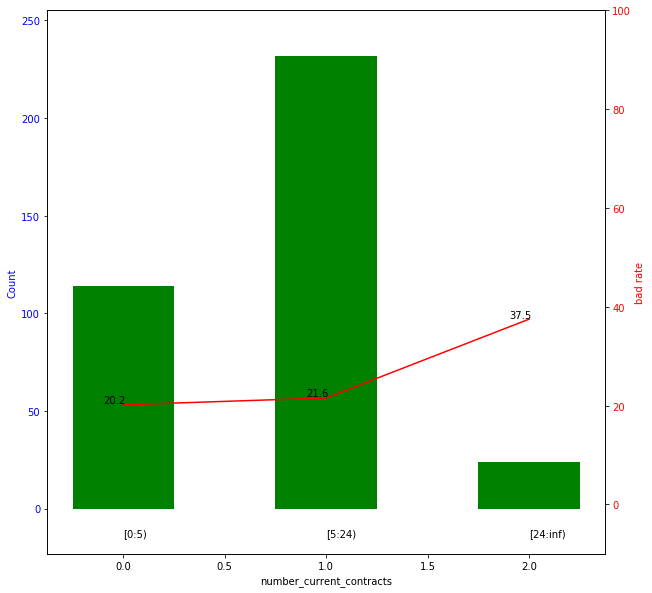

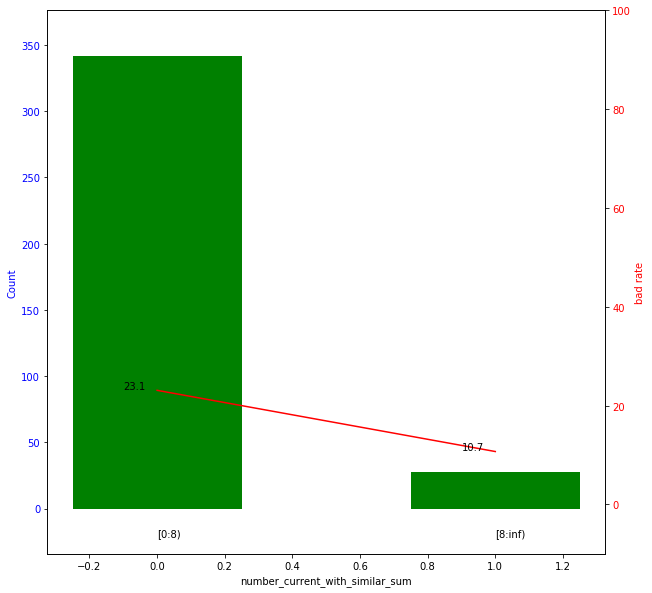

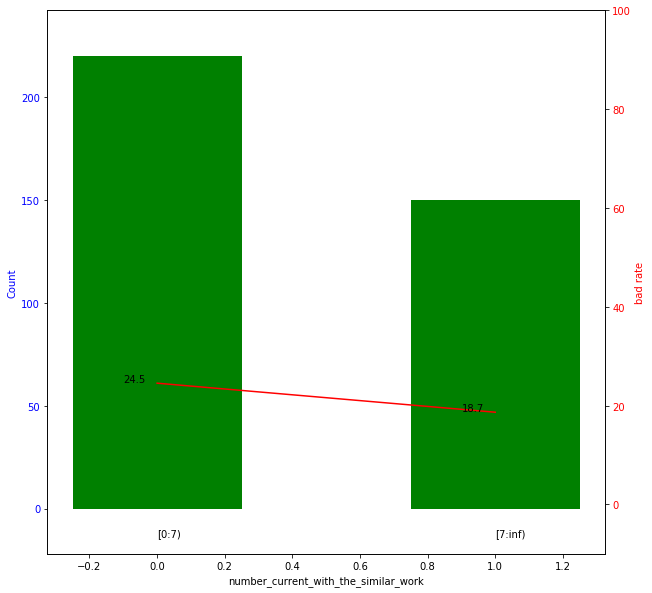

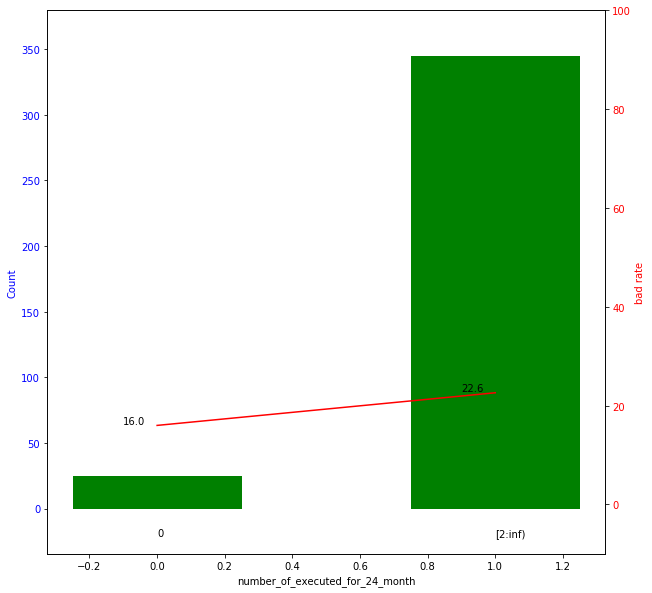

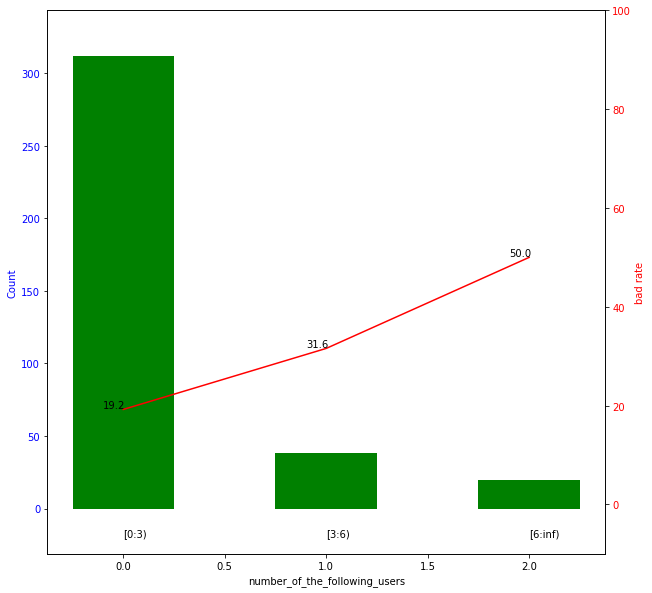

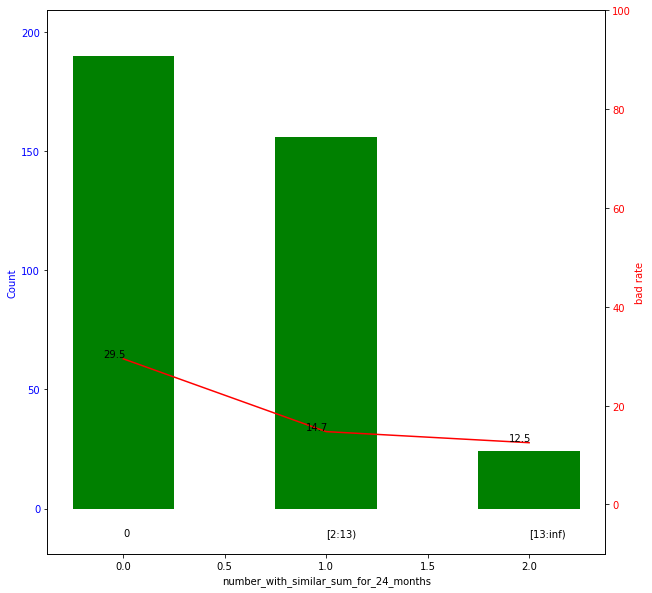

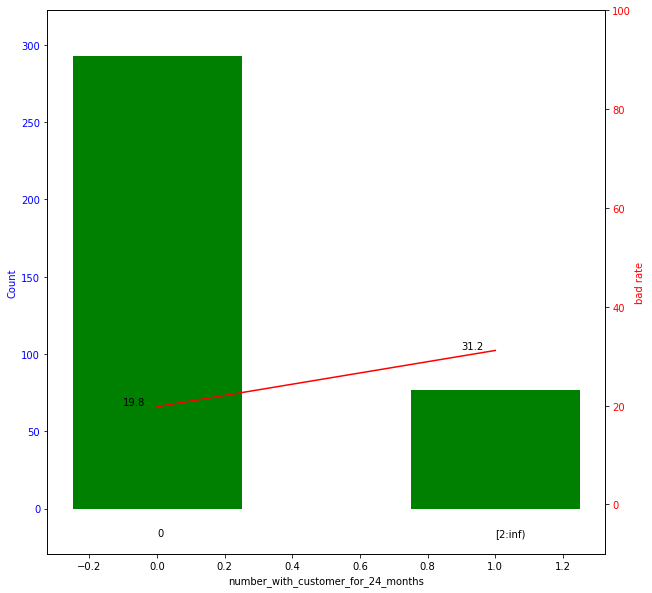

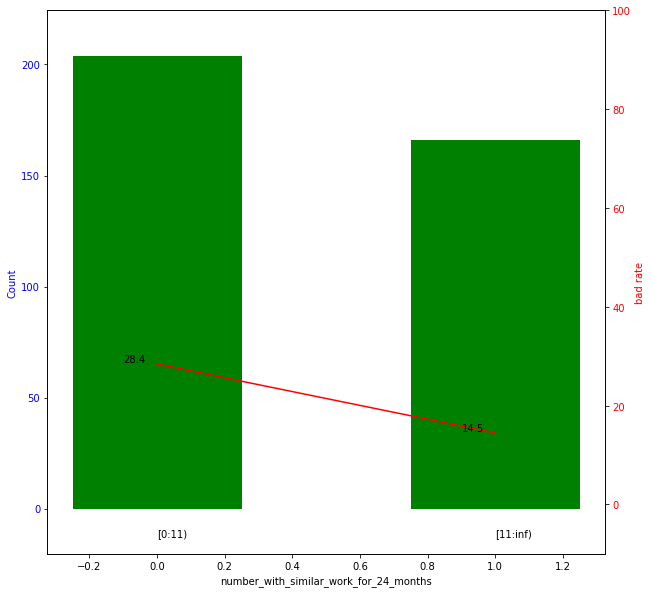

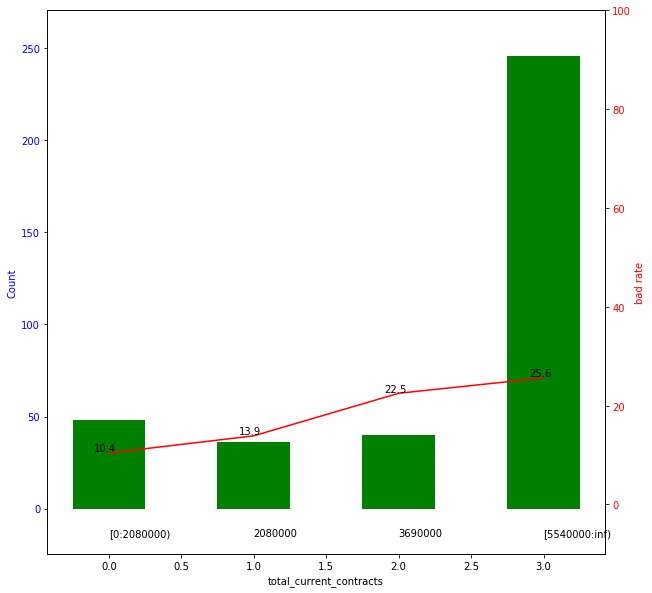

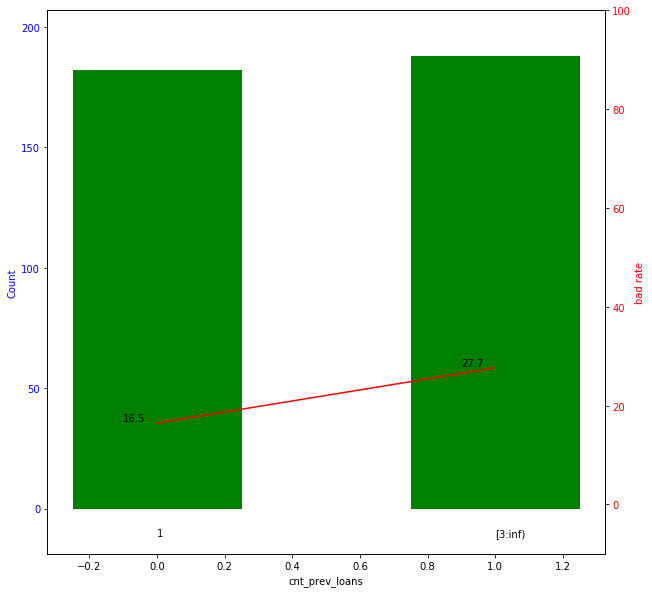

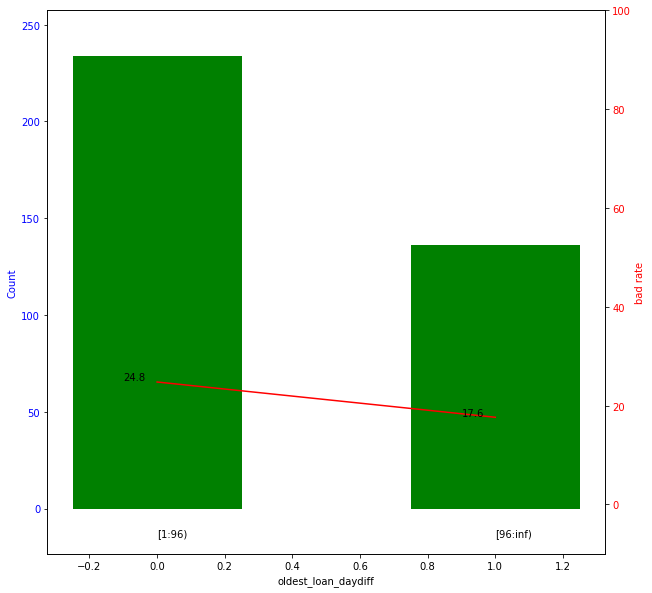

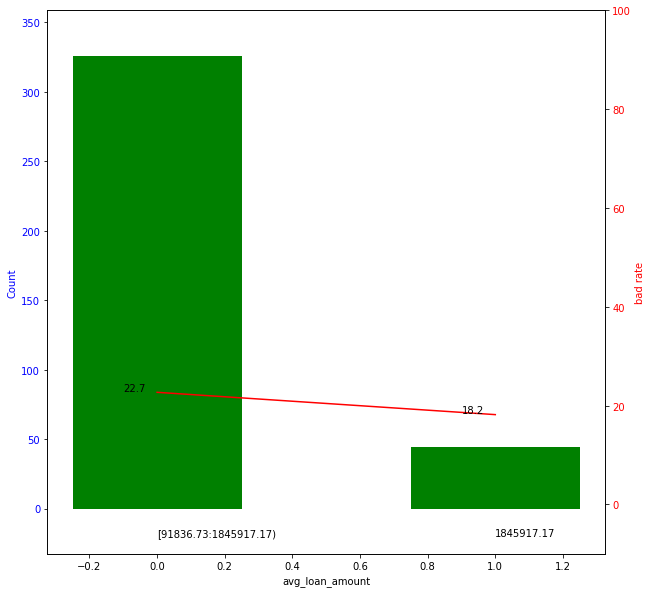

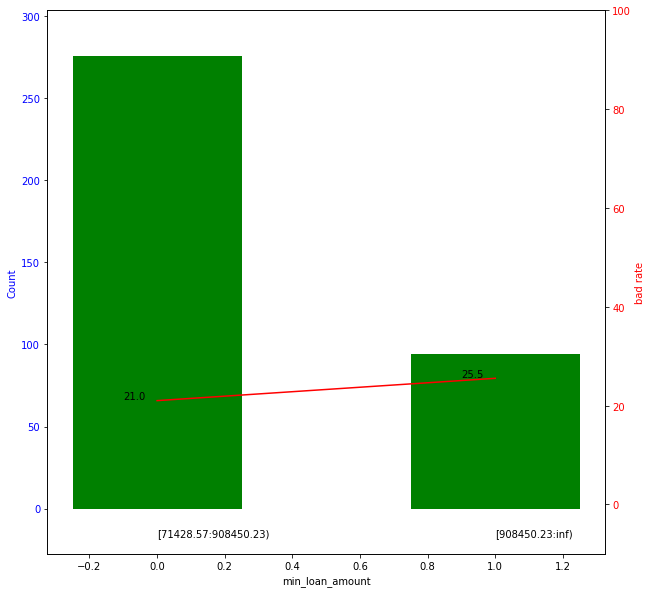

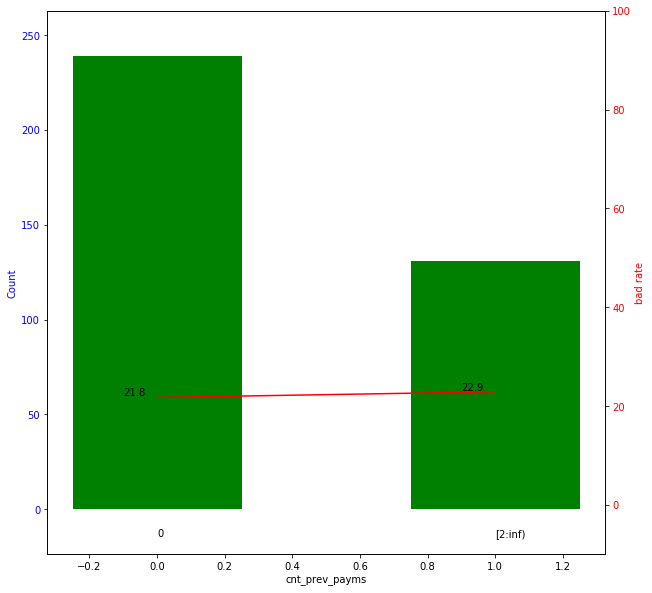

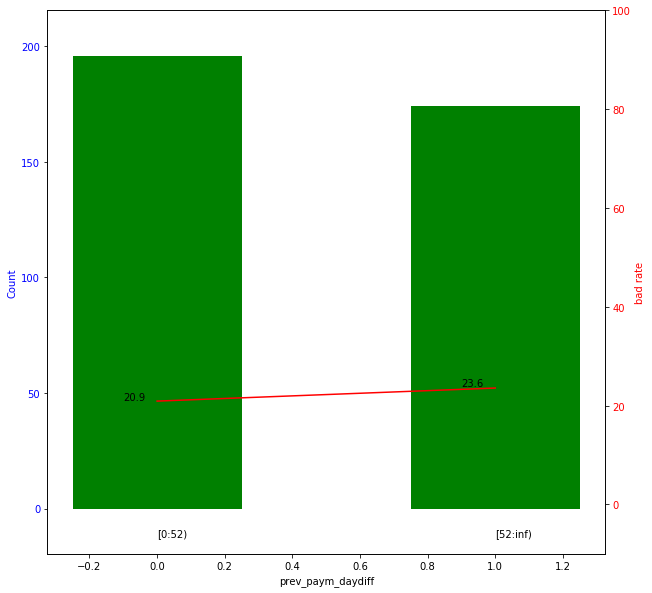

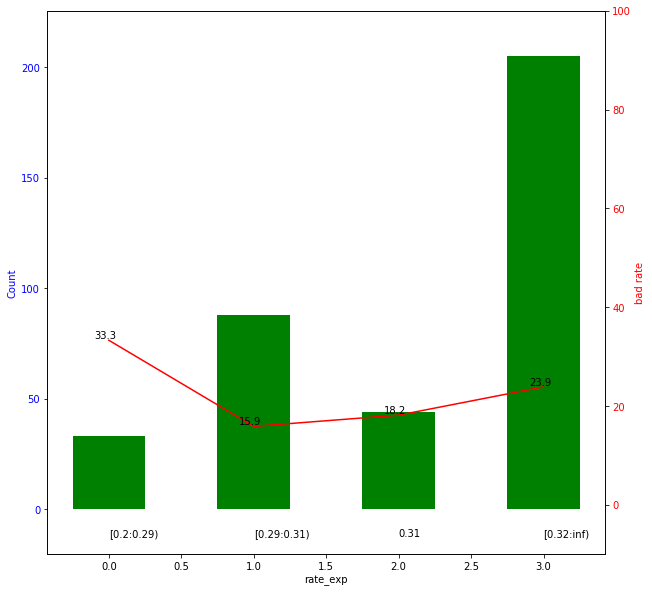

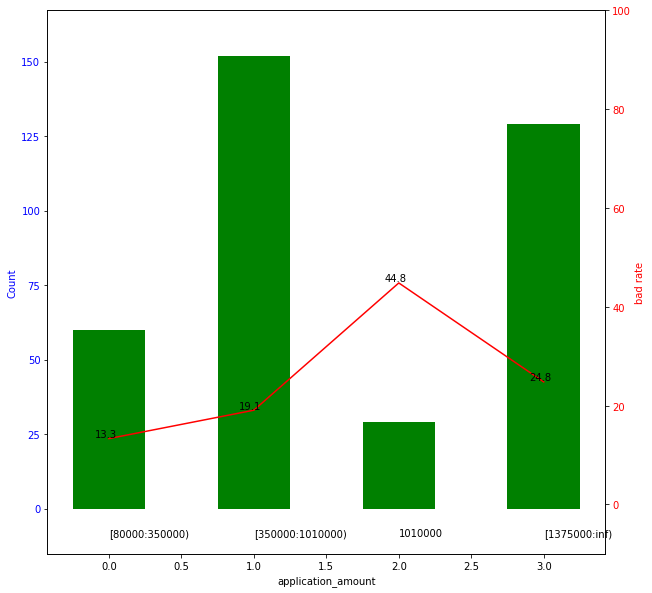

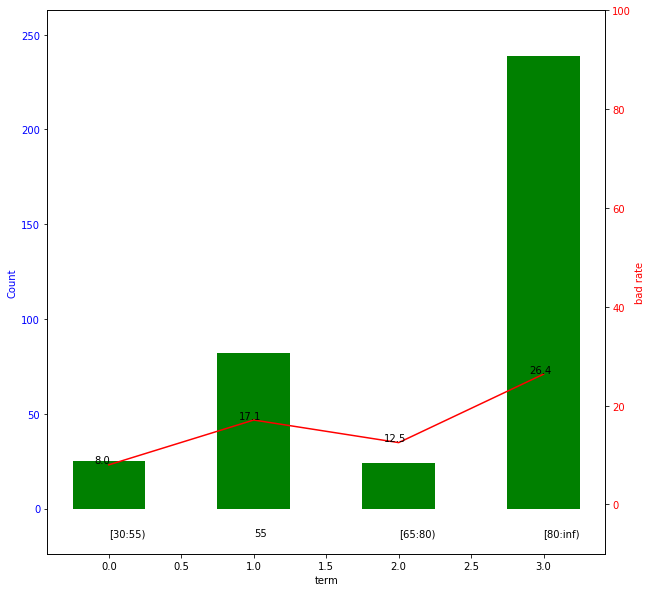

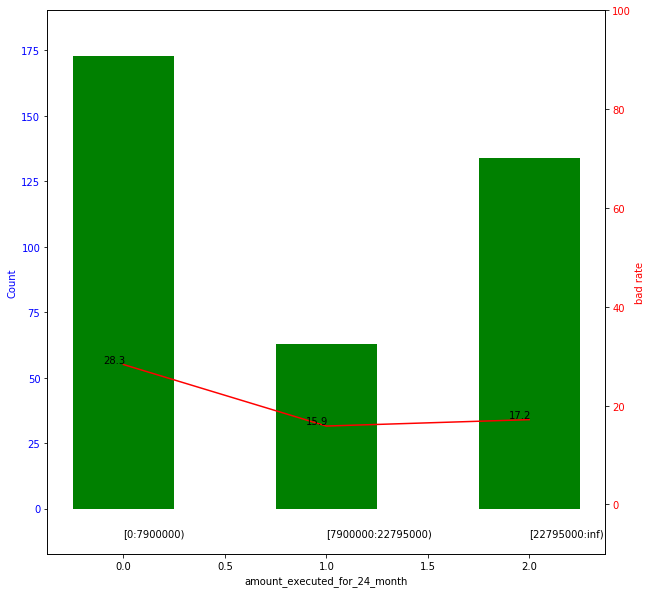

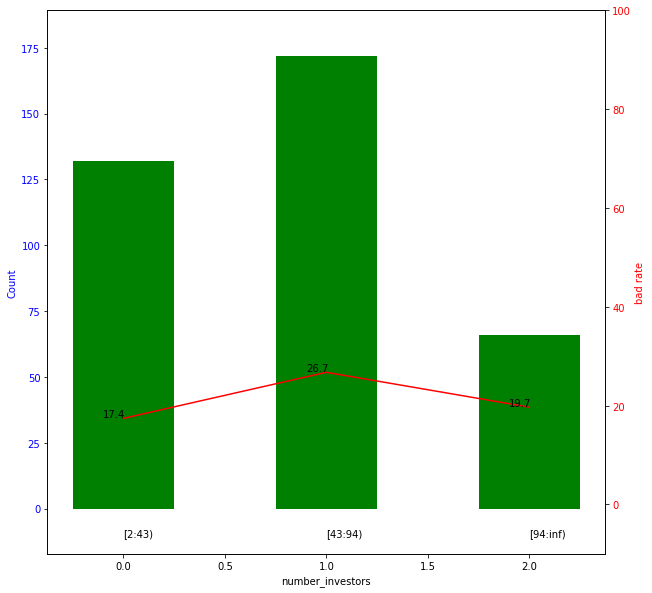

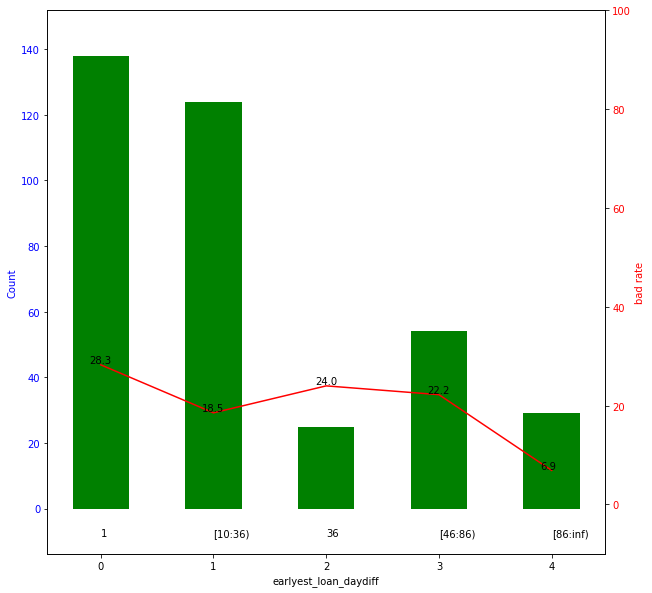

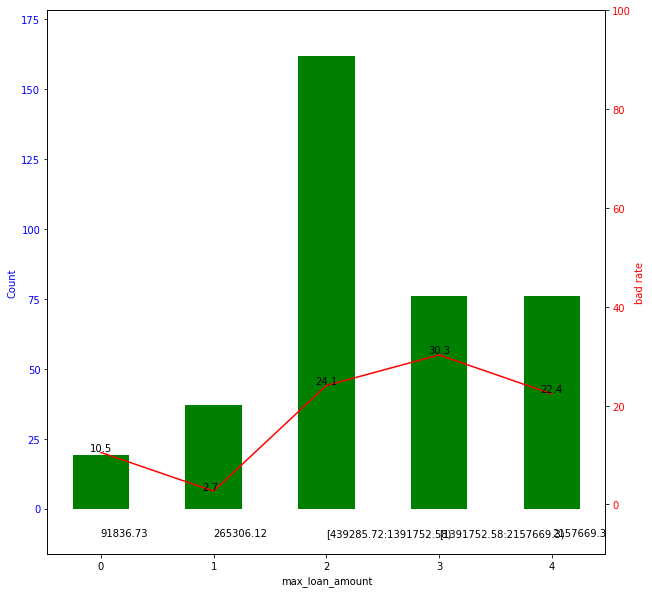

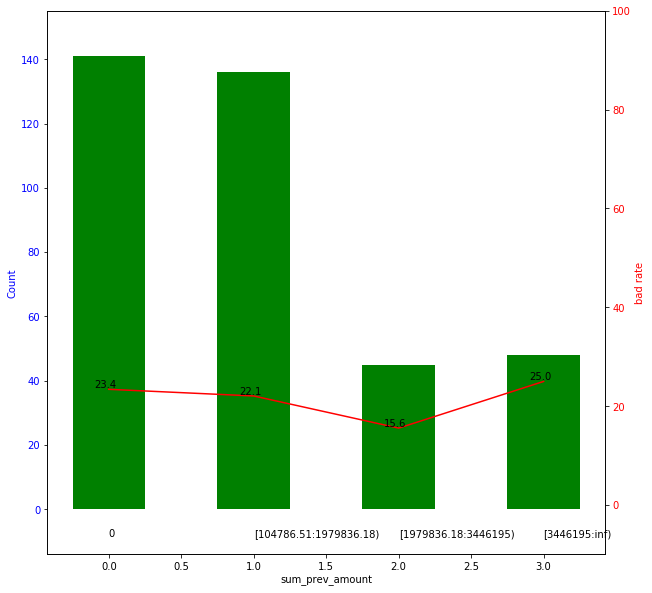

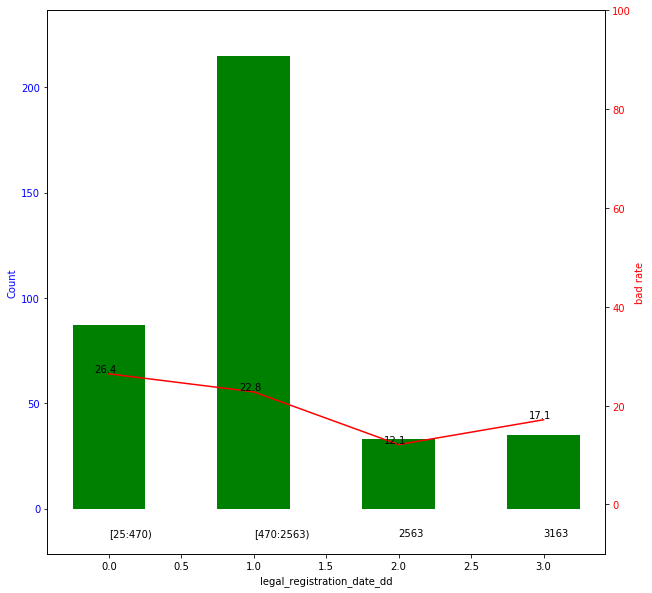

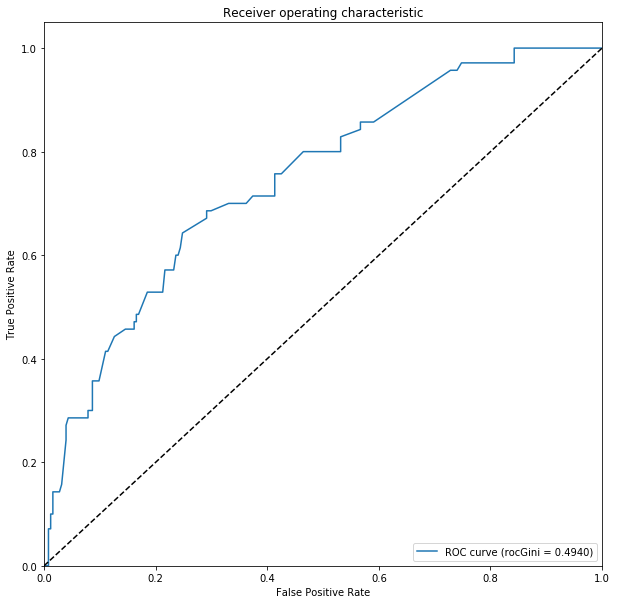

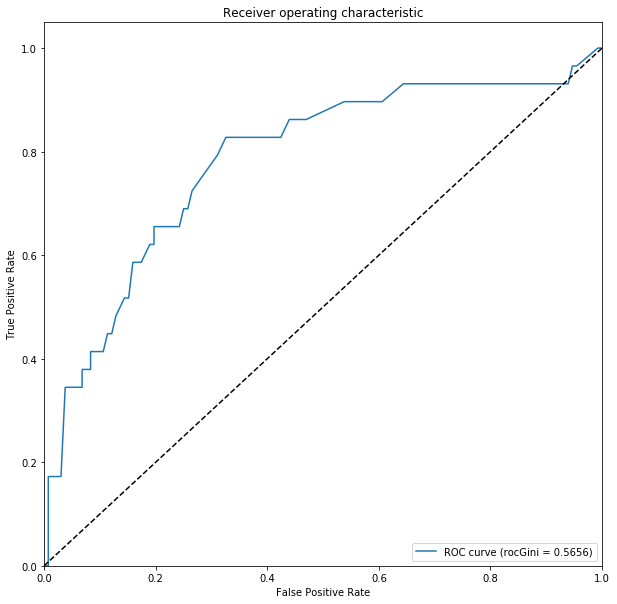

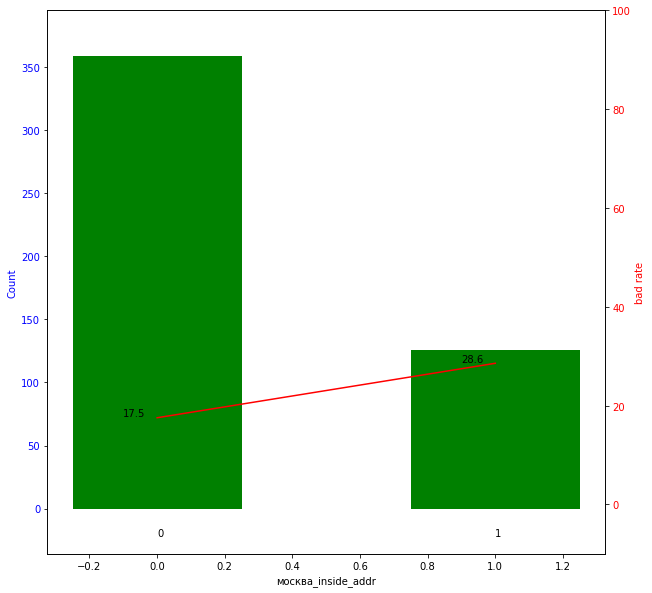

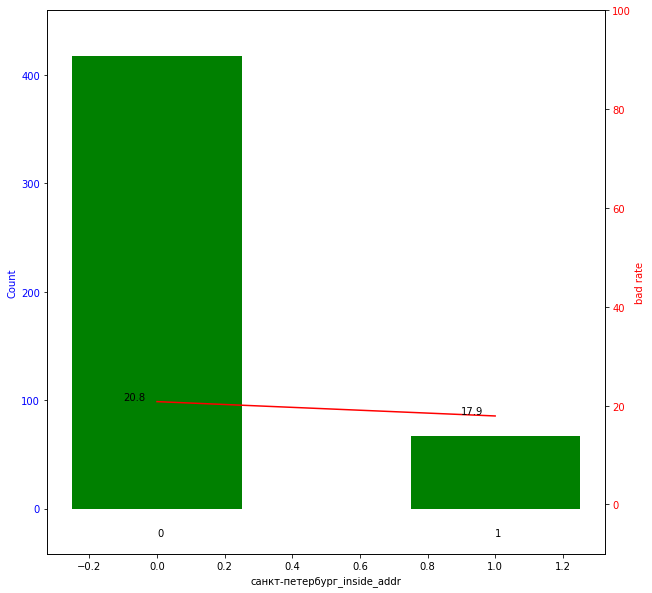

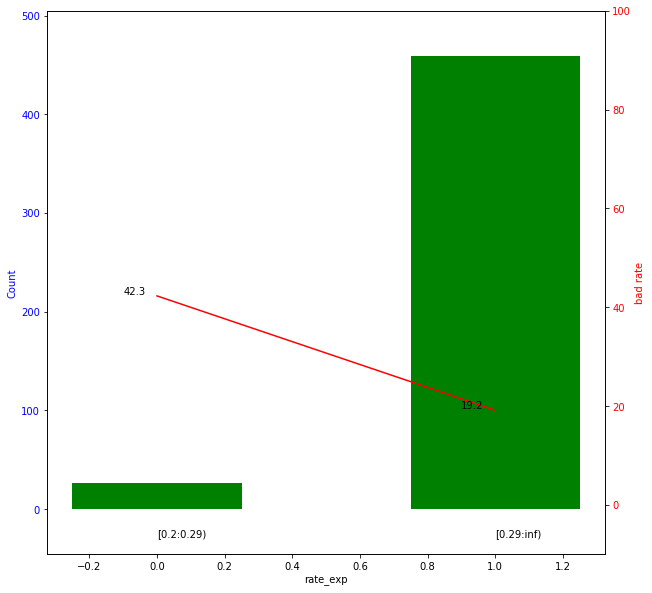

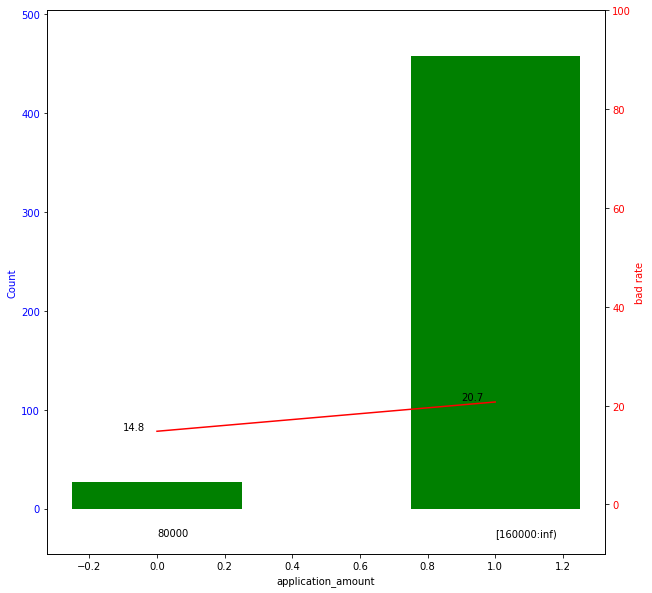

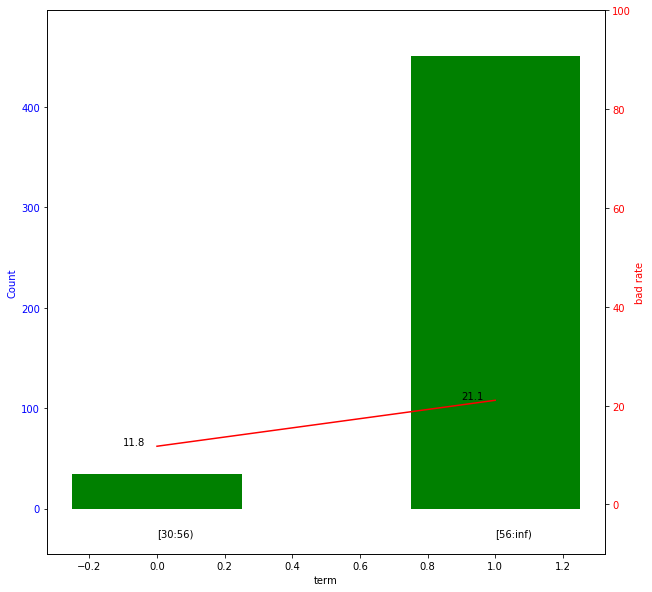

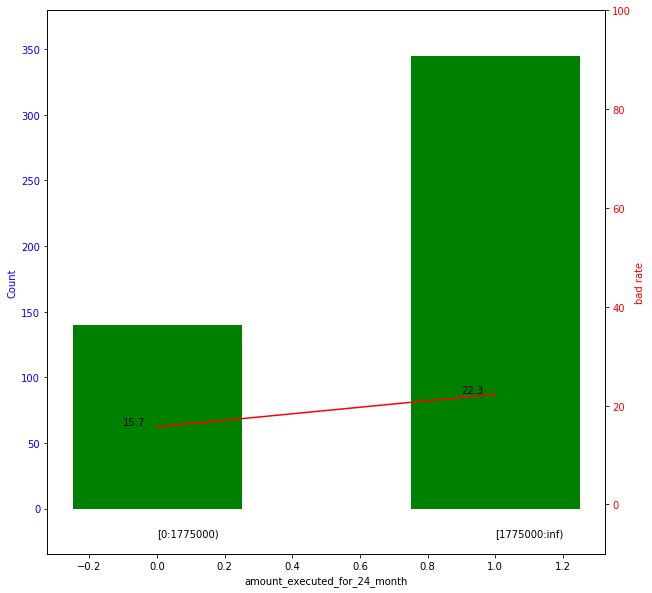

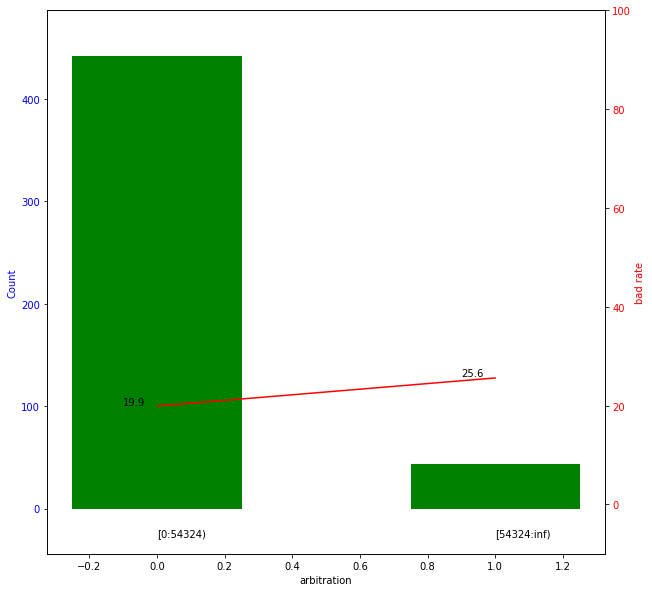

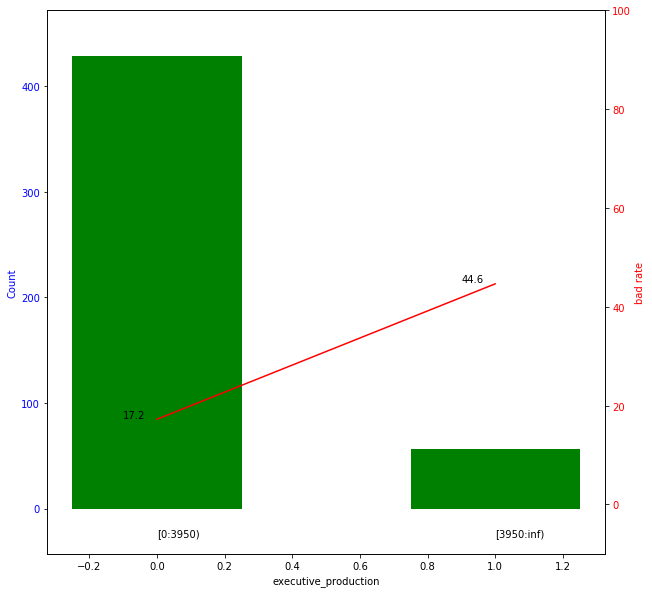

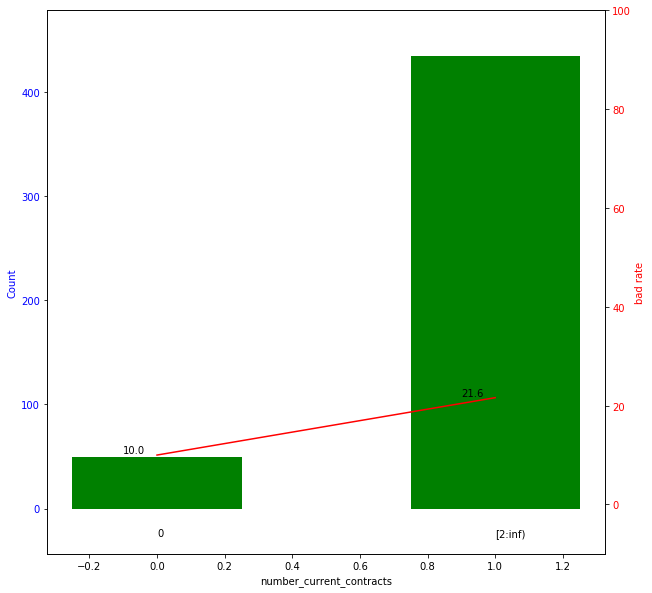

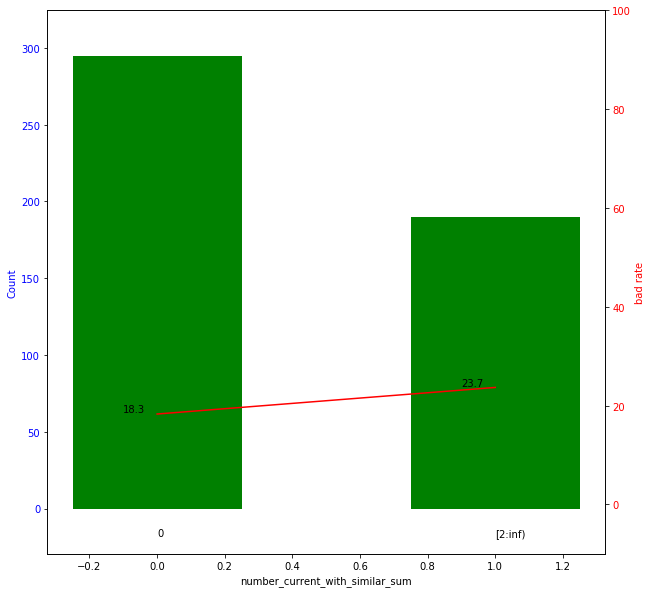

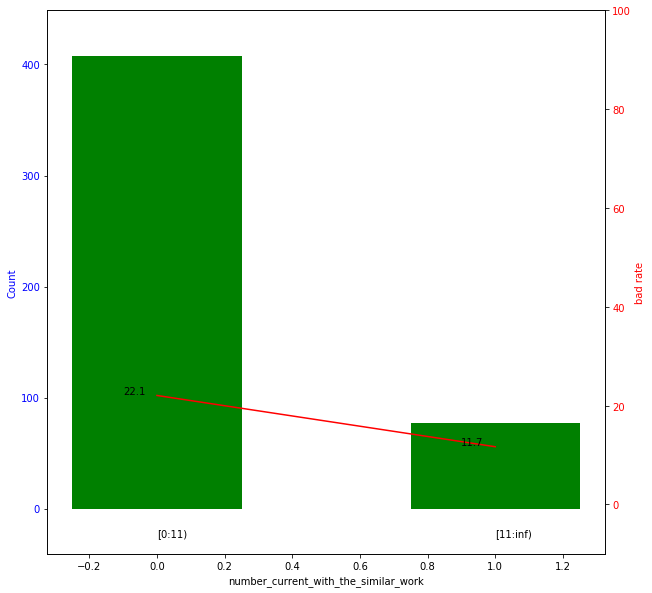

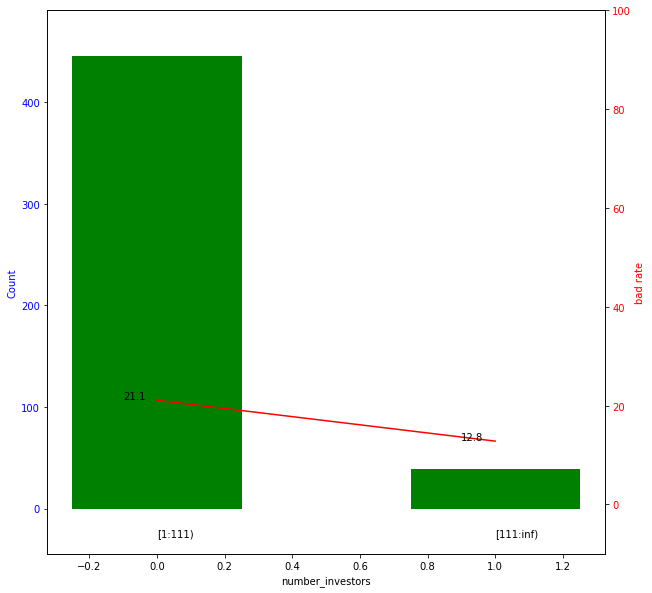

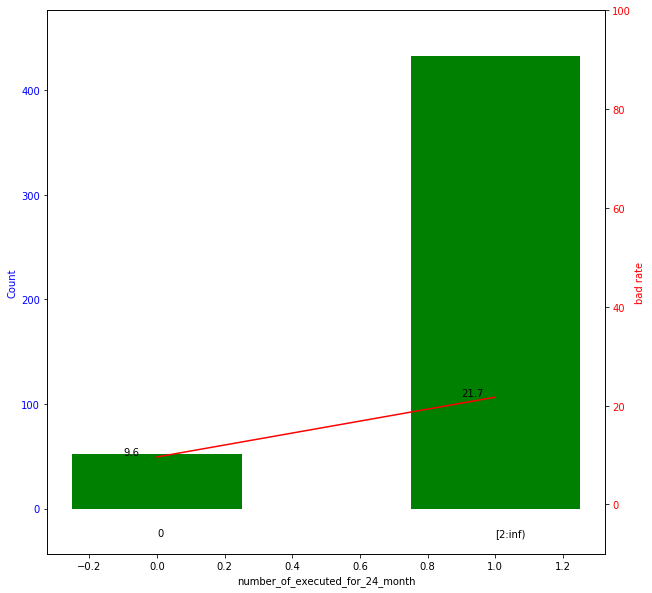

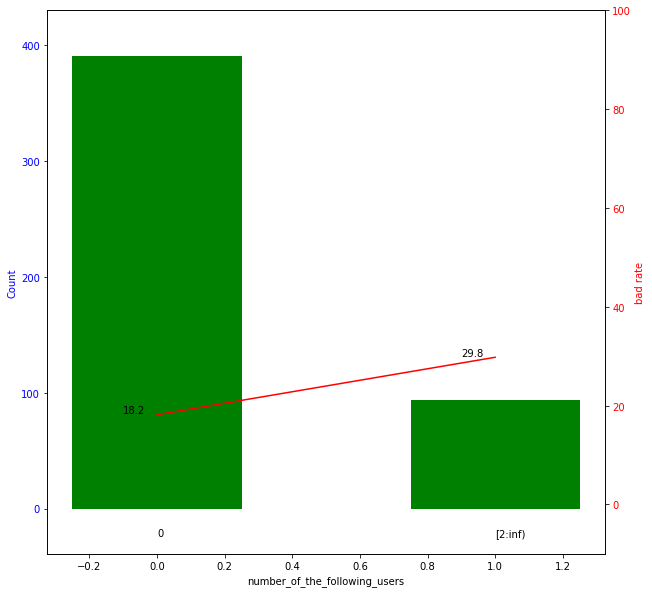

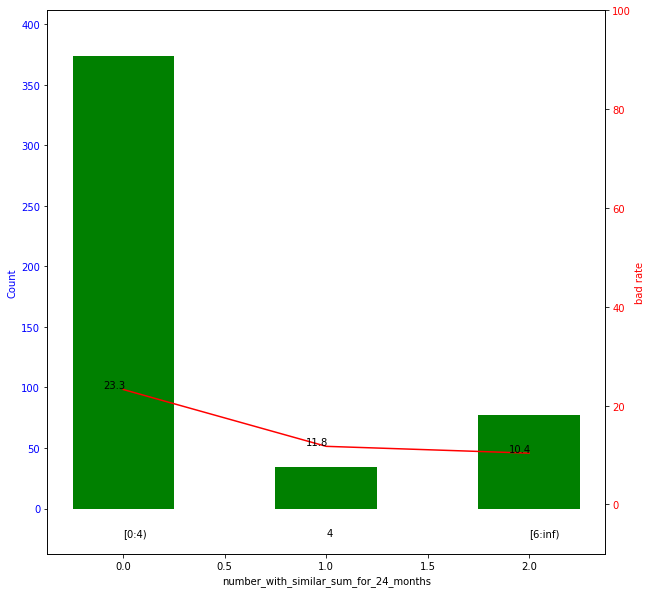

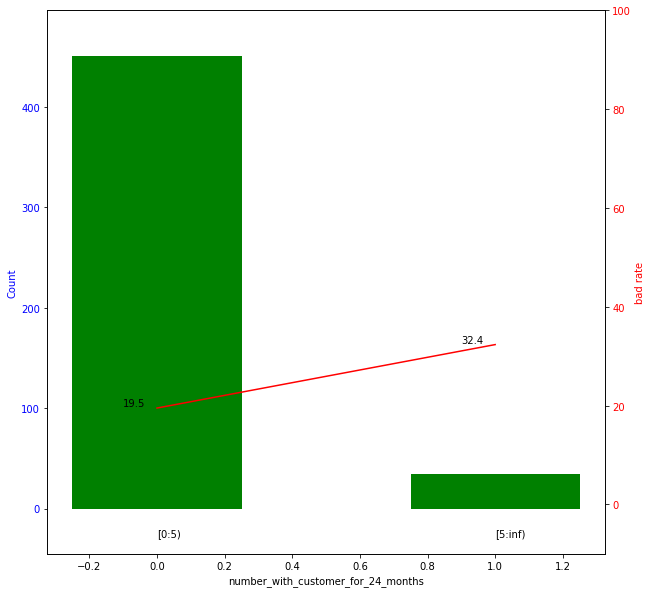

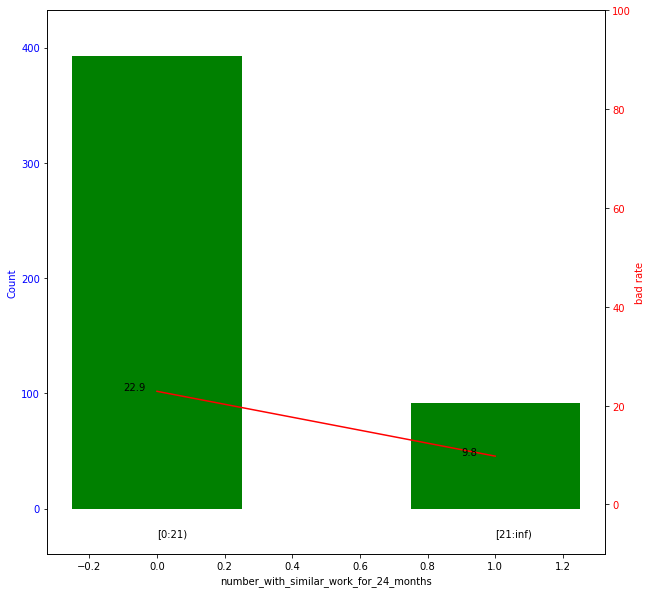

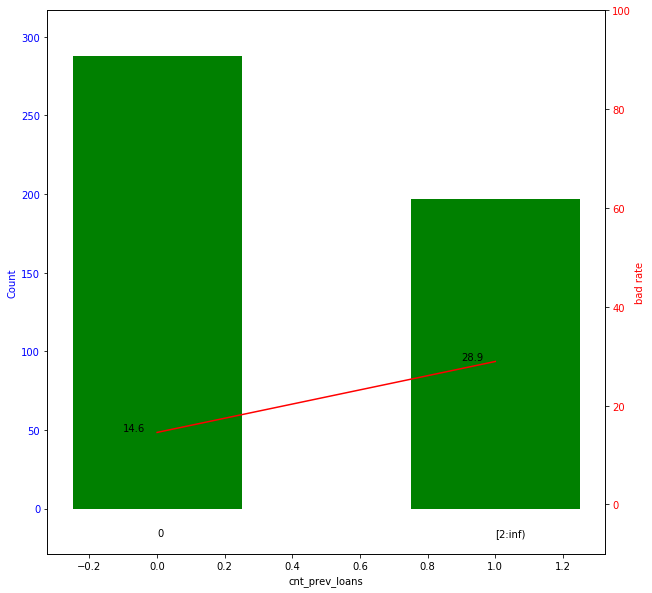

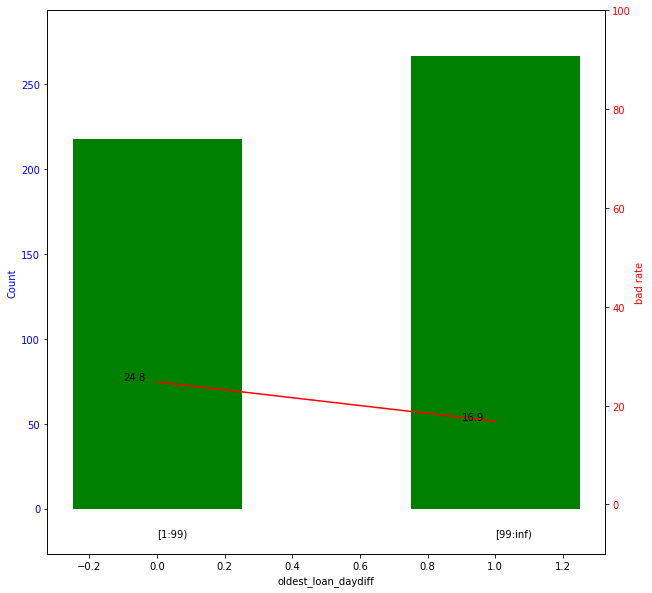

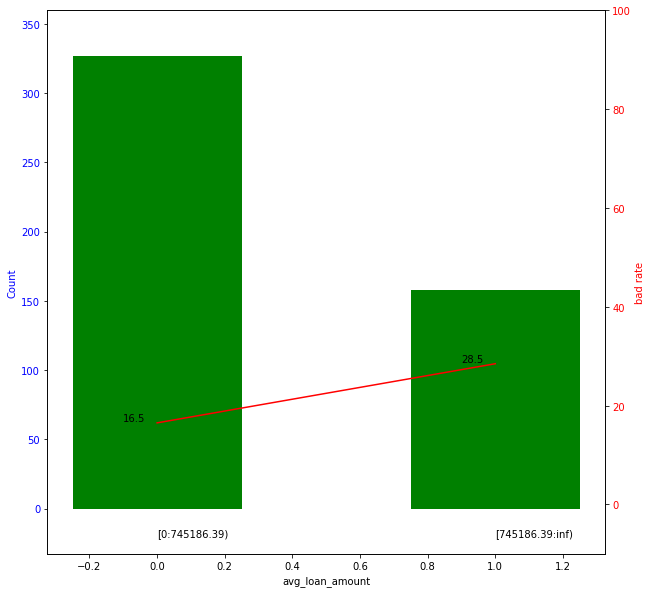

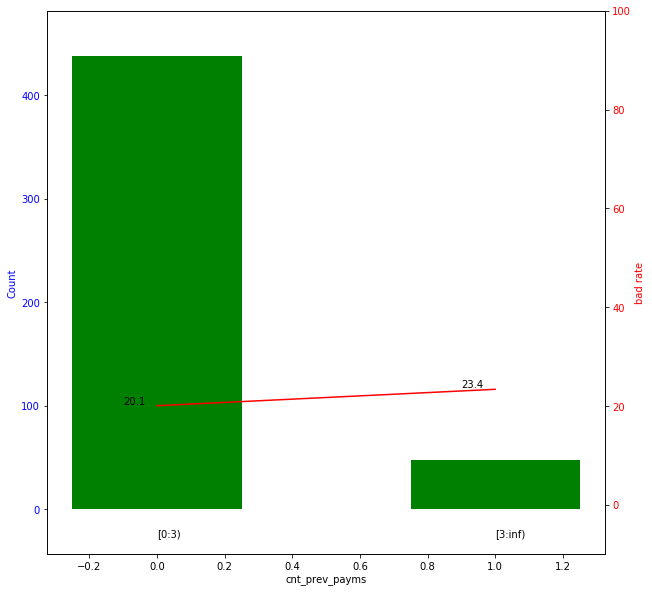

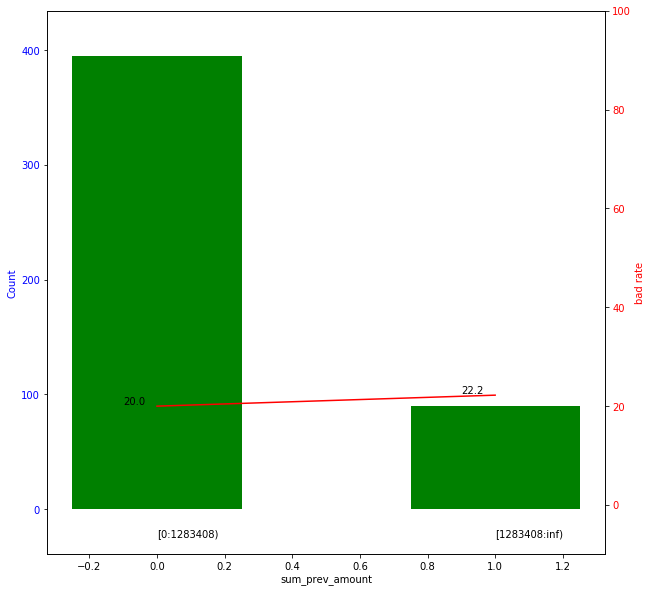

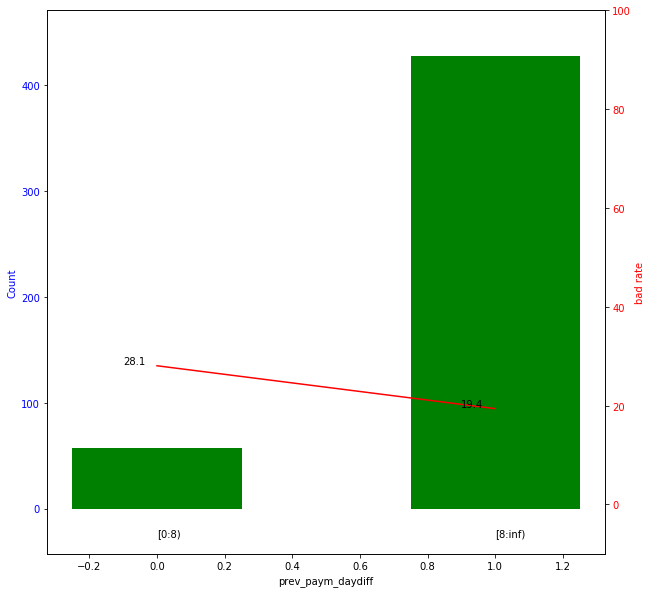

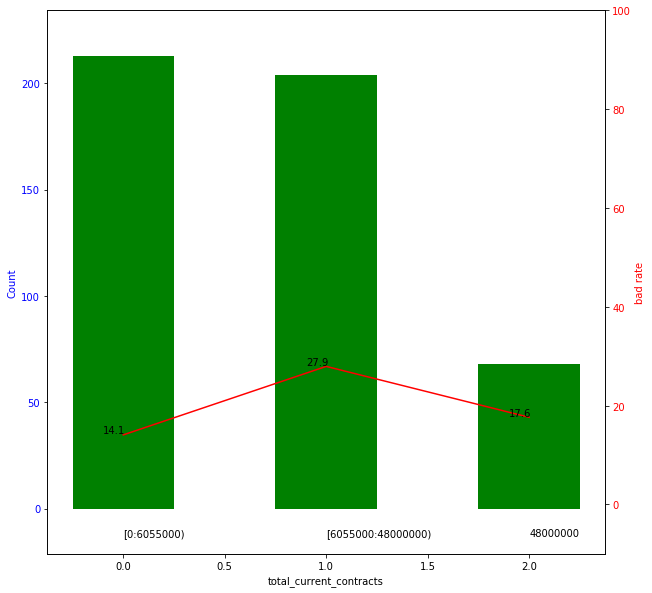

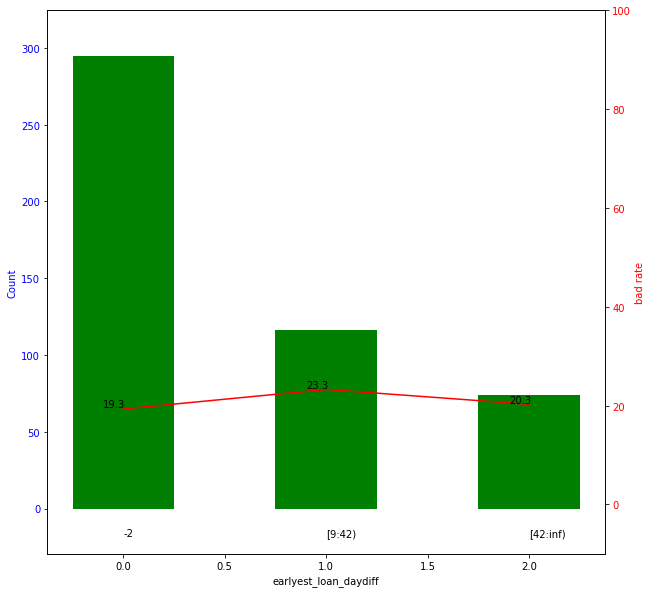

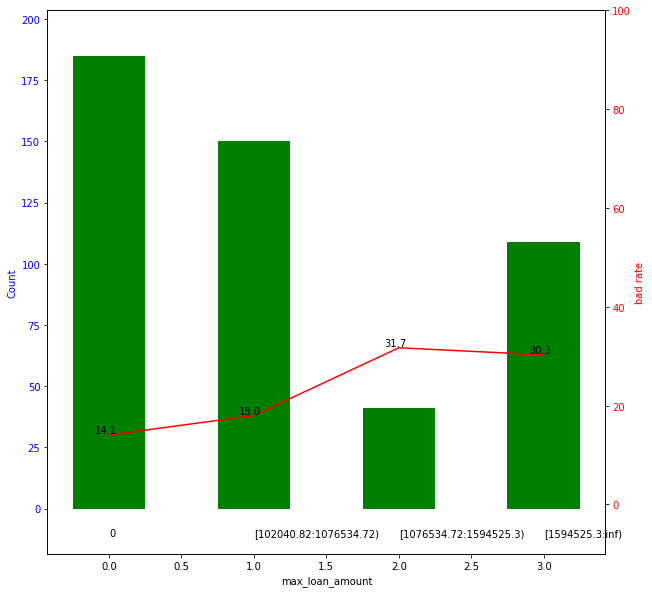

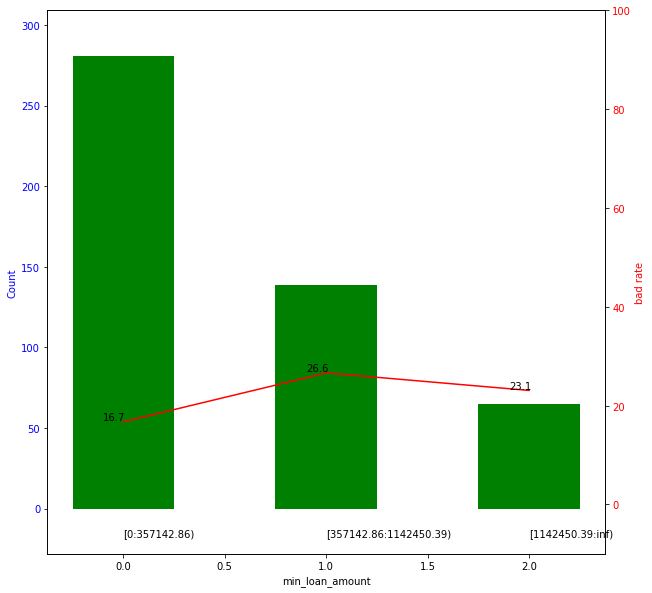

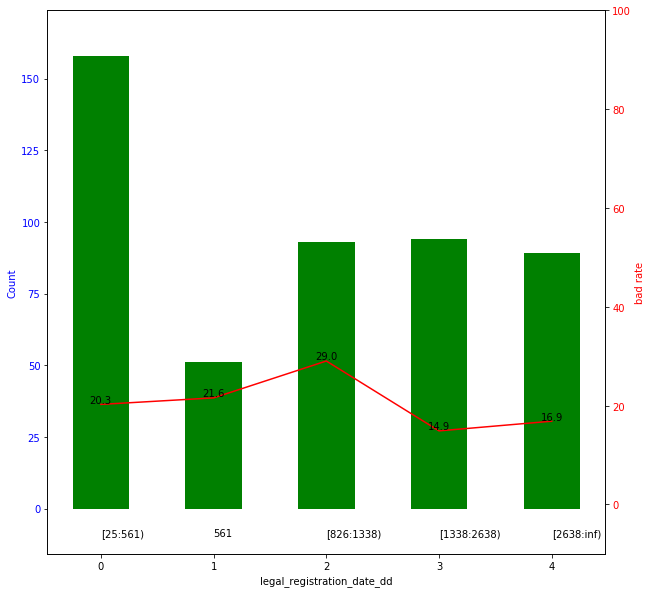

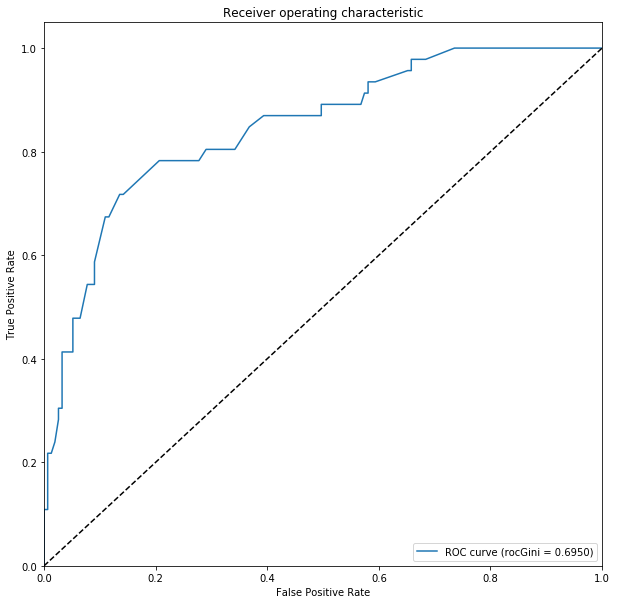

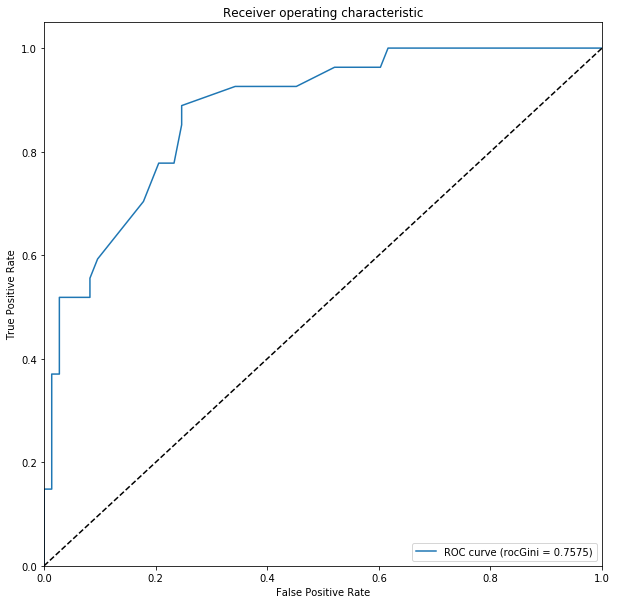

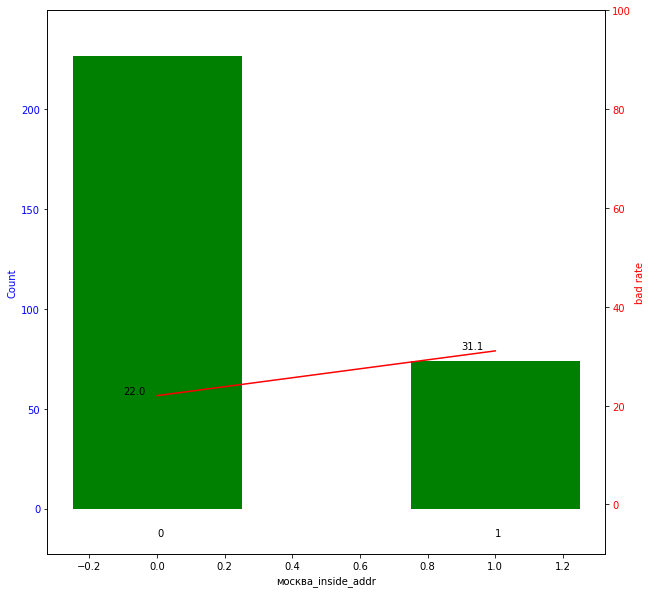

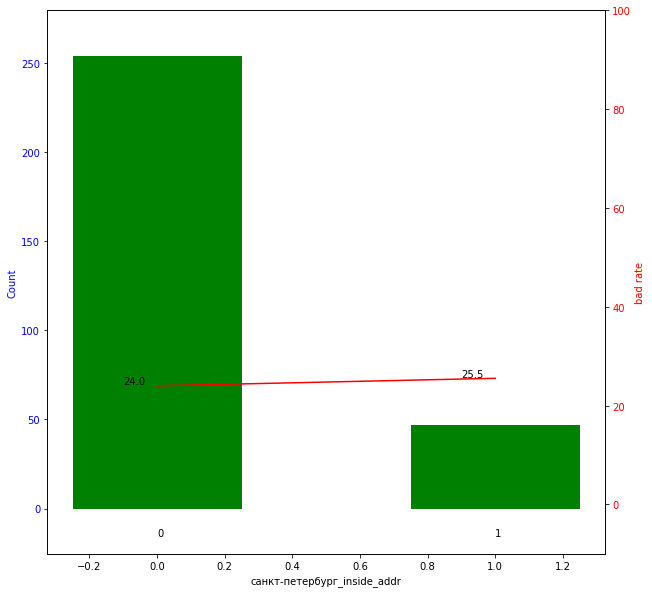

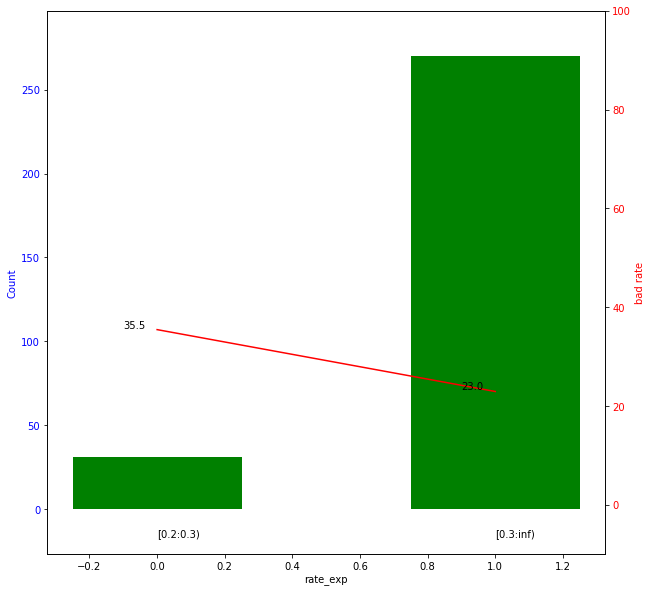

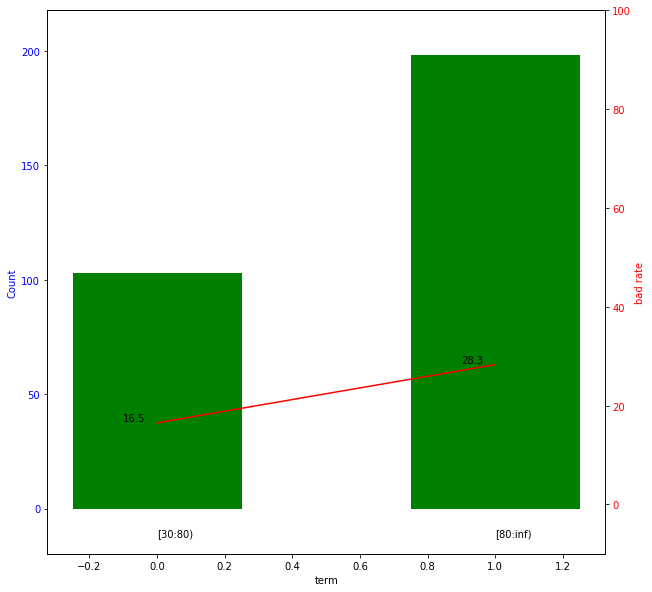

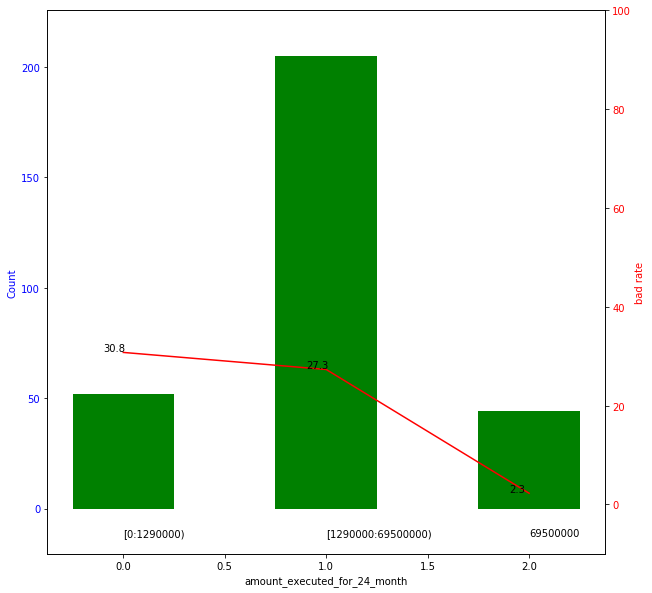

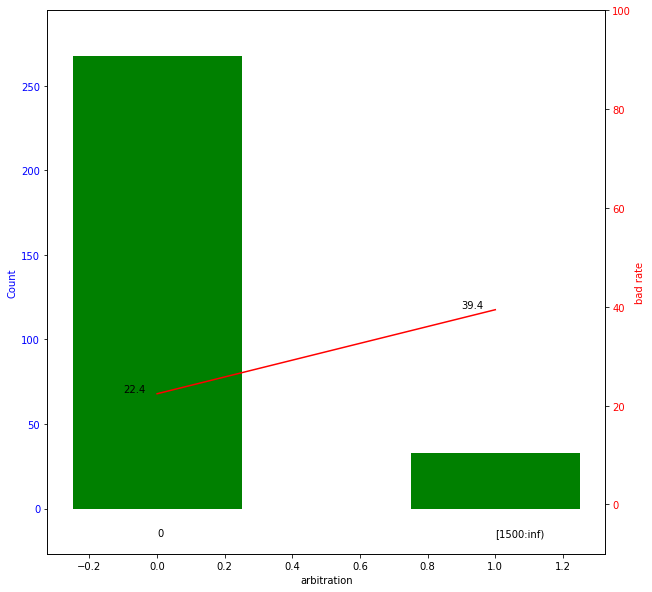

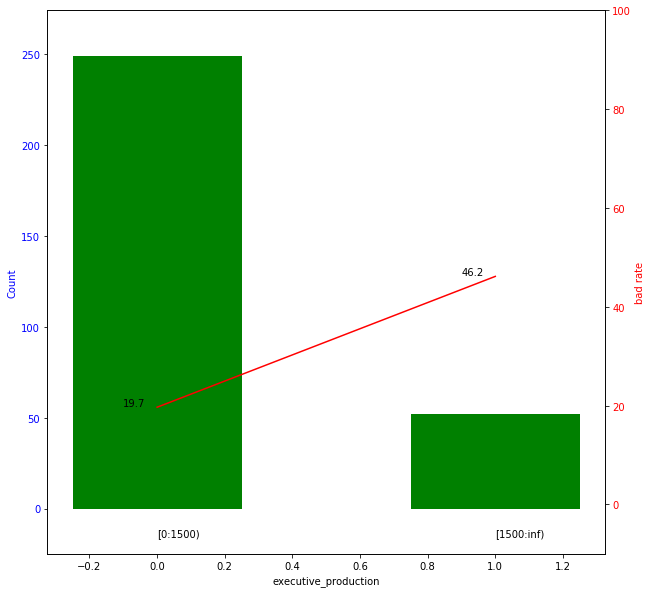

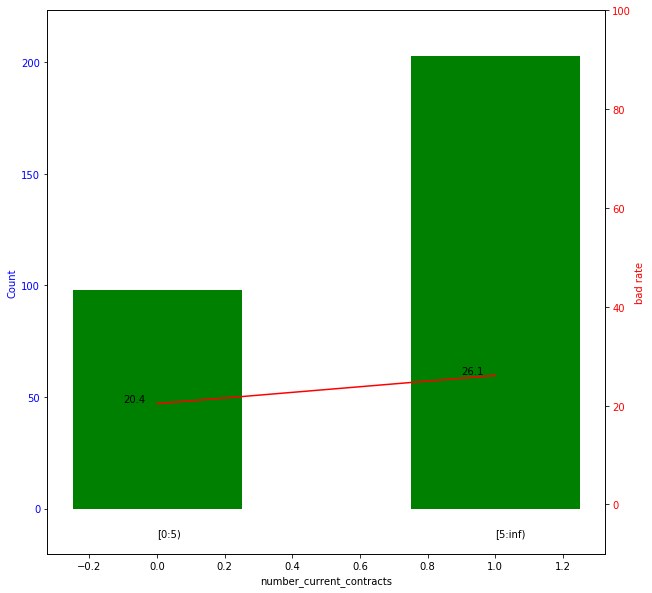

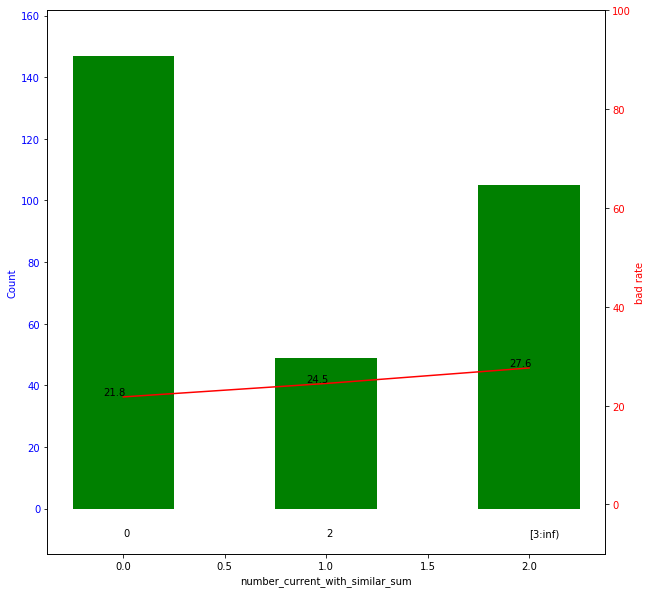

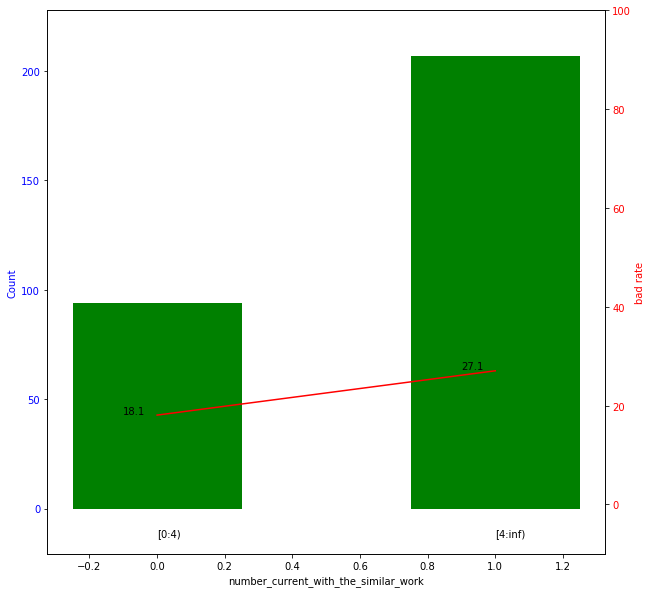

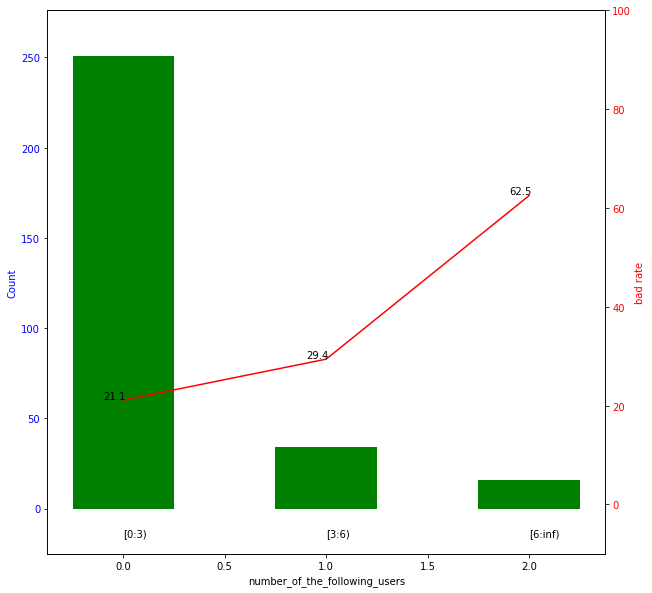

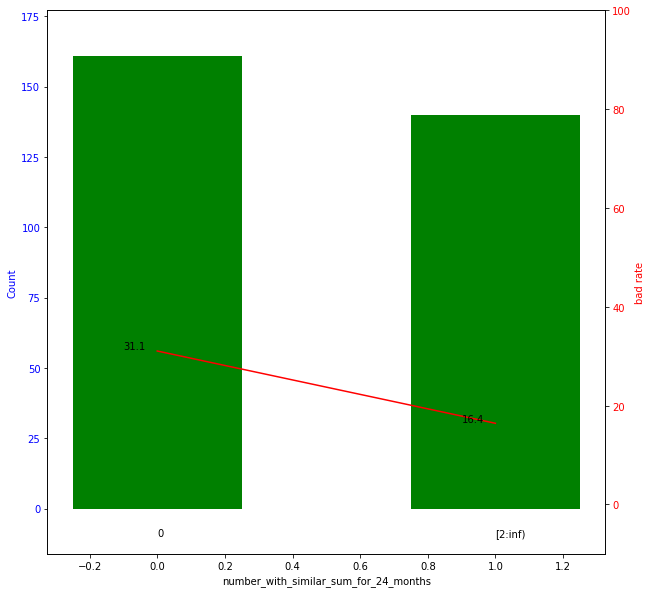

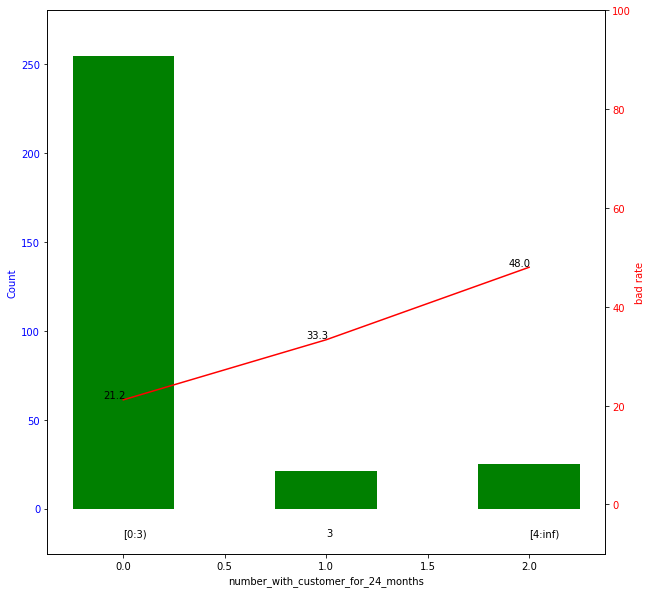

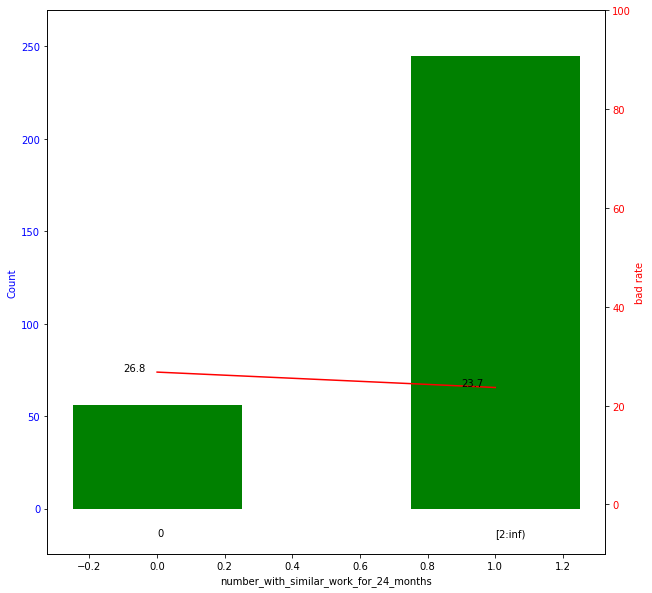

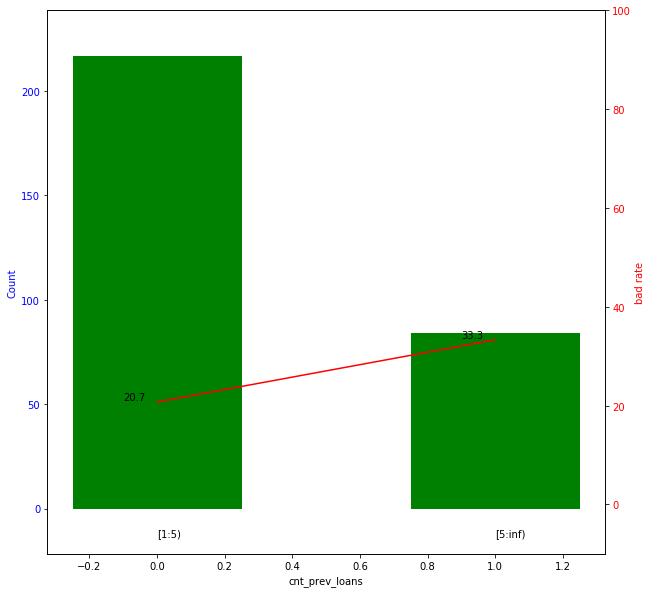

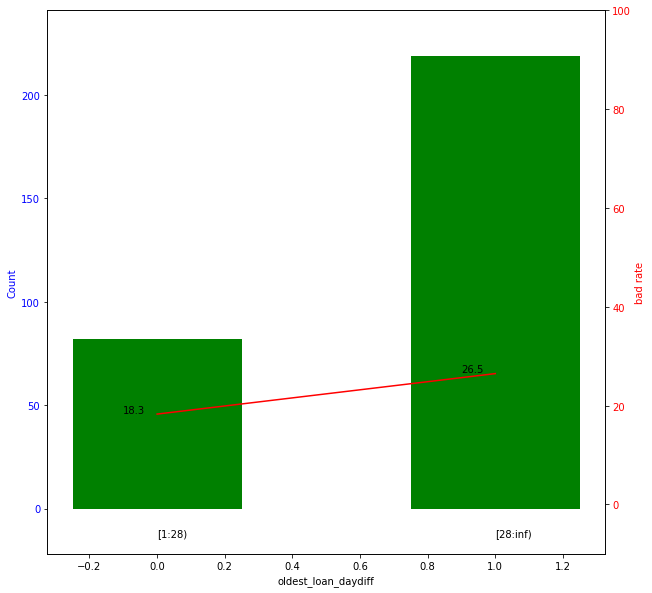

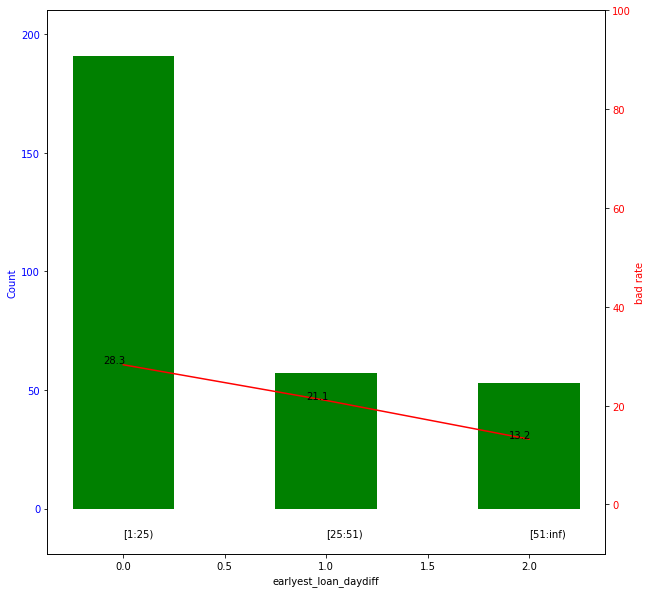

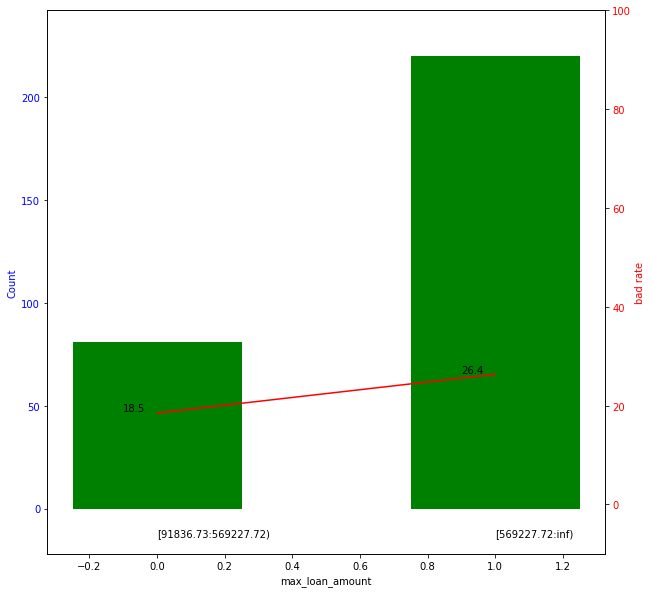

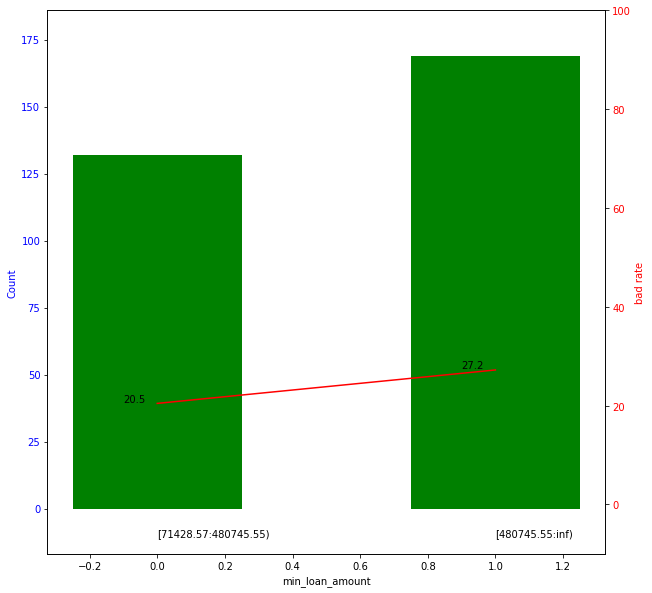

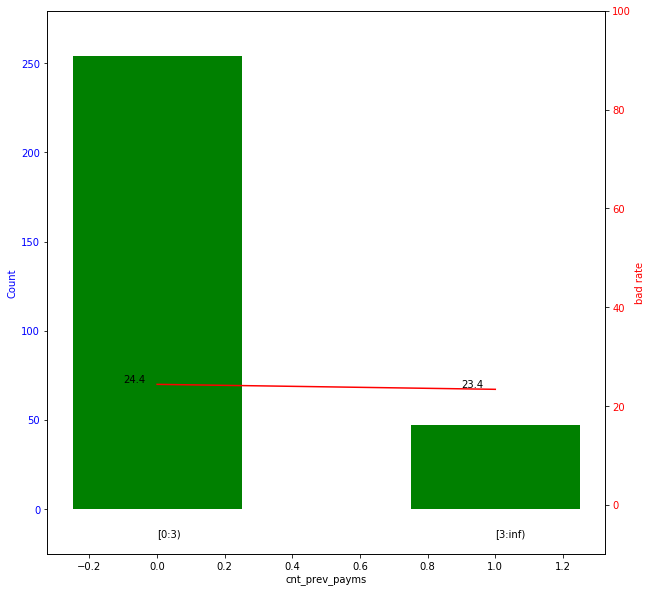

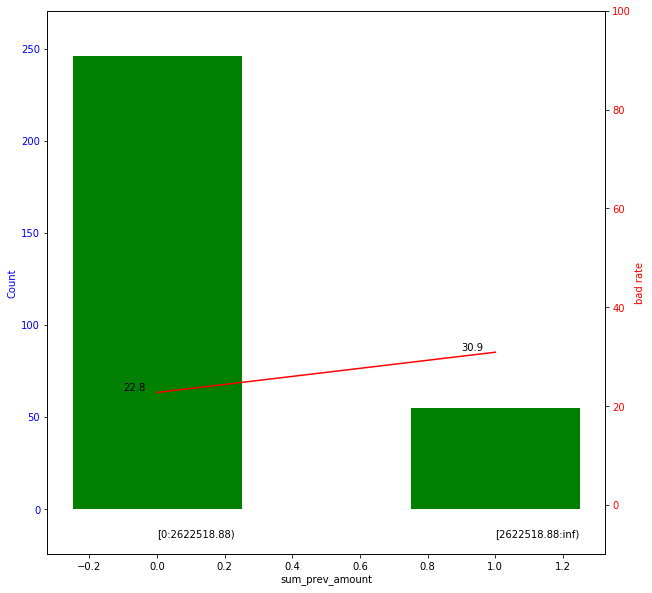

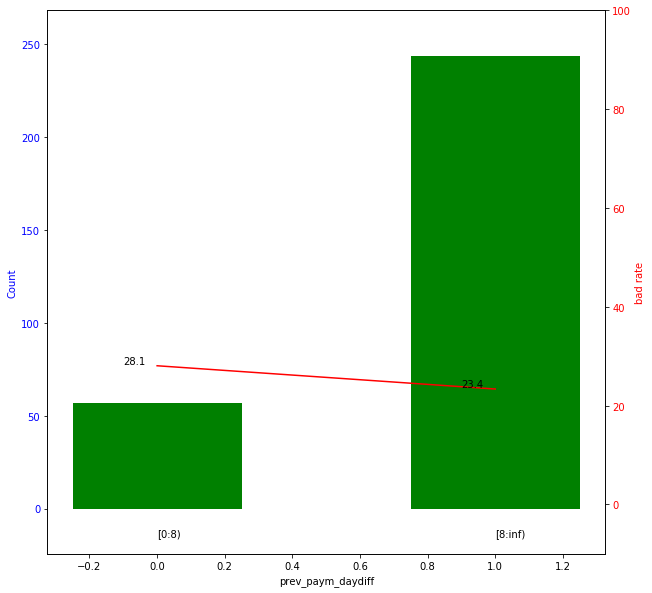

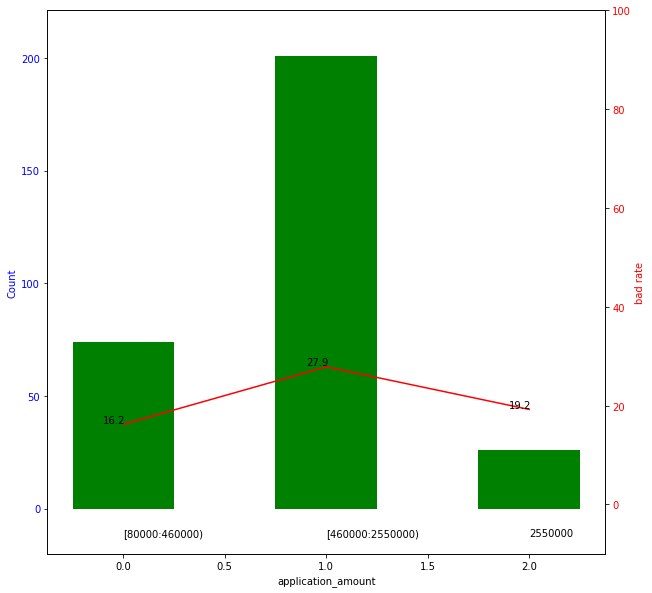

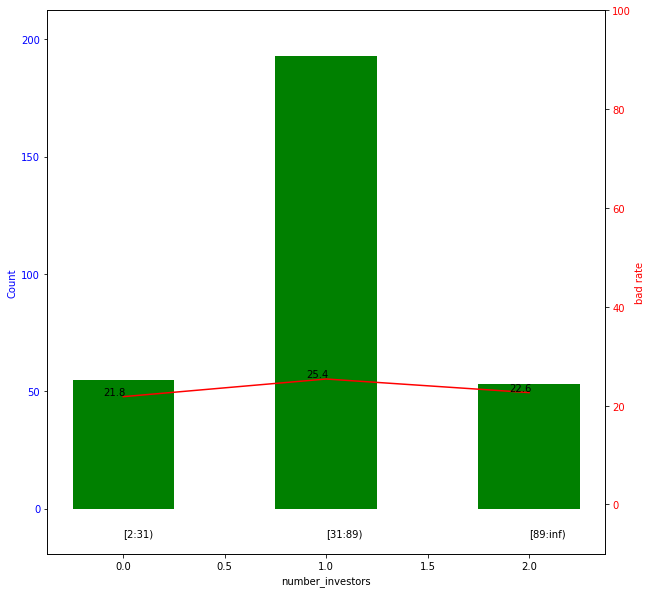

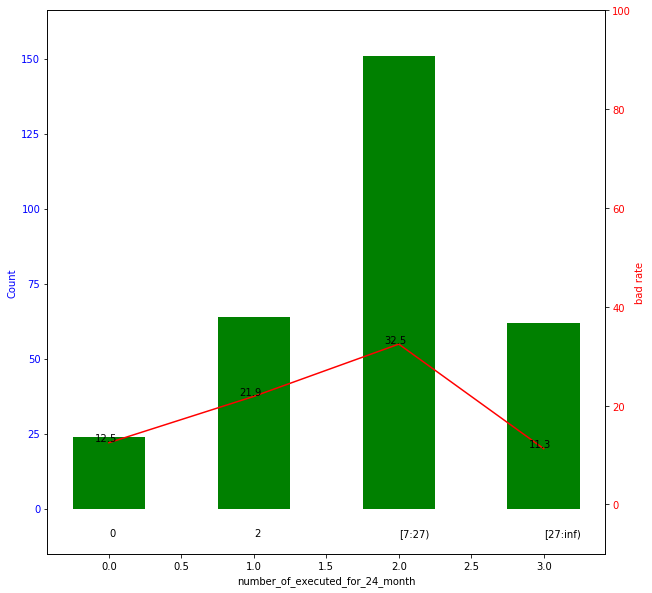

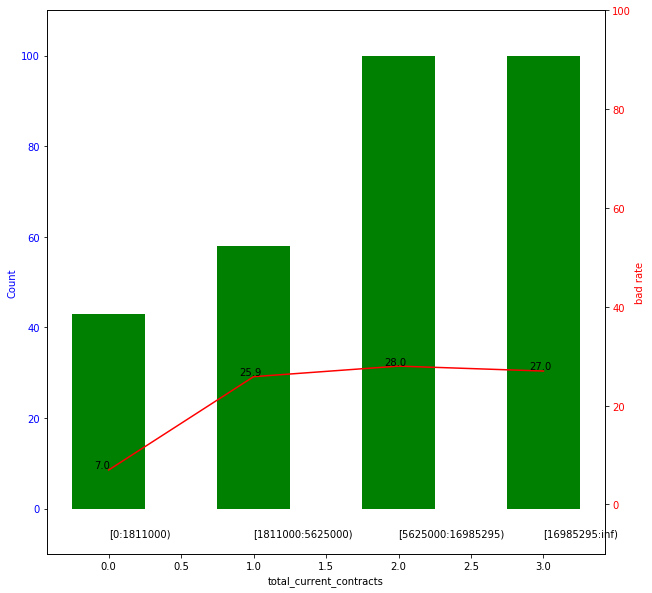

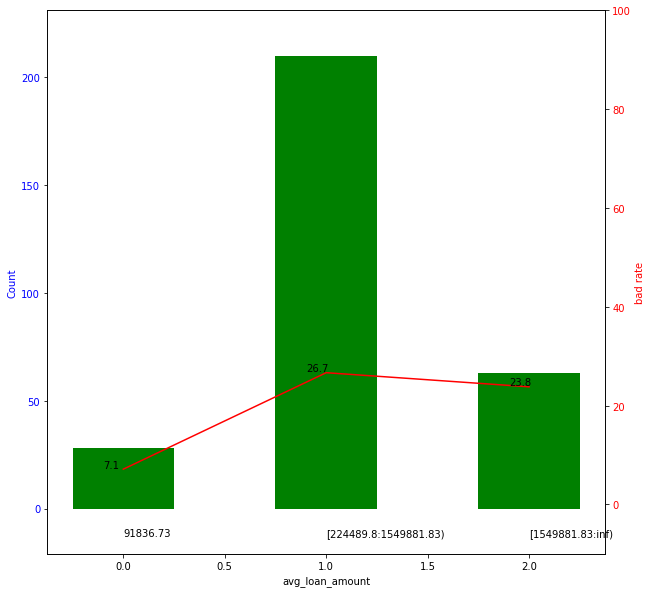

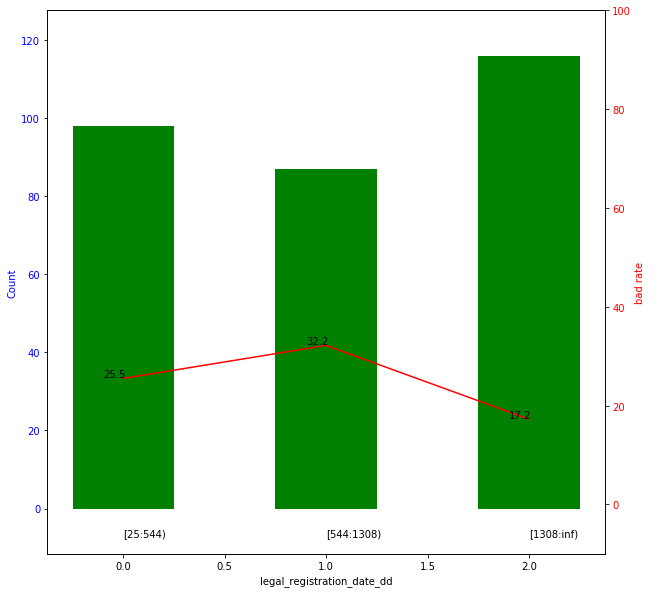

In [4]:
import datetime
import sys
sys.path.append('utils/')
import fin_tech_capital_functions as ftc

#login and password from dwh
main_sql_path = 'sql/main.sql'
login = 'e.migaev'
password = 'r66ekWOoLpzCW3nxQw0r'

#create connection to dwh
conn = ftc.get_coonection(login, password)
#execute sql. set result to pandas dataframe "src"
src = ftc.read_sql_from_file(main_sql_path, conn)

#process dataframe before modeling (transform categorical, date, number, text columns, fill null values) 
src = ftc.transform_data(src)
id_column = 'application_key'

#today date
curr_date = datetime.datetime.now().strftime('%Y%m%d')
#default targets
targets = ['default_30_flag', 'default_60_flag','default_90_flag']

for target in targets:
    
    #for evry target generate dataframe with all loans (all_clients)
    all_clients  = src.copy()
    #for evry target generate dataframe with only repeat loans (only_repeats)
    only_repeats = src[src.cnt_prev_loans > 0]
    
    #for every target generate paths where result will save
    model_path_all_clients = f'results/{curr_date}_all_clients_{target}_model_result'
    ftc.create_folder(model_path_all_clients)
    model_path_repeat_clients = f'results/{curr_date}_repeat_clients_{target}_model_result'
    ftc.create_folder(model_path_repeat_clients)
    
    #transform features, create model, save results
    ftc.full_modeling(target, all_clients, model_path_all_clients, id_column)
    ftc.full_modeling(target, only_repeats, model_path_repeat_clients, id_column)